# **Caricamento dati e modelli**

--2023-05-01 11:49:29--  https://raw.githubusercontent.com/LorenzoTausani/Octave_CPU/master/DBN.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23621 (23K) [text/plain]
Saving to: ‘DBN.py’

DBN.py              100%[===================>]  23.07K  --.-KB/s    in 0s      

2023-05-01 11:49:29 (72.5 MB/s) - ‘DBN.py’ saved [23621/23621]

--2023-05-01 11:49:29--  https://raw.githubusercontent.com/LorenzoTausani/Octave_CPU/master/plotting_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39789 (39K) [text/plain]
Saving to: 

100%|██████████| 9912422/9912422 [00:00<00:00, 334839740.70it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 98244682.74it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 140684135.08it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 24361289.98it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

The number shown is the number: 2


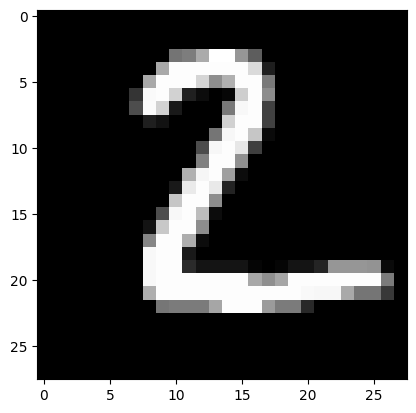

In [ ]:
# carico i modelli dalla mia repository

def get_dbn_library():
  files = ["DBN.py","plotting_functions.py","VGG_MNIST.py","Intersection_analysis.py","utils.py","methods.py"]
  repository_url = "https://raw.githubusercontent.com/LorenzoTausani/Octave_CPU/master/"
  for file in files:
    ! wget -O {file} {repository_url}{file}

get_dbn_library()

import DBN
import plotting_functions
import VGG_MNIST
import Intersection_analysis
import utils
import methods

from torchvision import datasets,transforms
import torch
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np
from matplotlib import cm
import math
import random
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import scipy.special
import itertools
import warnings
import scipy
warnings.filterwarnings("ignore")
from statsmodels.sandbox.stats.multicomp import multipletests
from scipy.stats.stats import pearsonr
import seaborn as sns
from google.colab import files


from DBN import DBN
from plotting_functions import *
from VGG_MNIST import *
from Intersection_analysis import *
from utils import *
from methods import *

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device {DEVICE}")
train_data, train_labels, sample_test_data, sample_test_labels=load_MNIST_data(DEVICE)


In [ ]:
VGG_cl = VGG16((1,32,32), batch_norm=True).to(DEVICE) #creo un'istanza del classificatore in cui poi caricherò i parametri salvati
from google.colab import drive
drive.mount('/content/gdrive')
PATH = '/content/gdrive/My Drive/VGG16_MNIST/VGG16_MNIST_best_val.pth'
VGG_cl.load_state_dict(torch.load(PATH))
VGG_cl.eval()#vedi se metterla qui funziona
#E = torch.load('/content/gdrive/My Drive/VGG16_MNIST/entropiesTestSet.pt')
E = torch.load('/content/gdrive/My Drive/VGG16_MNIST/entropiesTestSet.pt')
#nr_models_to_compare = int(input('how many models do you want to compare?'))
nr_models_to_compare = 1
models_list =[]

for i in range(nr_models_to_compare):
  model = model_load_or_create(train_data, train_labels, sample_test_data, sample_test_labels, DEVICE=DEVICE)
  models_list.append(model)

k=int(input('intersection analysis, k= (100 di default)?'))
Ian = Intersection_analysis(model, top_k_Hidden=k)
digit_digit_common_elements_count_biasing, digit_digit_common_elements_count_avgH = Ian.do_intersection_analysis()

df_digit_digit_common_elements_count_biasing = pd.DataFrame(digit_digit_common_elements_count_biasing.numpy())

Mounted at /content/gdrive
do you want to load an old model? (1=yes, 0=no)1
quante epoche di training della RBM?100
Che tipo di visibile? (continous,binary,leaky_binary)continous
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
creare nuovi dati generati (0=no, 1=train, 2=test, 3= entrambi)0
salvare il modello? (0=no, 1=si)0
intersection analysis, k= (100 di default)?149
tensor([[149.,  29.,  37.,  50.,  32.,  65.,  52.,  37.,  54.,  37.],
        [ 29., 149.,  47.,  54.,  50.,  54.,  53.,  64.,  67.,  62.],
        [ 37.,  47., 149.,  64.,  41.,  44.,  66.,  41.,  60.,  48.],
        [ 50.,  54.,  64., 149.,  46.,  81.,  54.,  47.,  69.,  54.],
        [ 32.,  50.,  41.,  46., 149.,  58.,  60.,  66.,  56., 103.],
        [ 65.,  54.,  44.,  81.,  58., 149.,  68.,  48.,  83.,  65.],
        [ 52.,  53.,  66.,  54.,  60.,  68., 149.,  38.,  64.,  63.],
        [ 37.,  64.,  41.,  47.,  66.,  48.,  38., 149

In [ ]:
#Iperparametri
model.Visible_mode = 'continous' #DEFAULT: 'continous' 
model.Hidden_mode = 'binary' #DEFAULT: 'binary'

temperature = 1 #DEFAULT: 1;
#temperature = cos_temp_generator(delta=0.3, zero=1, frequency=5, Plot=1, n_steps=100) #sigmoidal annealing

nr_steps=100 #DEFAULT: 100

consider_top_H=1000 #DEFAULT: 1000

temperatures_for_comparisons = [0.1, 0.5, 1, 1.5, 2] #DEFAULT: [0.1, 0.5, 1, 1.5, 2]

#Plotting parameters
dS=50

# generazioni usate per la tesi
d_Reconstruct_t1_allH, d_LblBias_t1_allH, d_AvgHidBias_digits_t1_allH,d_AvgHidBias_grandMean_t1_allH =generatedData_load_or_create(model=model, sample_test_data=sample_test_data,nr_steps=nr_steps,temperature=temperature,consider_top_H=consider_top_H)


Which generated data you want to load? (0=none, 1=reconstruction, 2=label biasing, 3=avg hidden biasing, 4= all)4


# **BI paper plots**

AVg H activity non-digit: tensor([223.8922], device='cuda:0')\pmtensor([0.0483], device='cuda:0')
AVG H activity digits: tensor(175.5281, device='cuda:0')


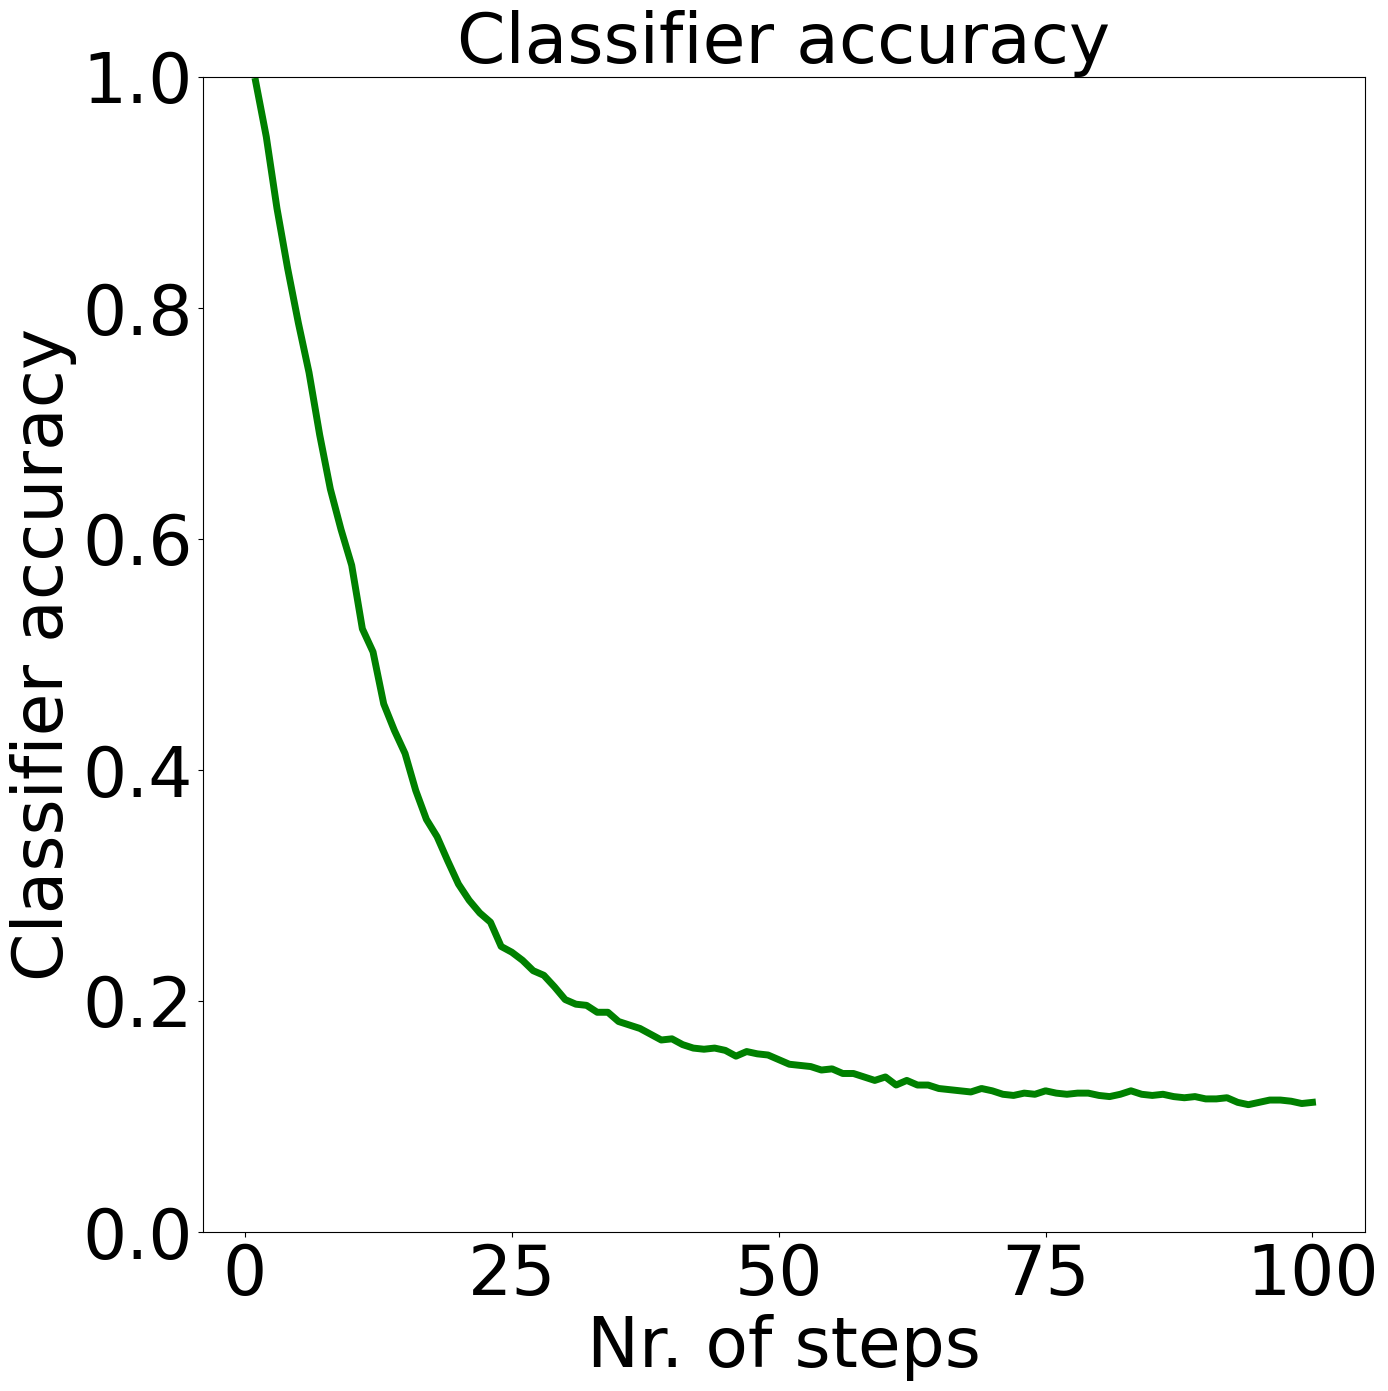

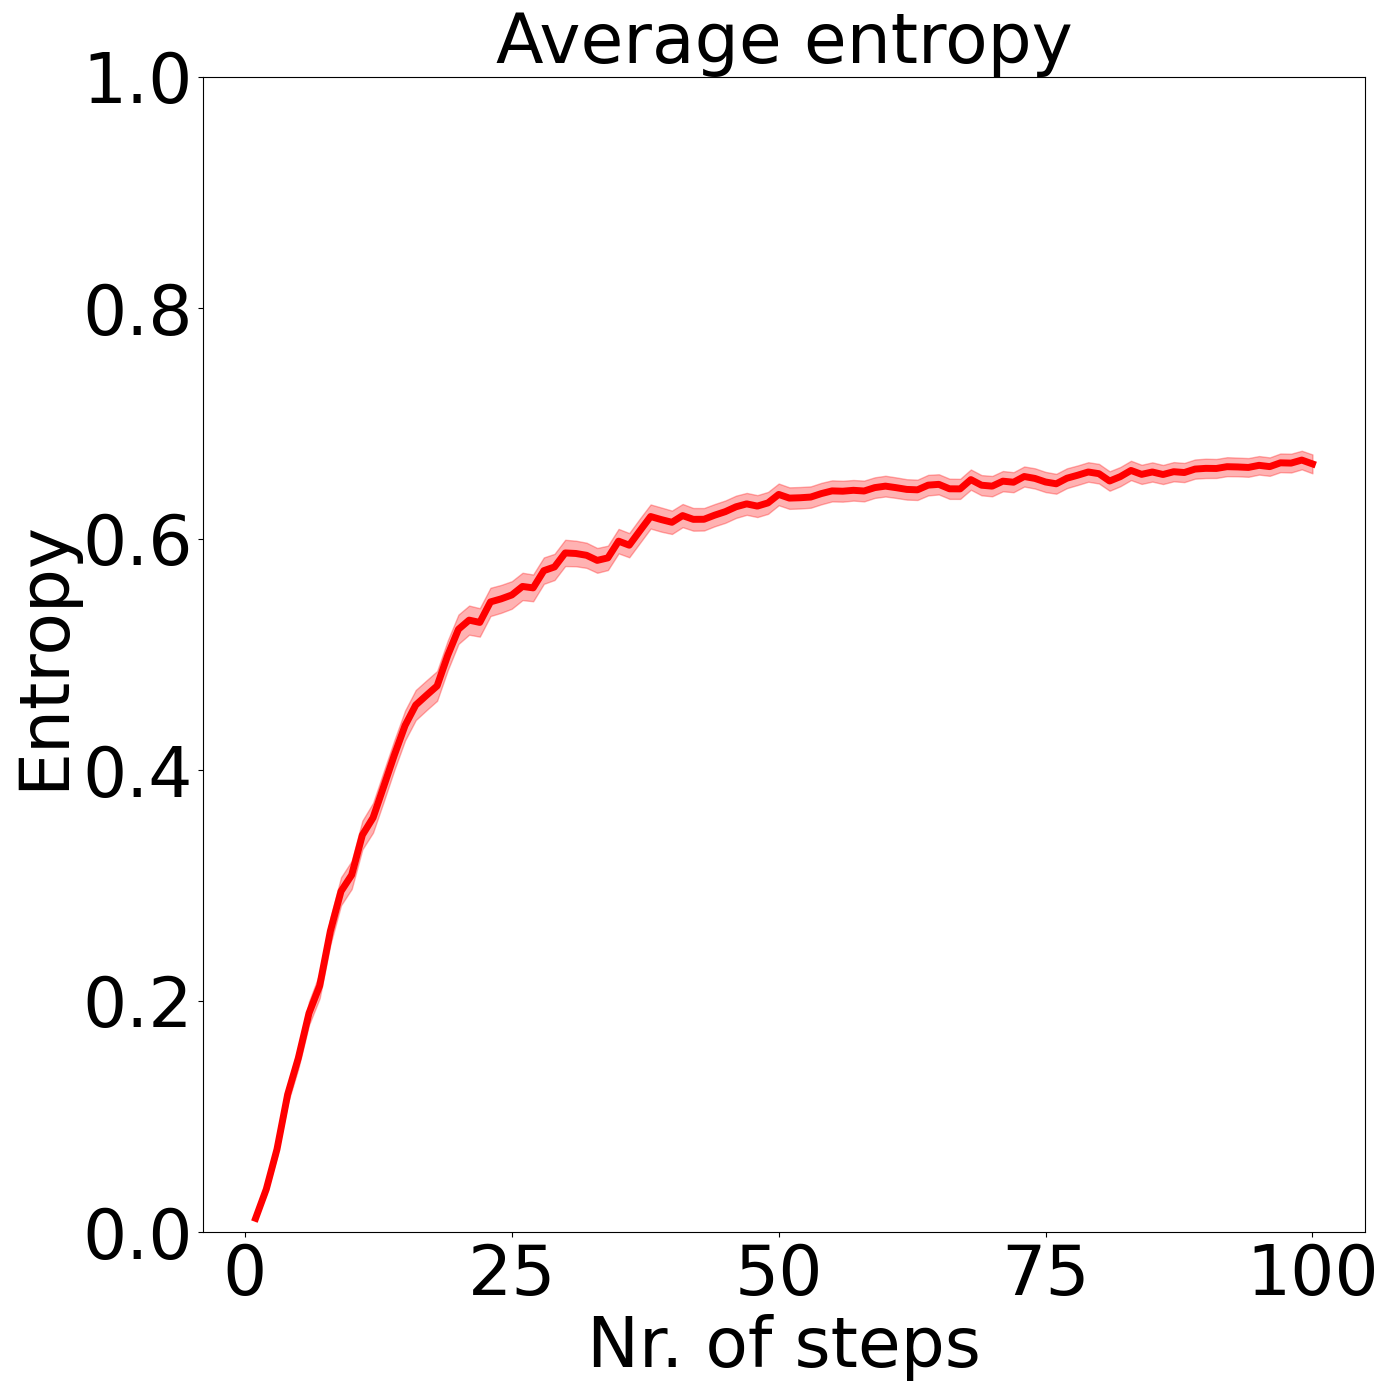

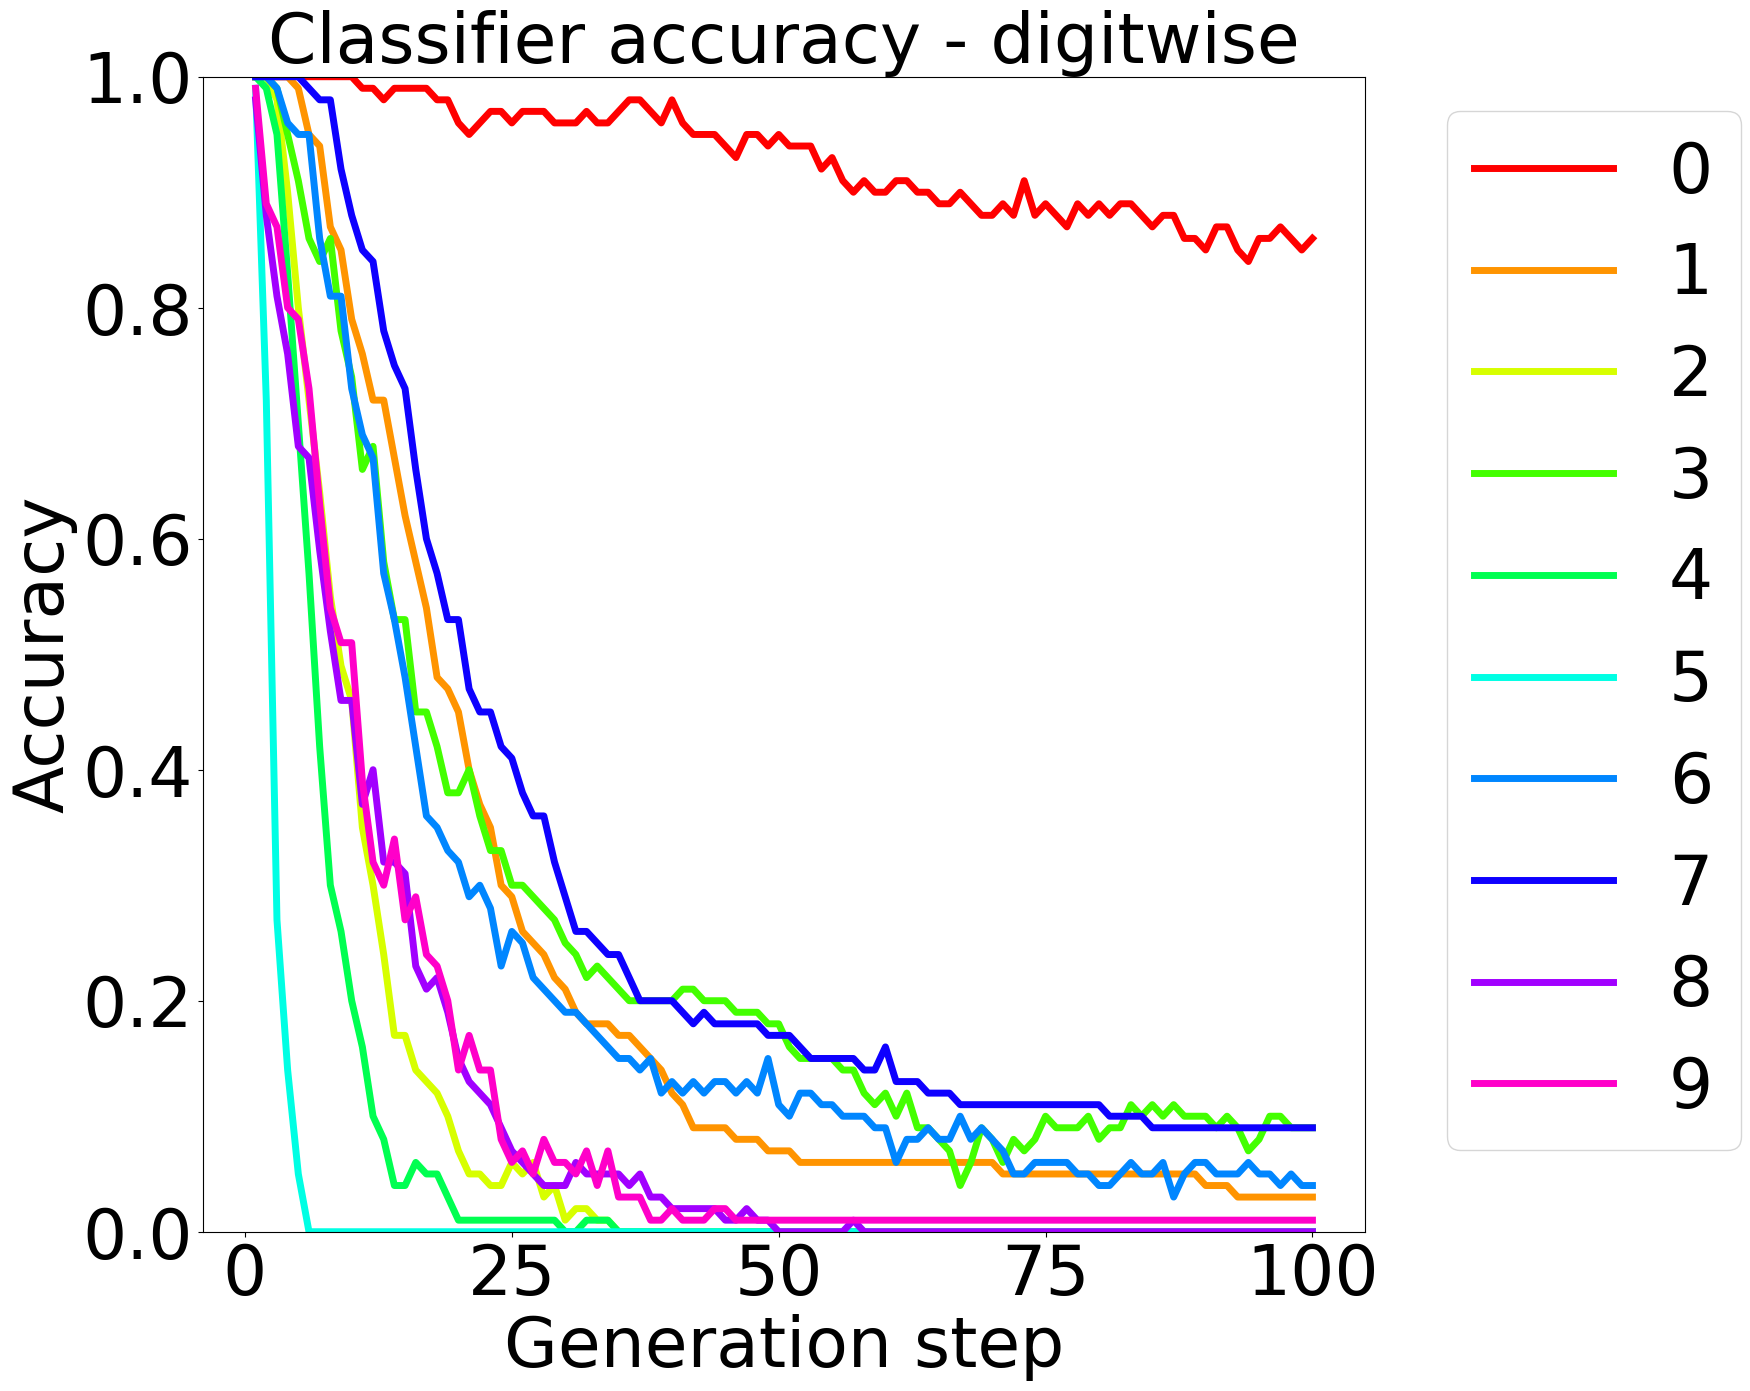

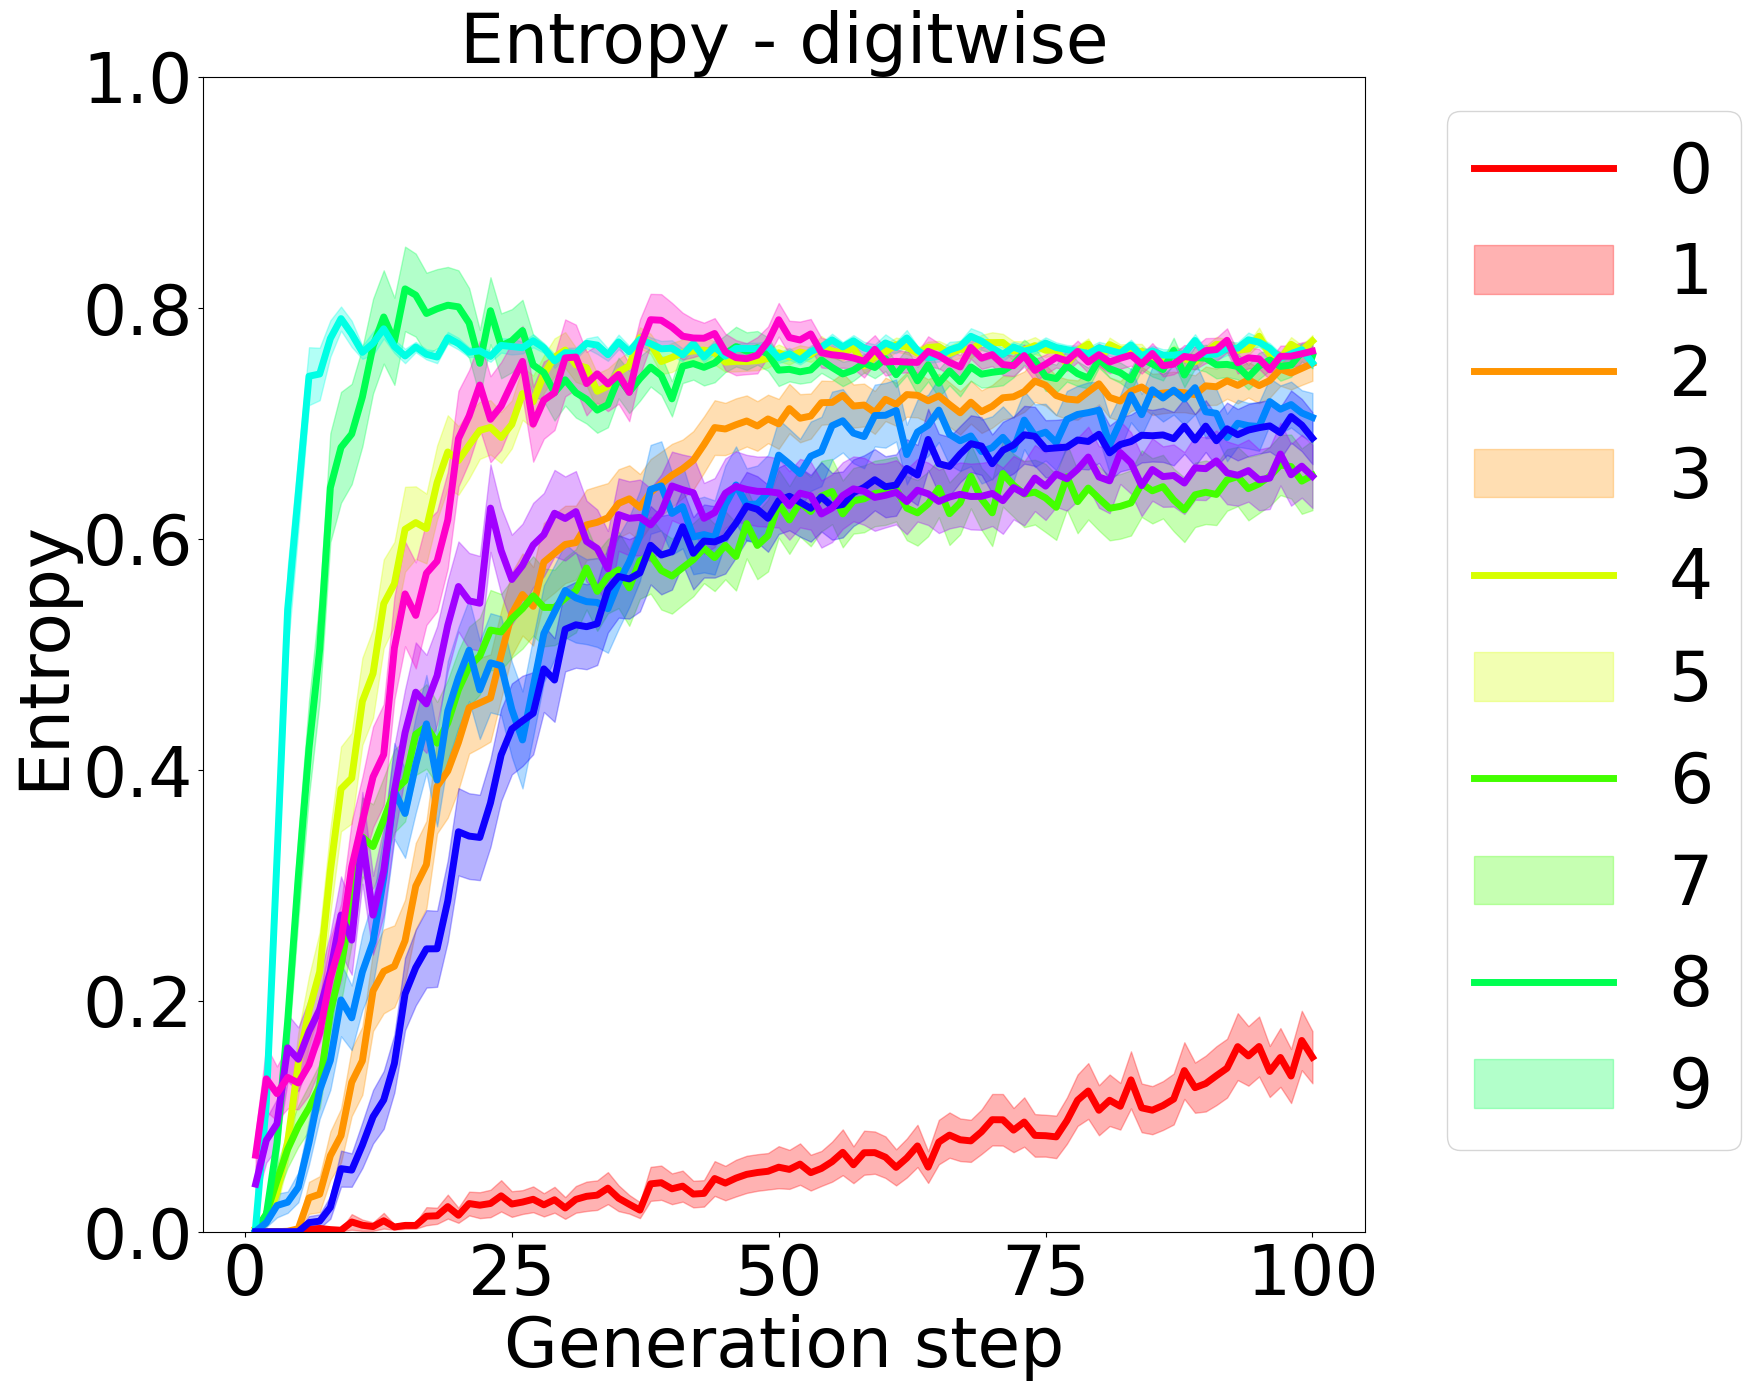

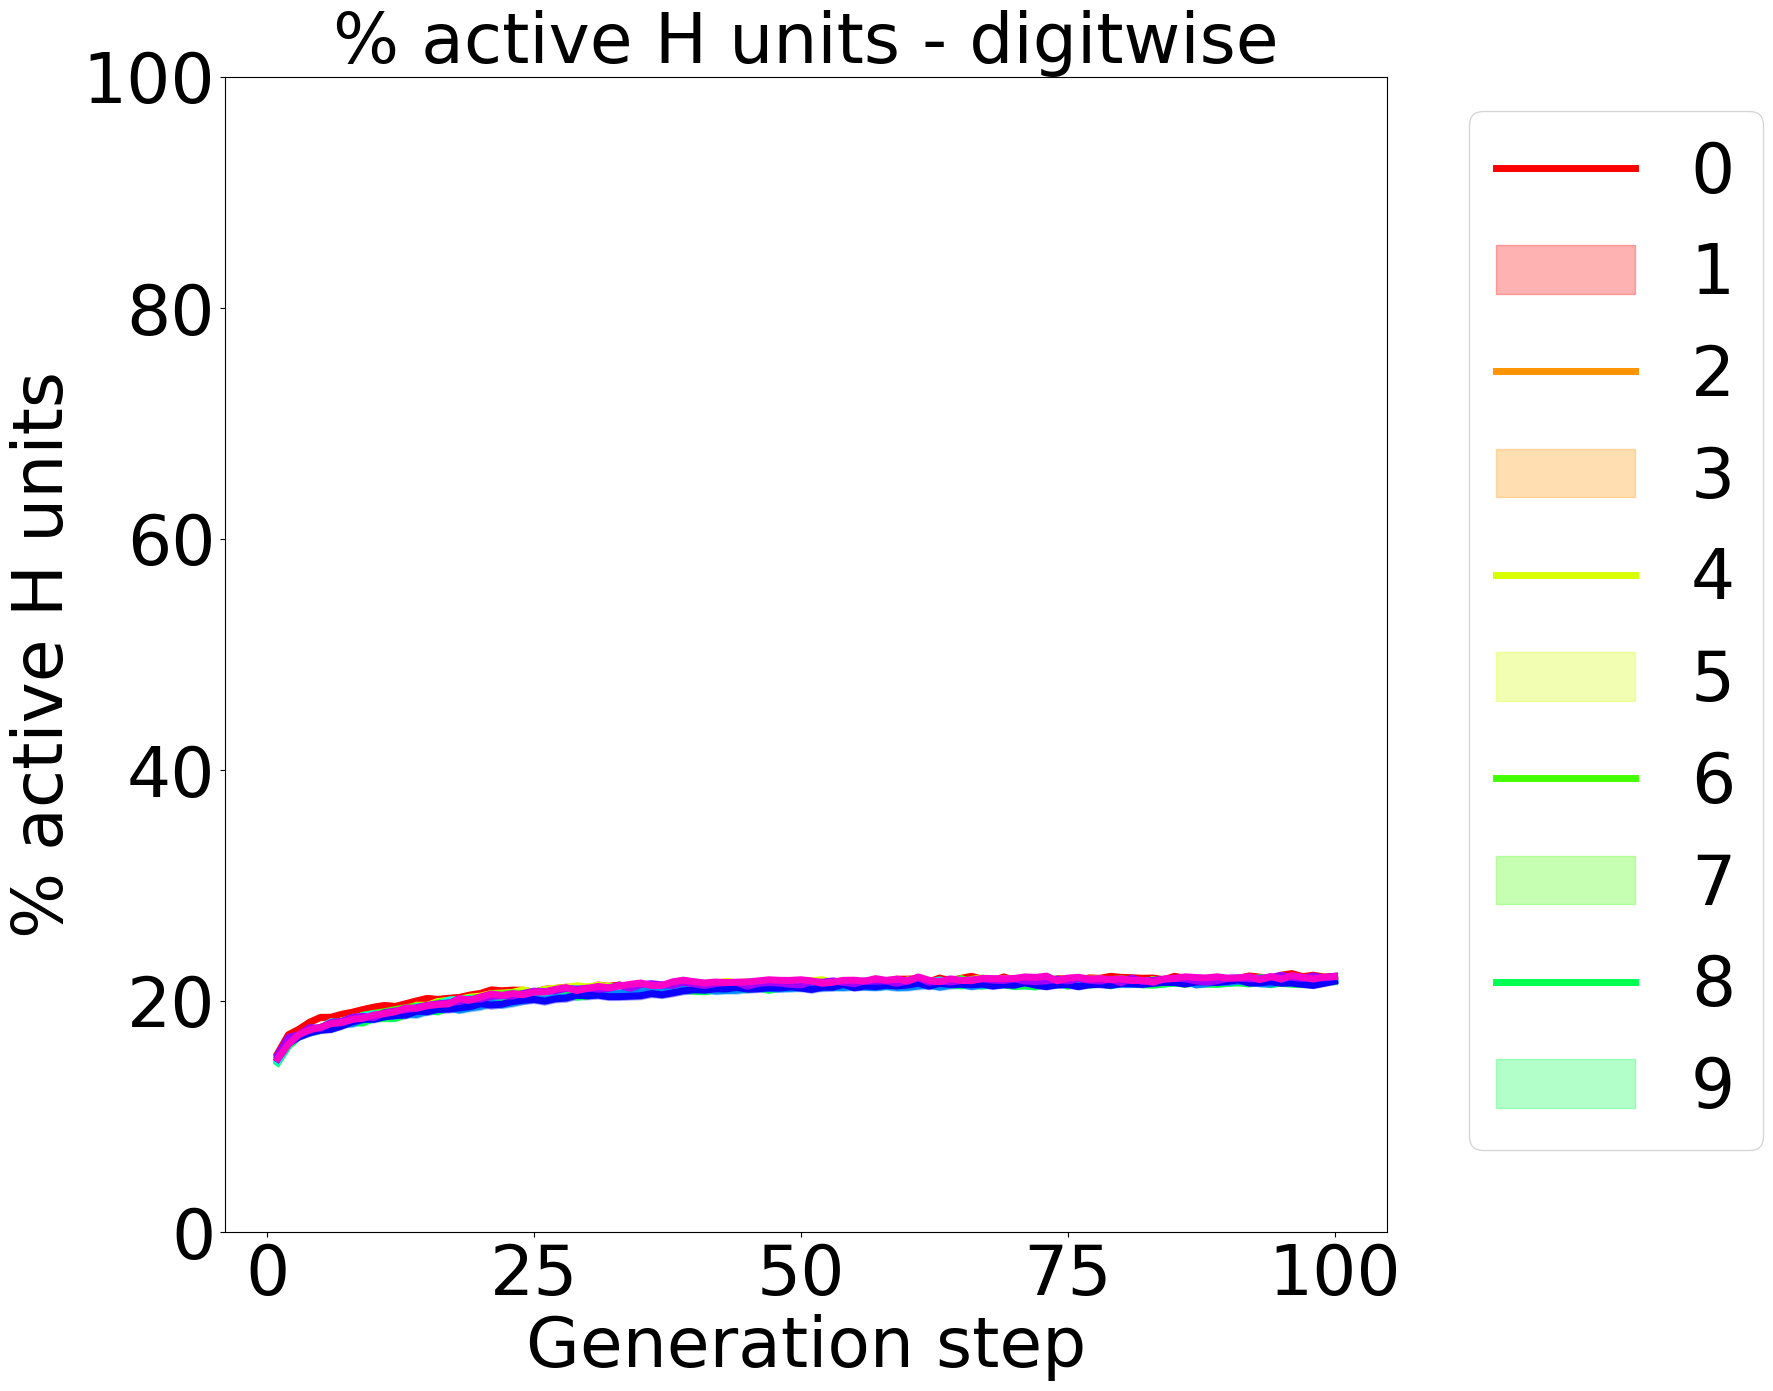

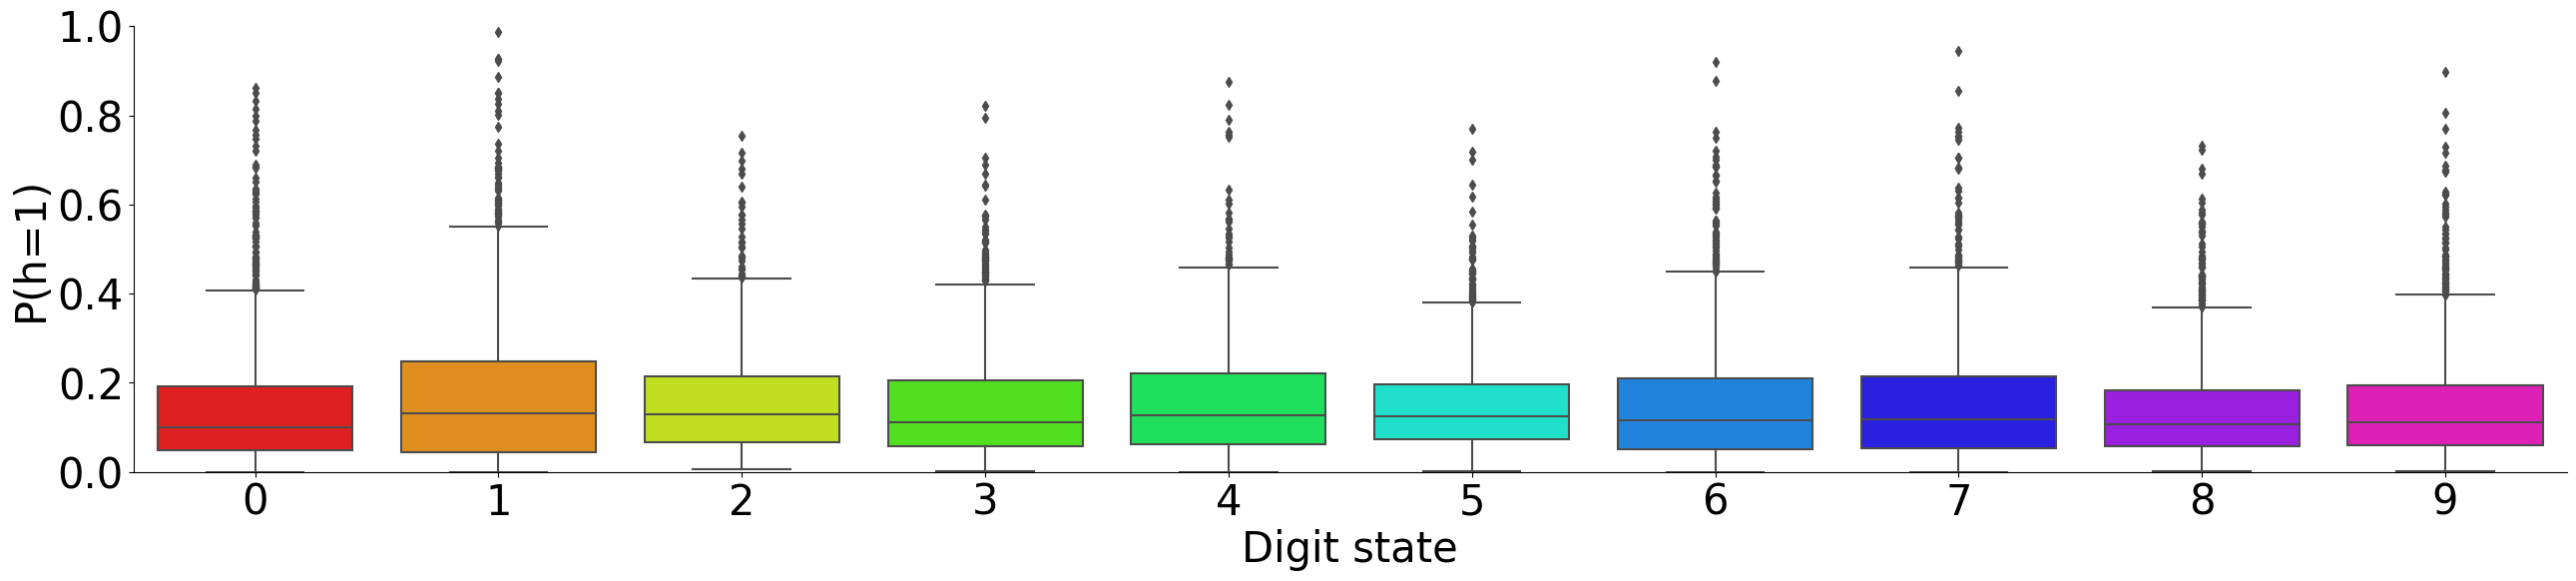

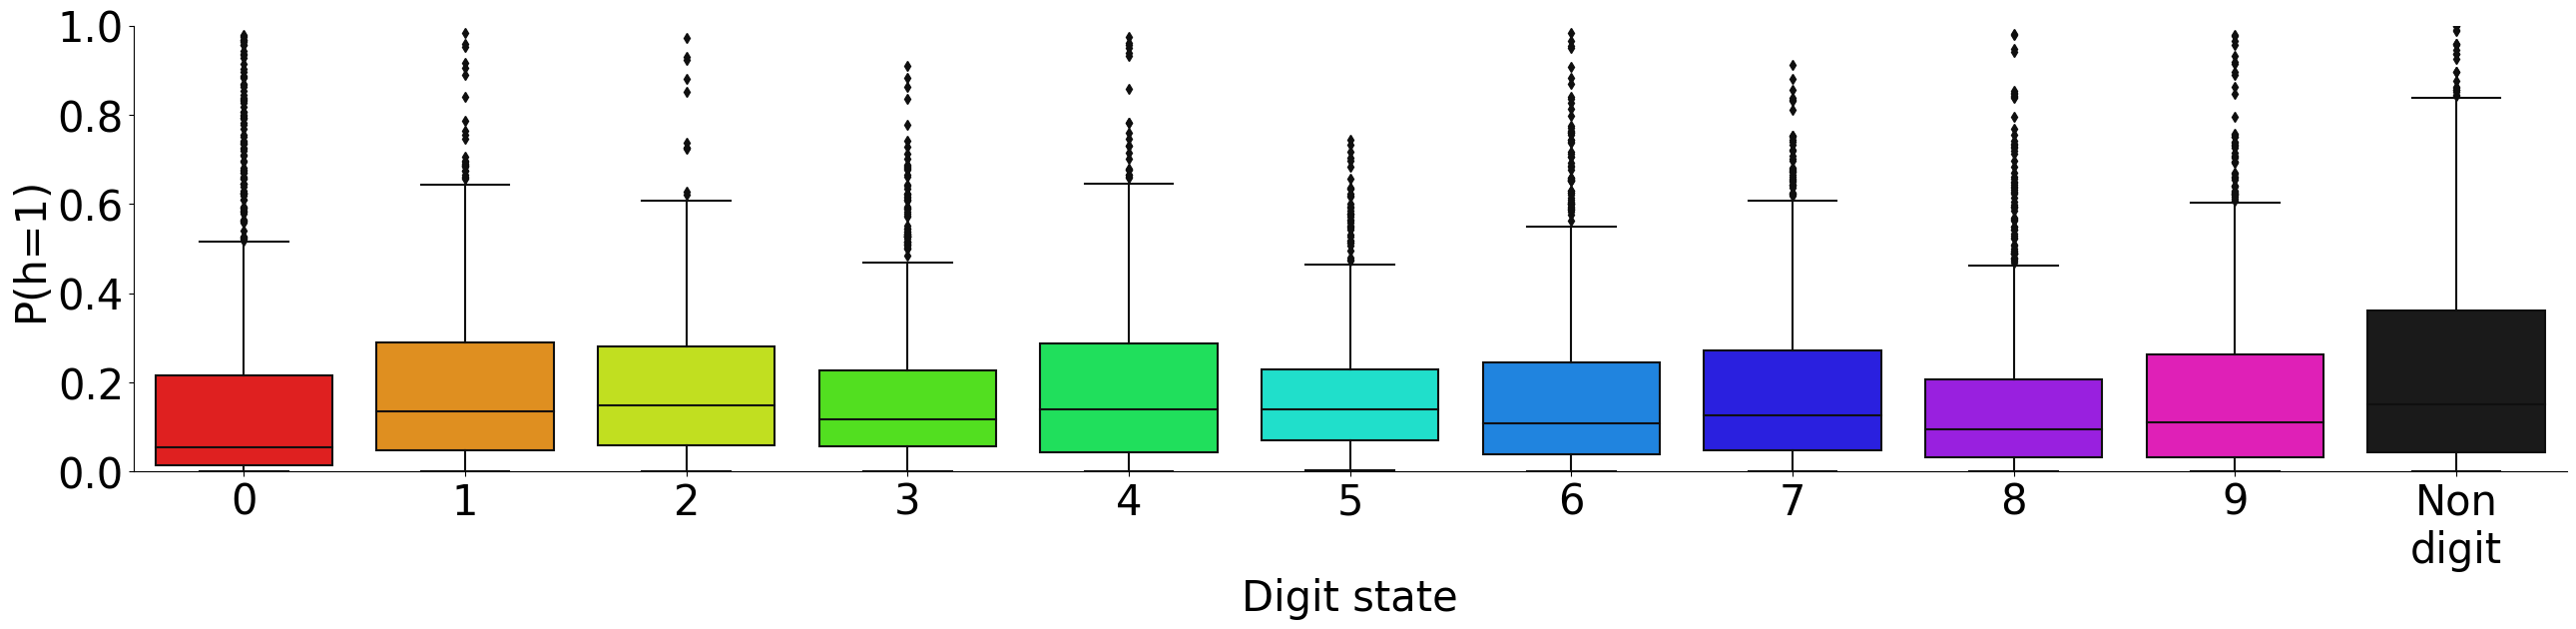

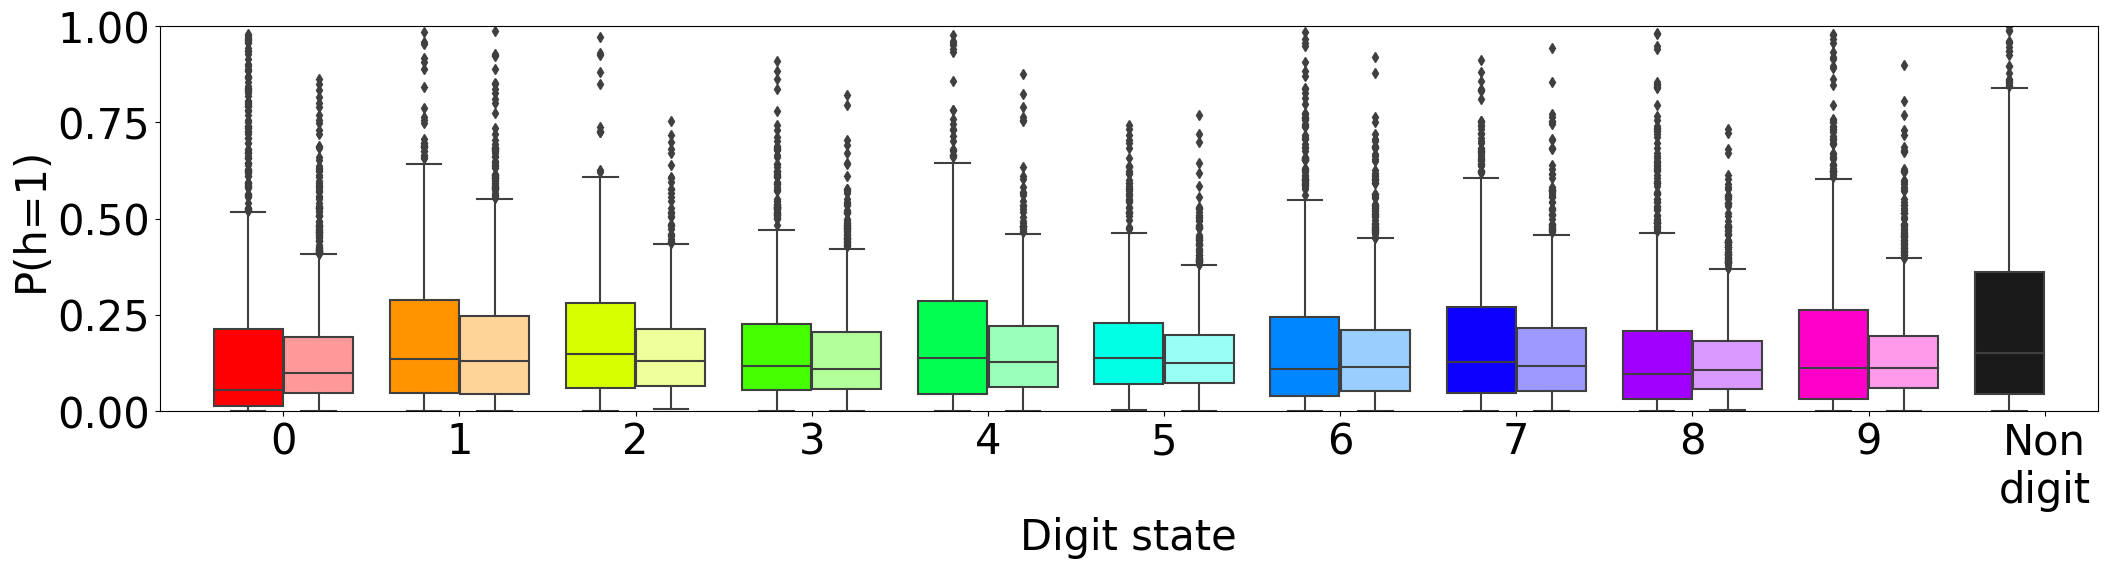

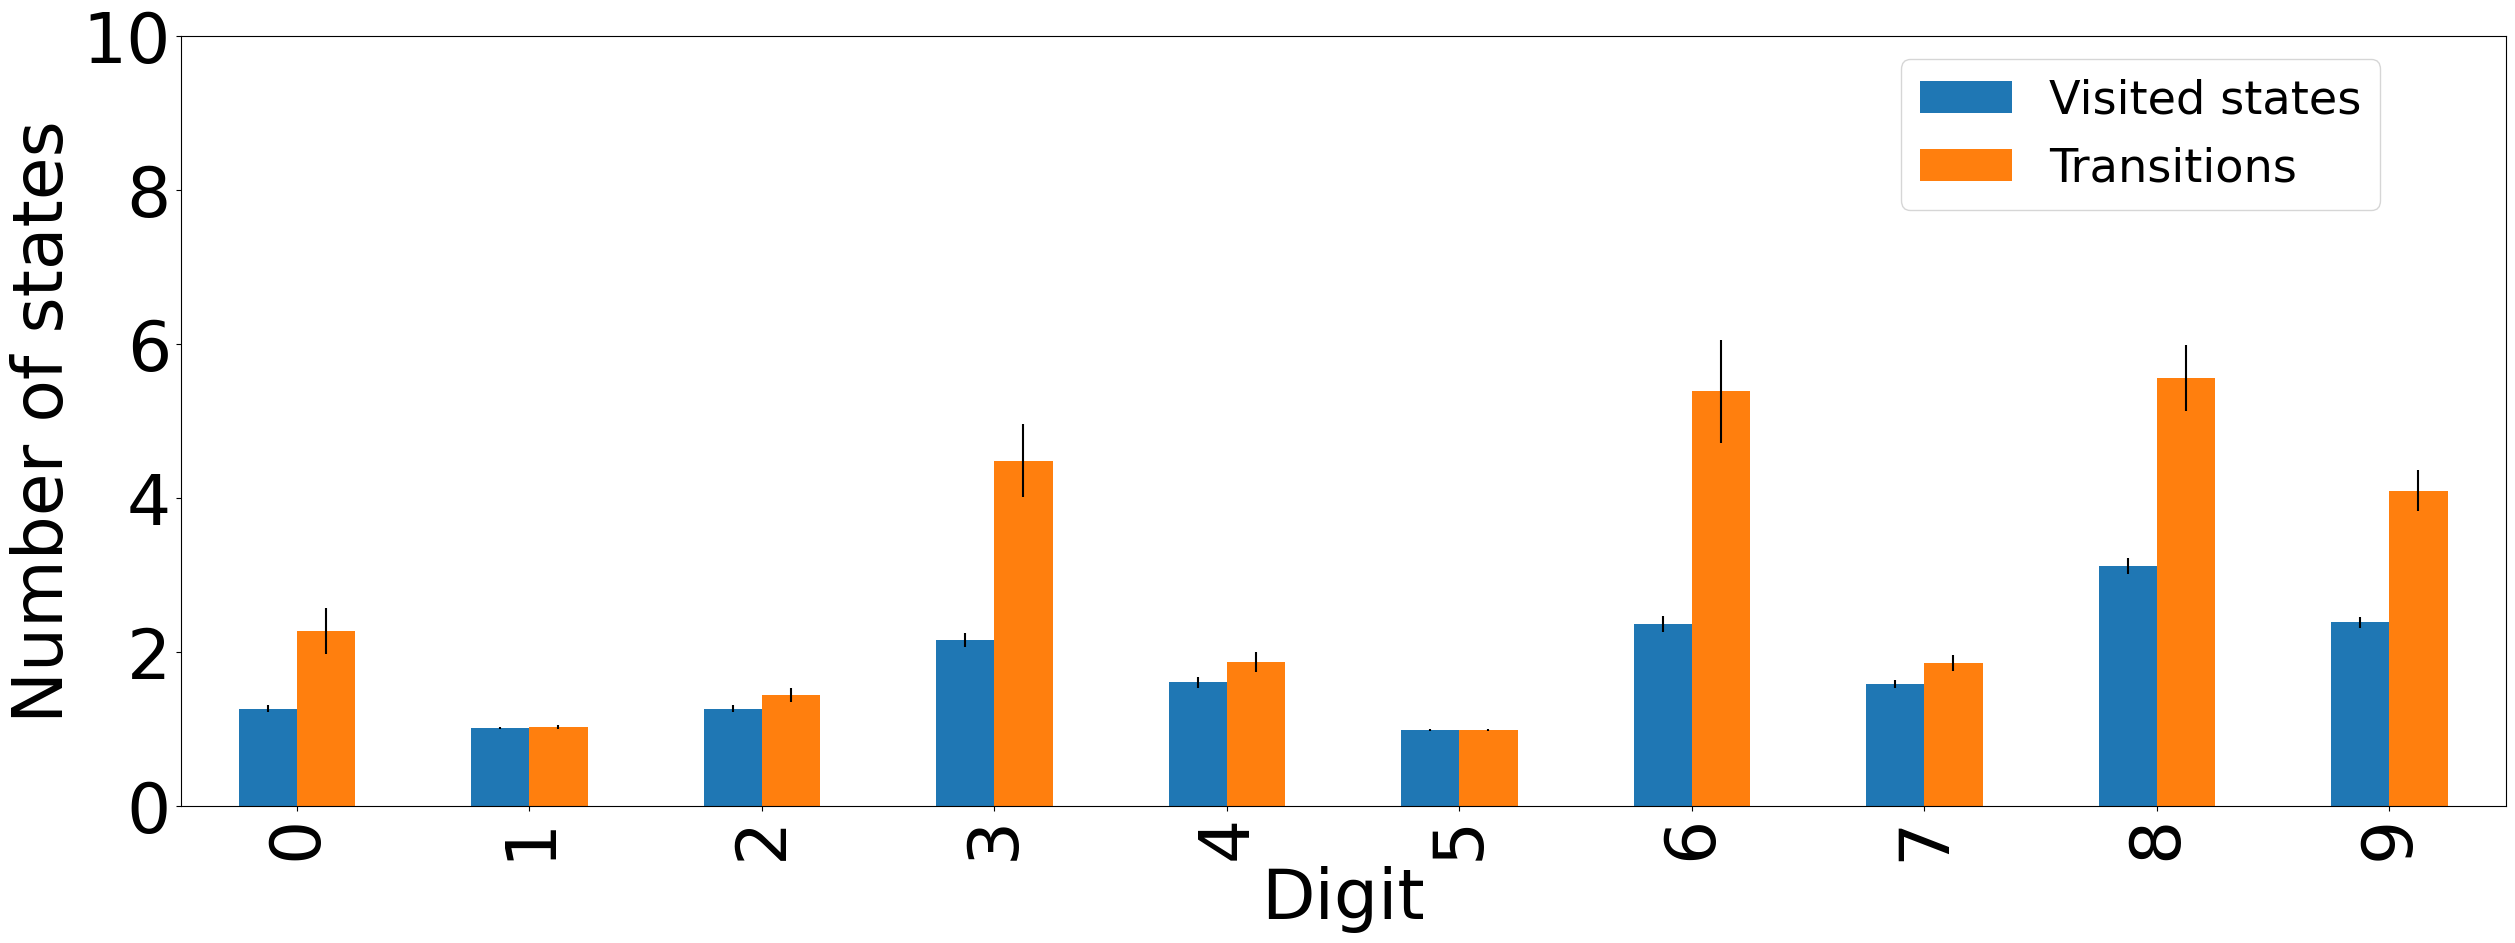

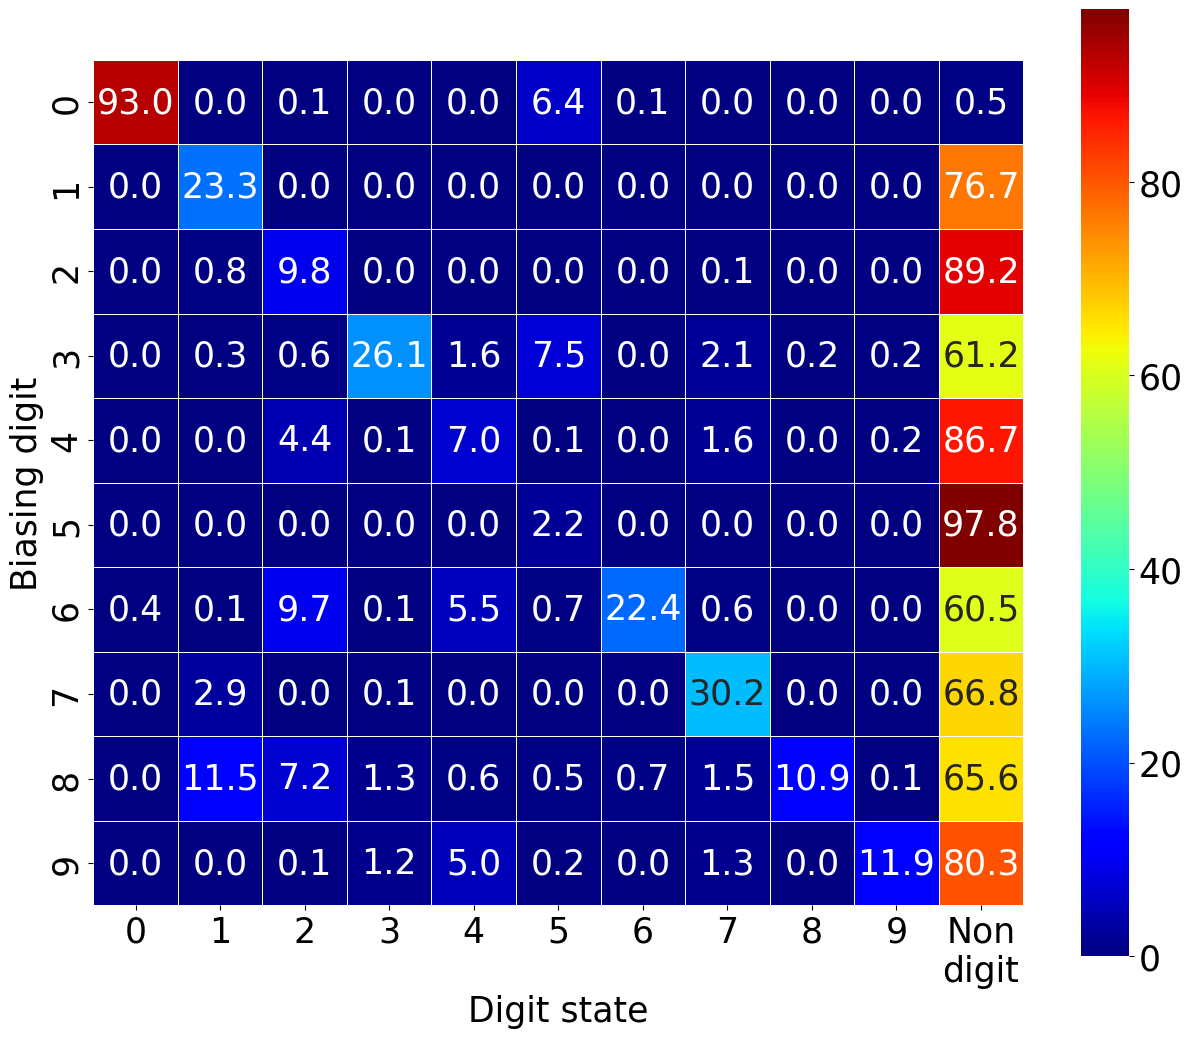

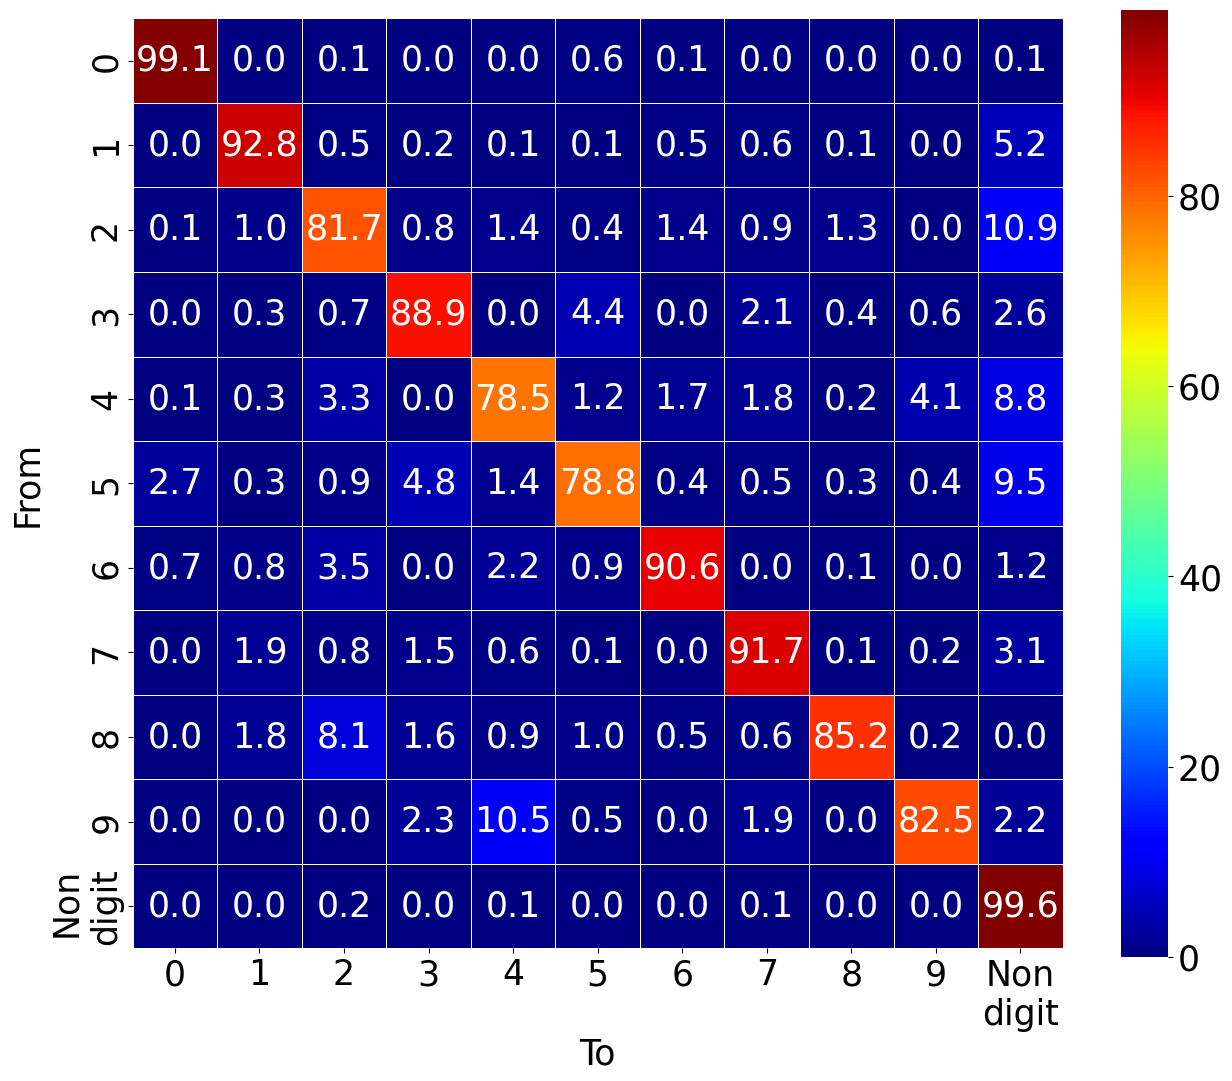

In [ ]:
#Classical label biasing generation
for i in range(10):
  gen_hidden = label_biasing(model, on_digits= i, topk = -1)
  if i == 0:
    H0to9 = gen_hidden
  else:
    H0to9 = torch.hstack((H0to9,gen_hidden))
vis_lbl_bias, gen_hidden_act=model.label_biasing(nr_steps=nr_steps)

#visible layer quantifications 
LblBiasGenerated_imgs=d_LblBias_t1_allH['vis_states']
VStack_labels=torch.tensor(range(10), device = 'cuda')
VStack_labels=VStack_labels.repeat(100)
d_cl = Classifier_accuracy(d_LblBias_t1_allH, VGG_cl,model, labels=VStack_labels, plot=2,dS = 50, l_sz = 5)
Mean, Sem = Digitwise_metrics_plot(model,sample_test_labels, sample_test_data,gen_data_dictionary=d_LblBias_t1_allH, metric_type='perc_act_H')

average_Hid, Active_hid, Active_hid_SEM =hidden_states_analysis(d_LblBias_t1_allH,d_cl,Lbl_biasing_probs =H0to9, aspect_ratio=5)
print('AVg H activity non-digit: '+ str(Active_hid[-1])+'\pm'+str(Active_hid_SEM[-1]))
print('AVG H activity digits: ' + str(torch.mean(Active_hid[:-1]))) # \pm 0.7
df_average_classicLB,df_sem_classicLB, Transition_matrix_rowNorm_classicLB = classification_metrics(d_cl,model,VStack_labels,dS=50)

# Reconstruct_plot(vis_lbl_bias, model, nr_steps=nr_steps, temperature= temperature,row_step = 10, d_type='lbl_biasing',dS=30)
#Accuracy_fof_k(VGG_cl, model,start = 0,step = 50,stop = 1000, new_data = False)

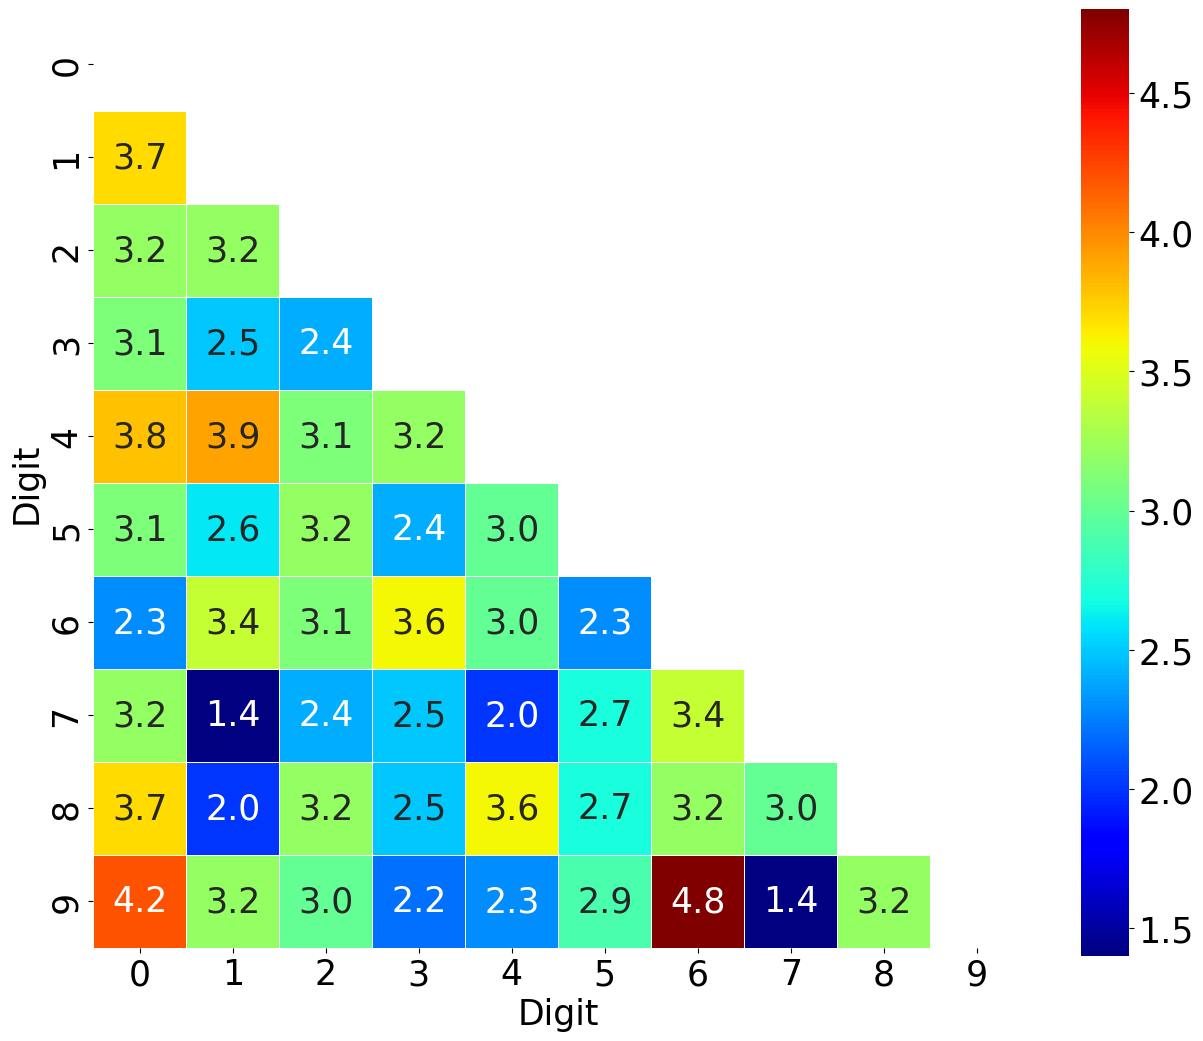

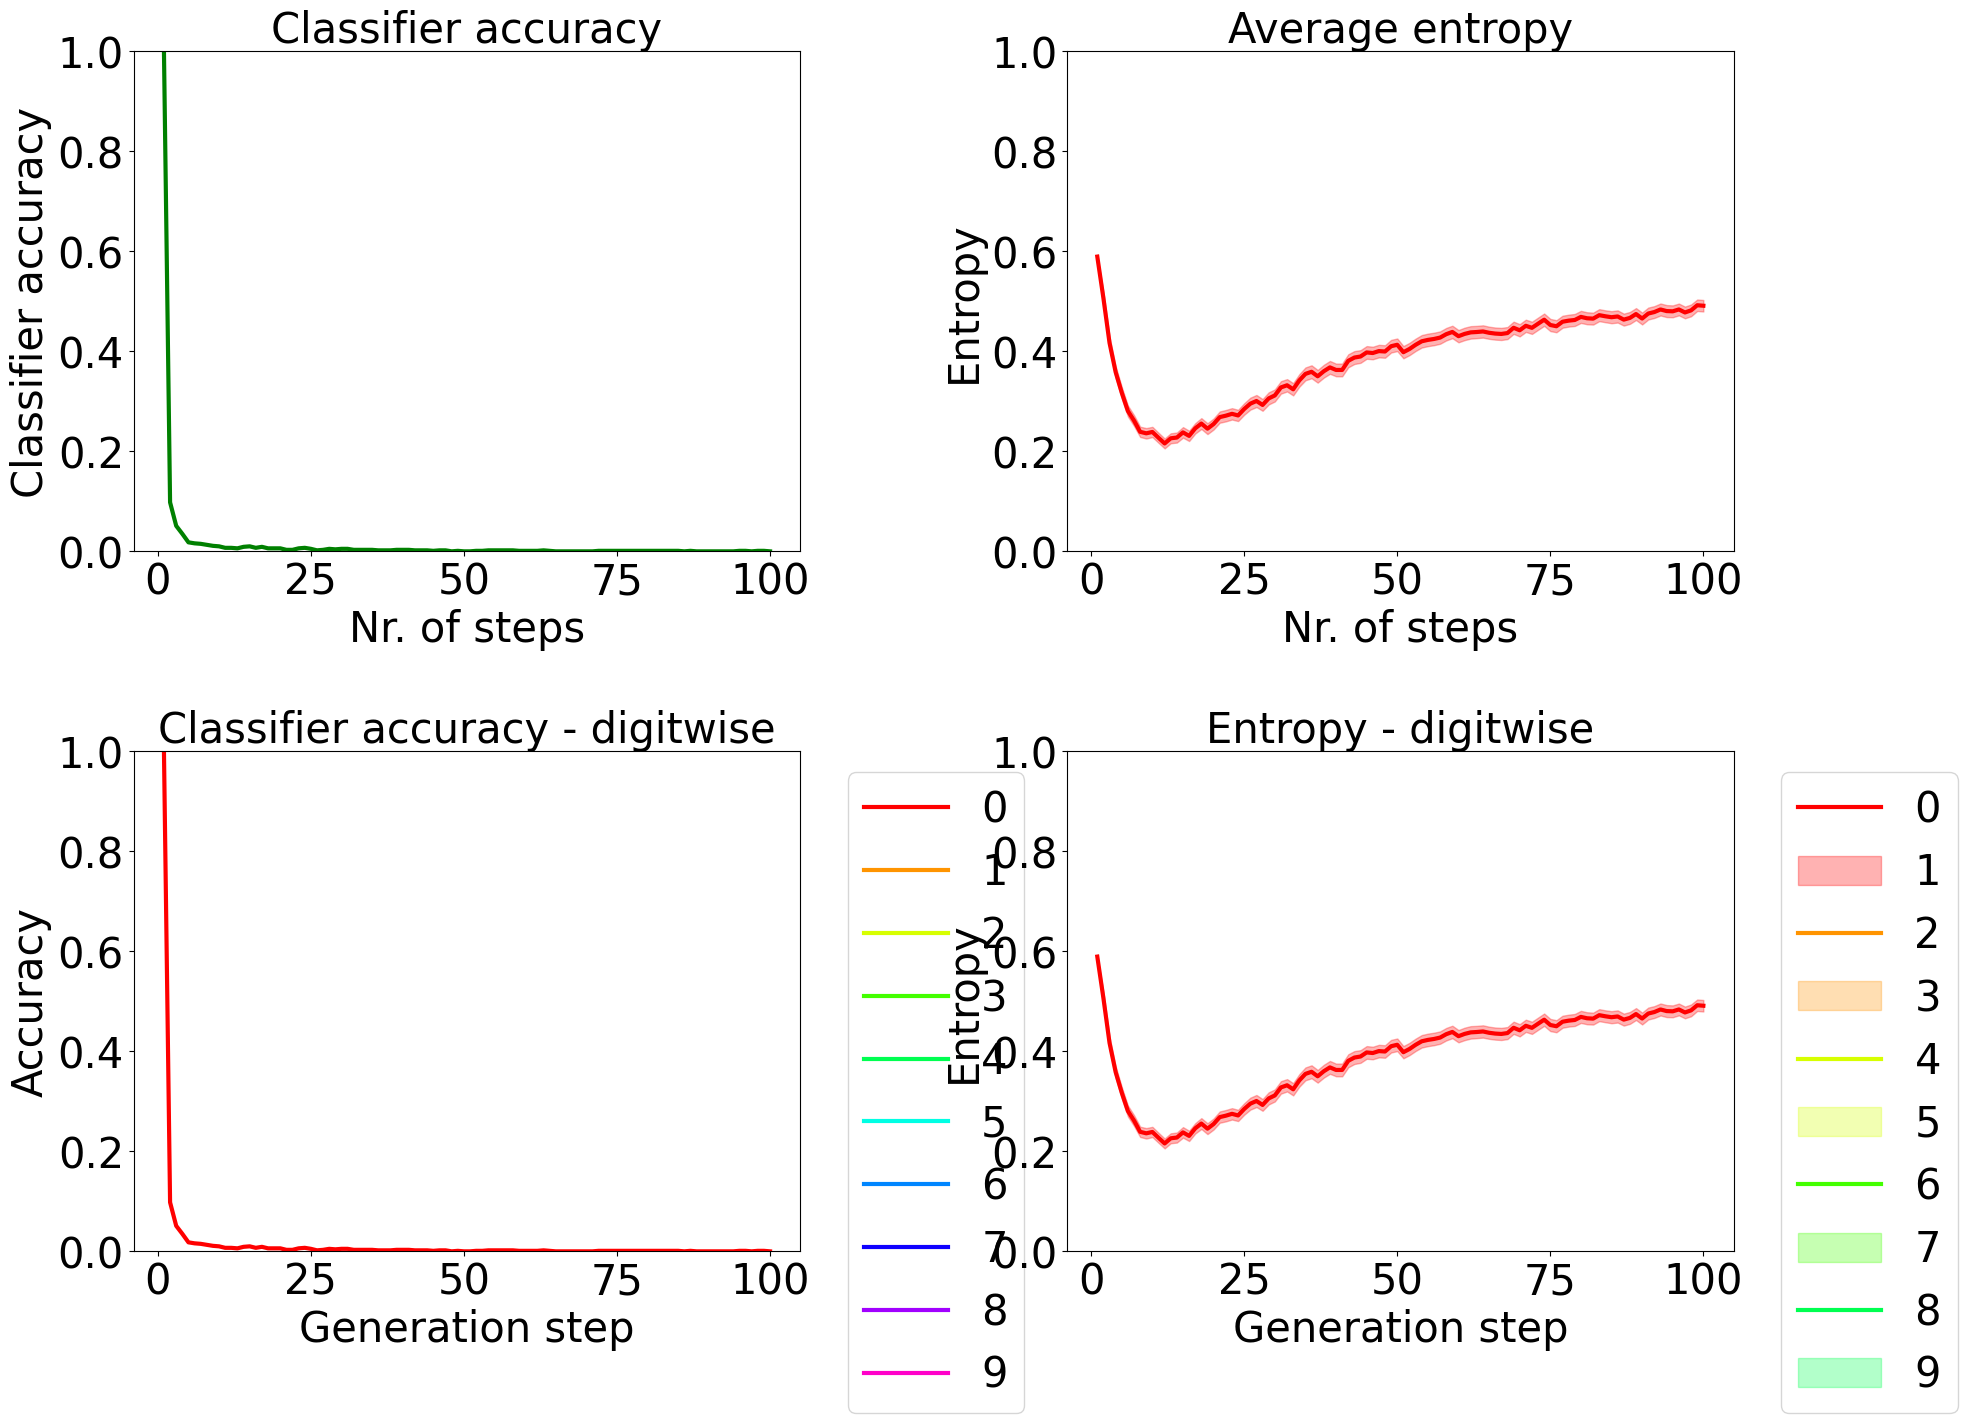

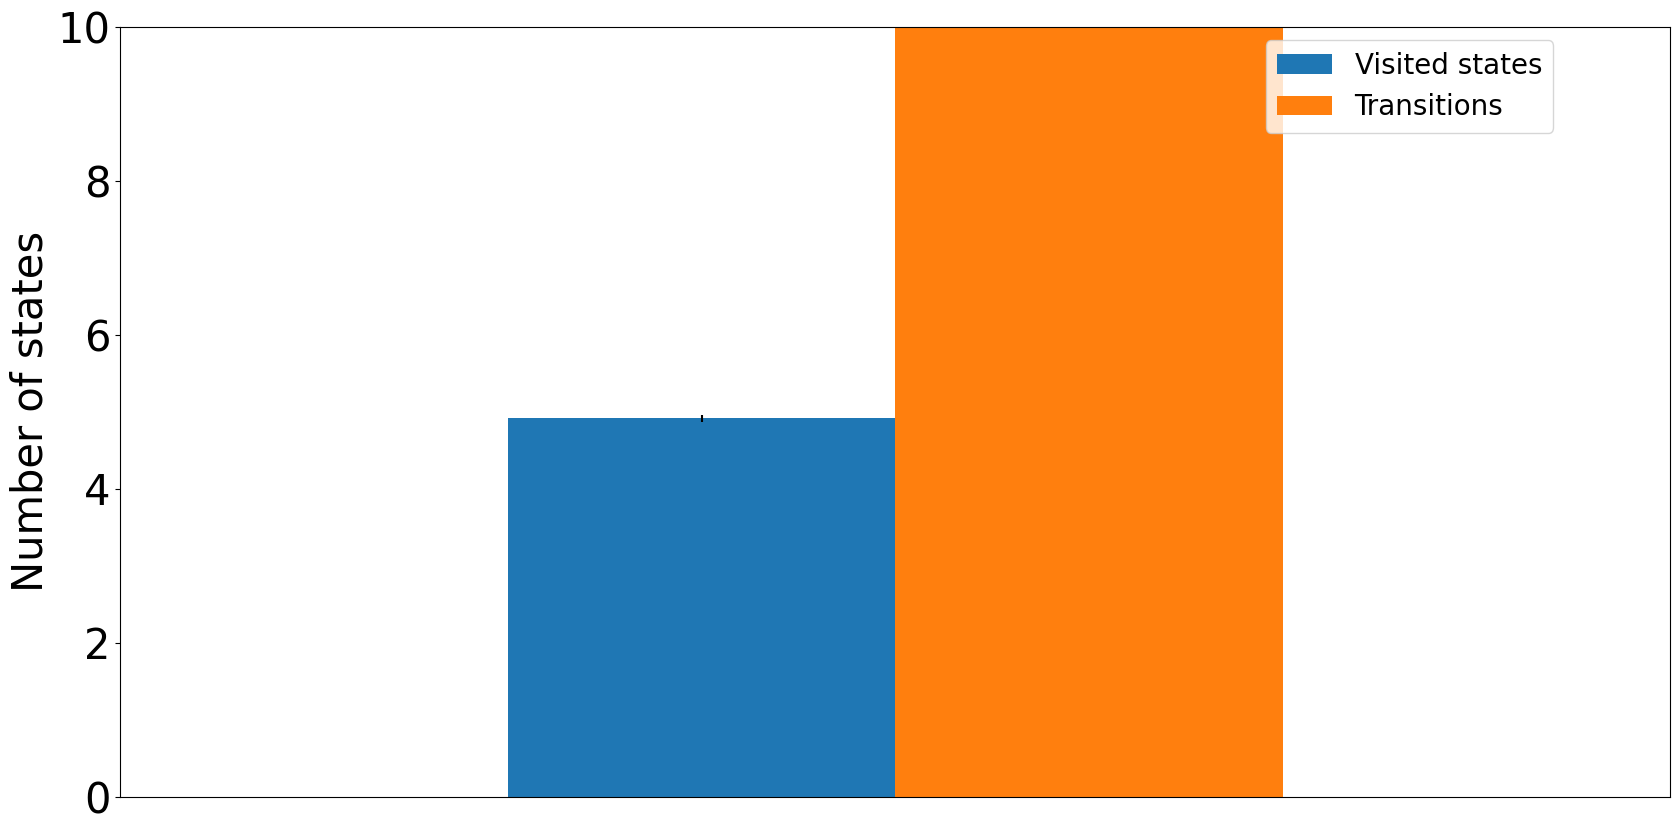

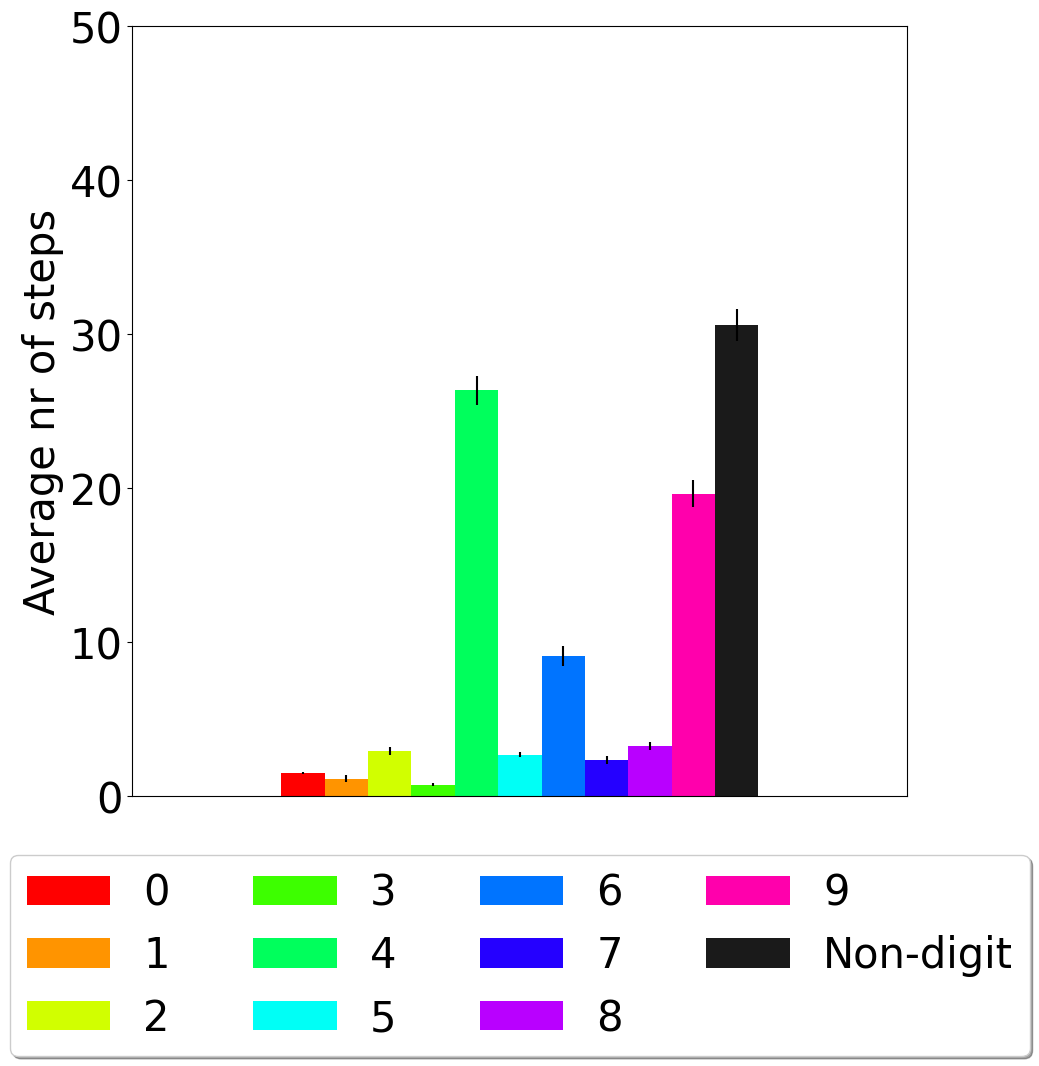

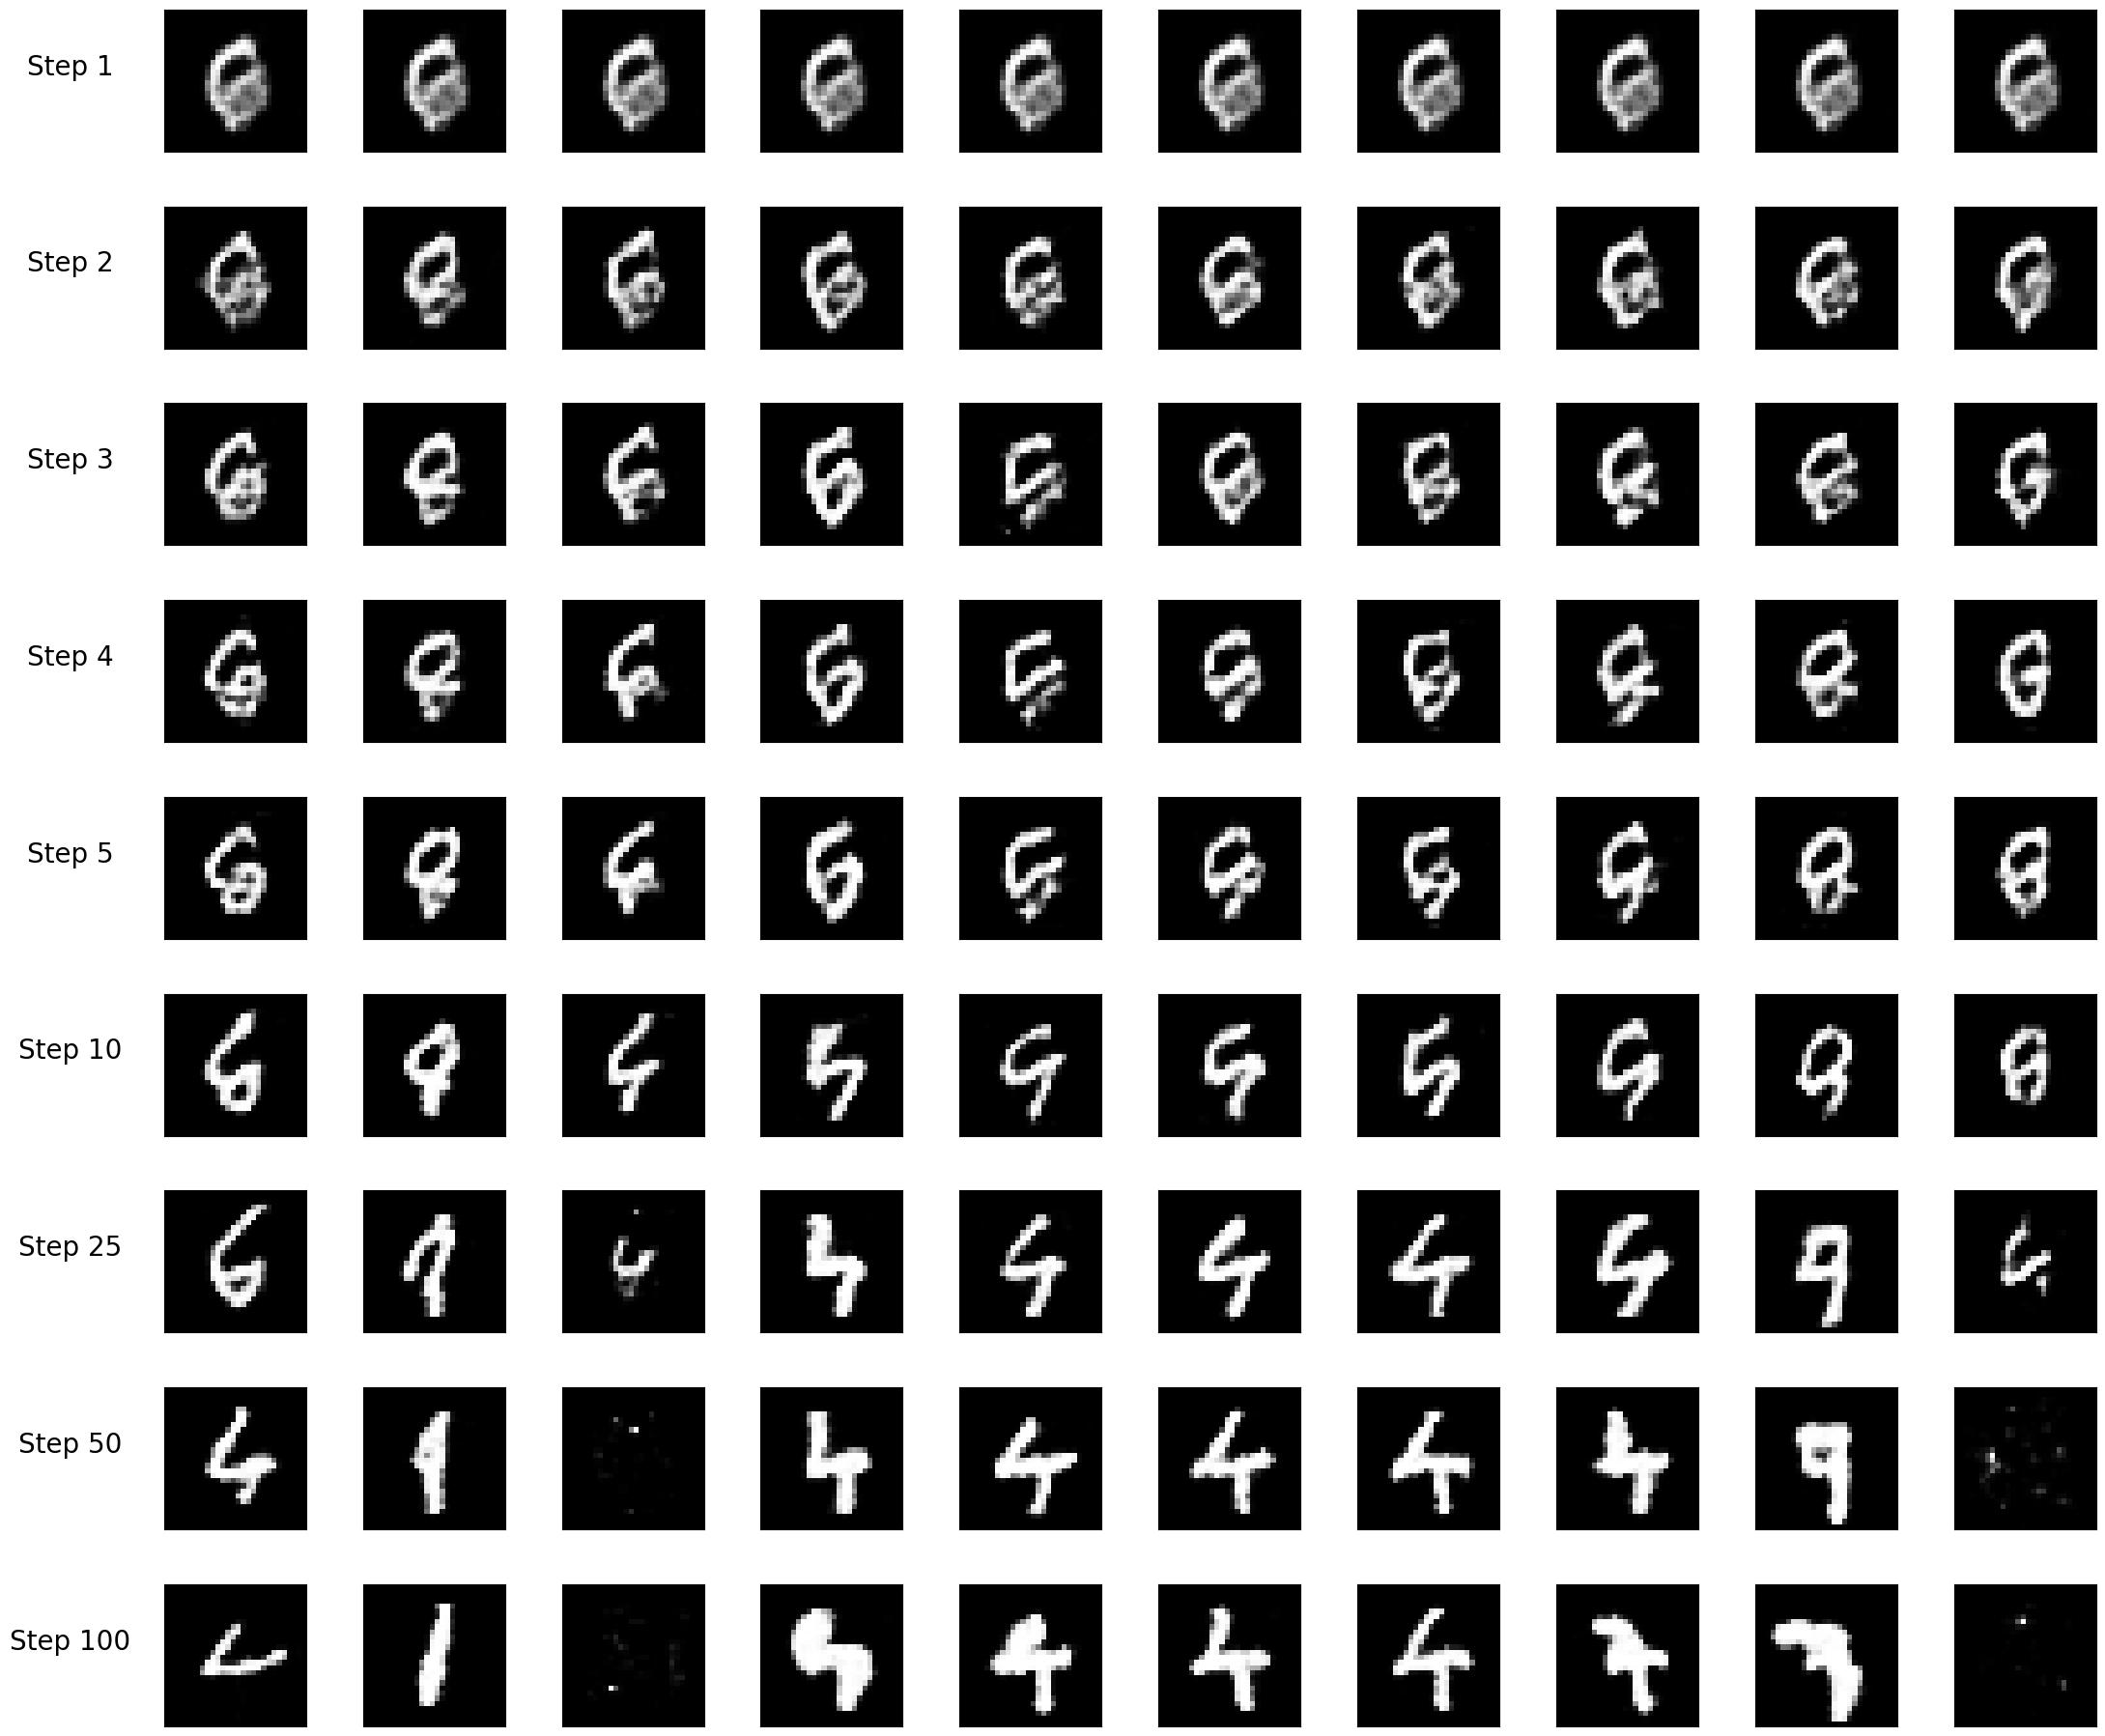

In [ ]:
#Intersection - classical without entropy correction
Vis_states_mat_IntNoCorr, Vis_states_err_IntNoCorr, ND_stateTime_mat_IntNoCorr, ND_stateTime_err_IntNoCorr = Chimeras_nr_visited_states(model, VGG_cl, Ian =Ian, apprx=1,plot=1,compute_new=0, nr_sample_generated =100, entropy_correction=[], lS=25)

max_index = np.nanargmax(Vis_states_mat_IntNoCorr)
# Find the row and column indices of the maximum value
max_row, max_col = np.unravel_index(max_index, Vis_states_mat_IntNoCorr.shape)
d, df_average,df_sem, Transition_matrix_rowNorm = Ian.generate_chimera_lbl_biasing(VGG_cl, elements_of_interest = [max_row, max_col],plot=1, nr_of_examples = 1000, temperature = 1, entropy_correction=[])
Reconstruct_plot(d['vis_states'][:10,:,:], model, nr_steps=100, temperature= 1,row_step = 10, d_type='reconstructed', consider_top = 1000, dS=20)


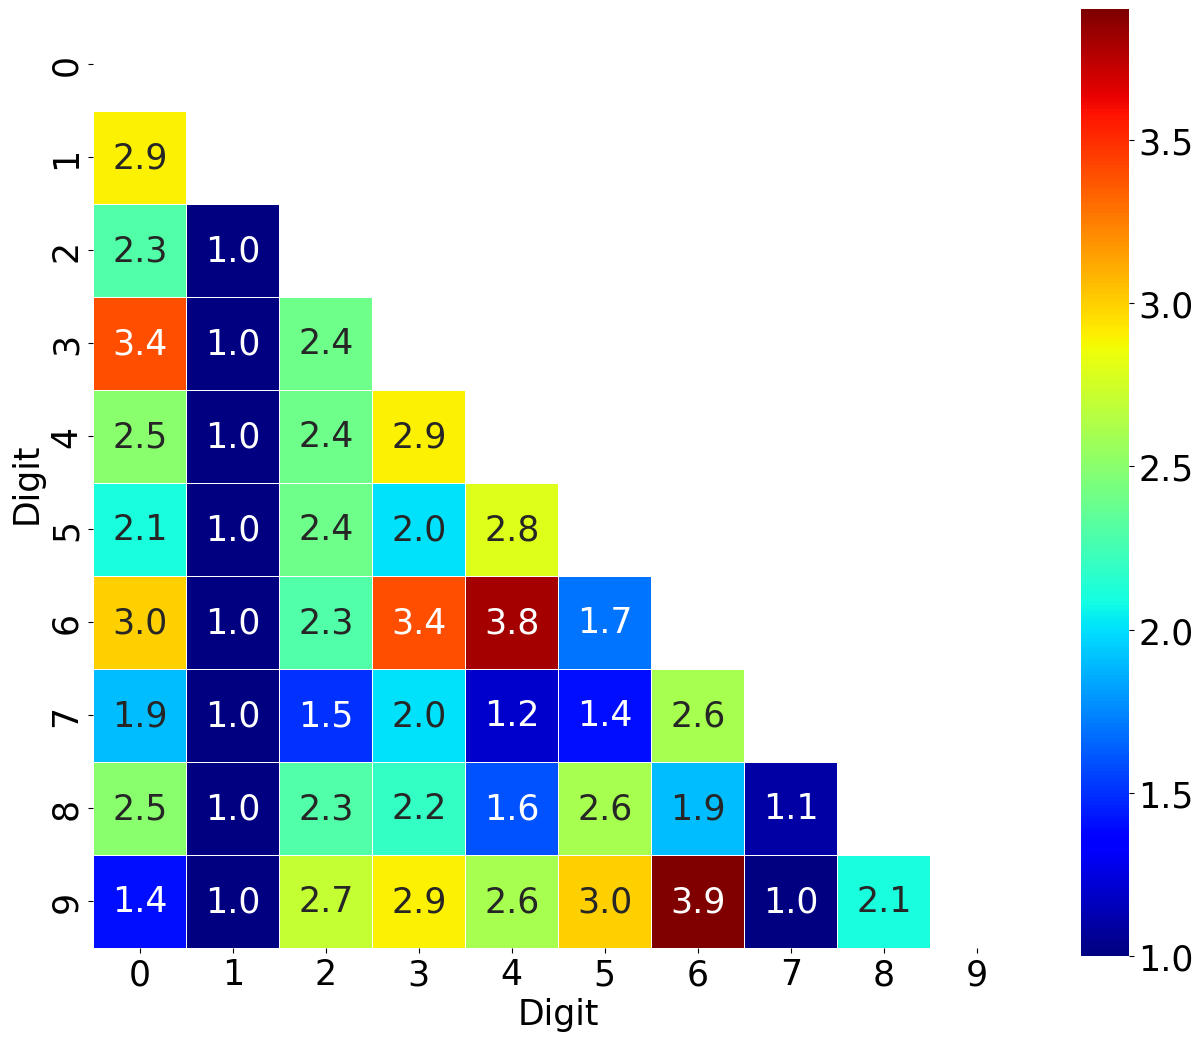

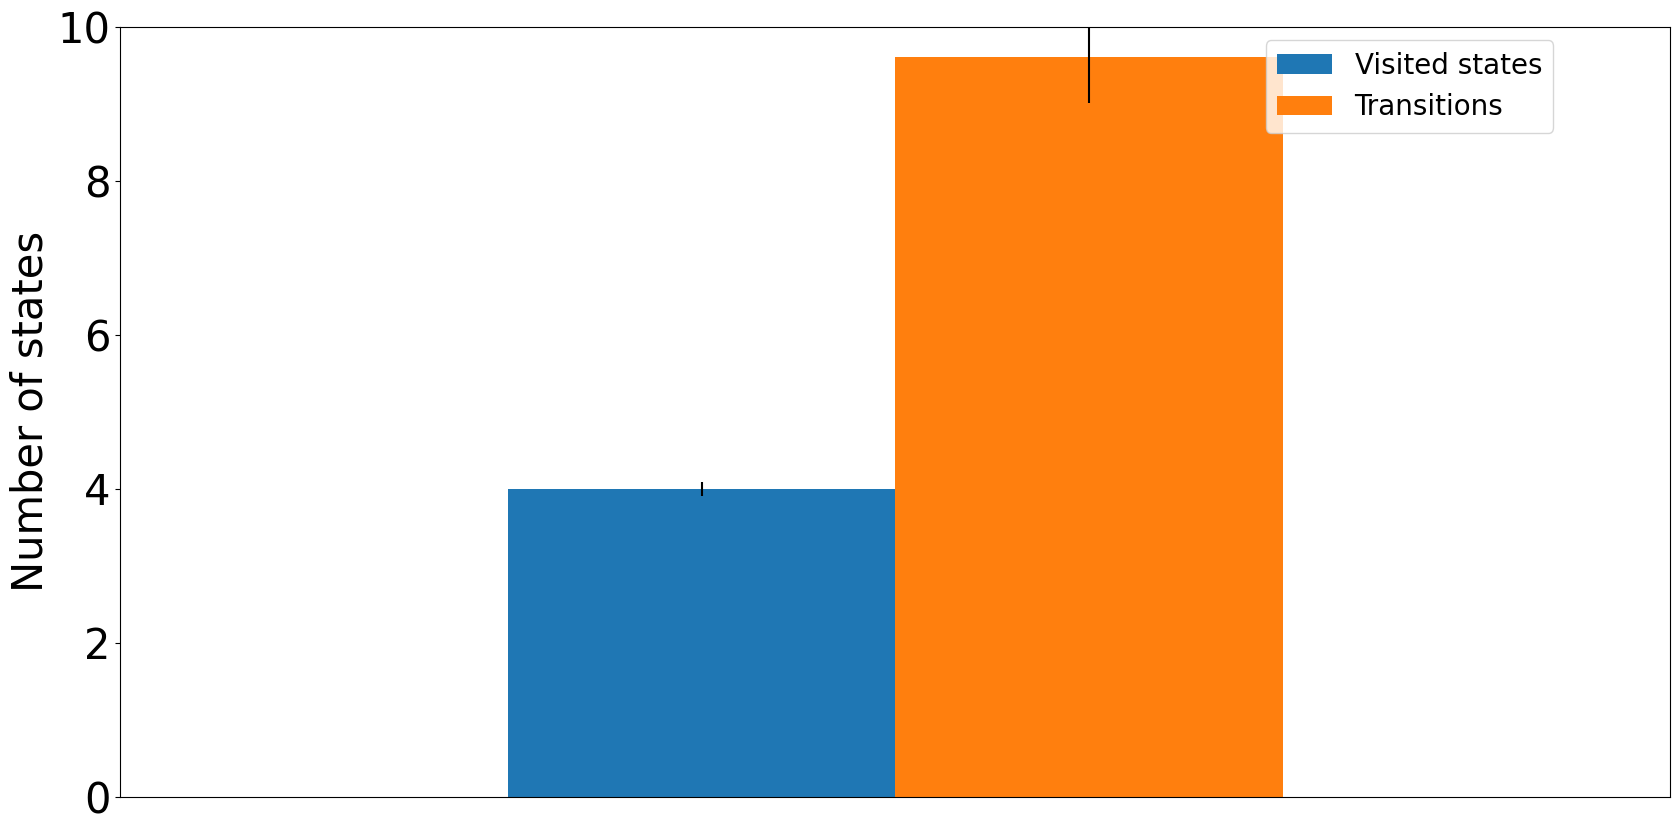

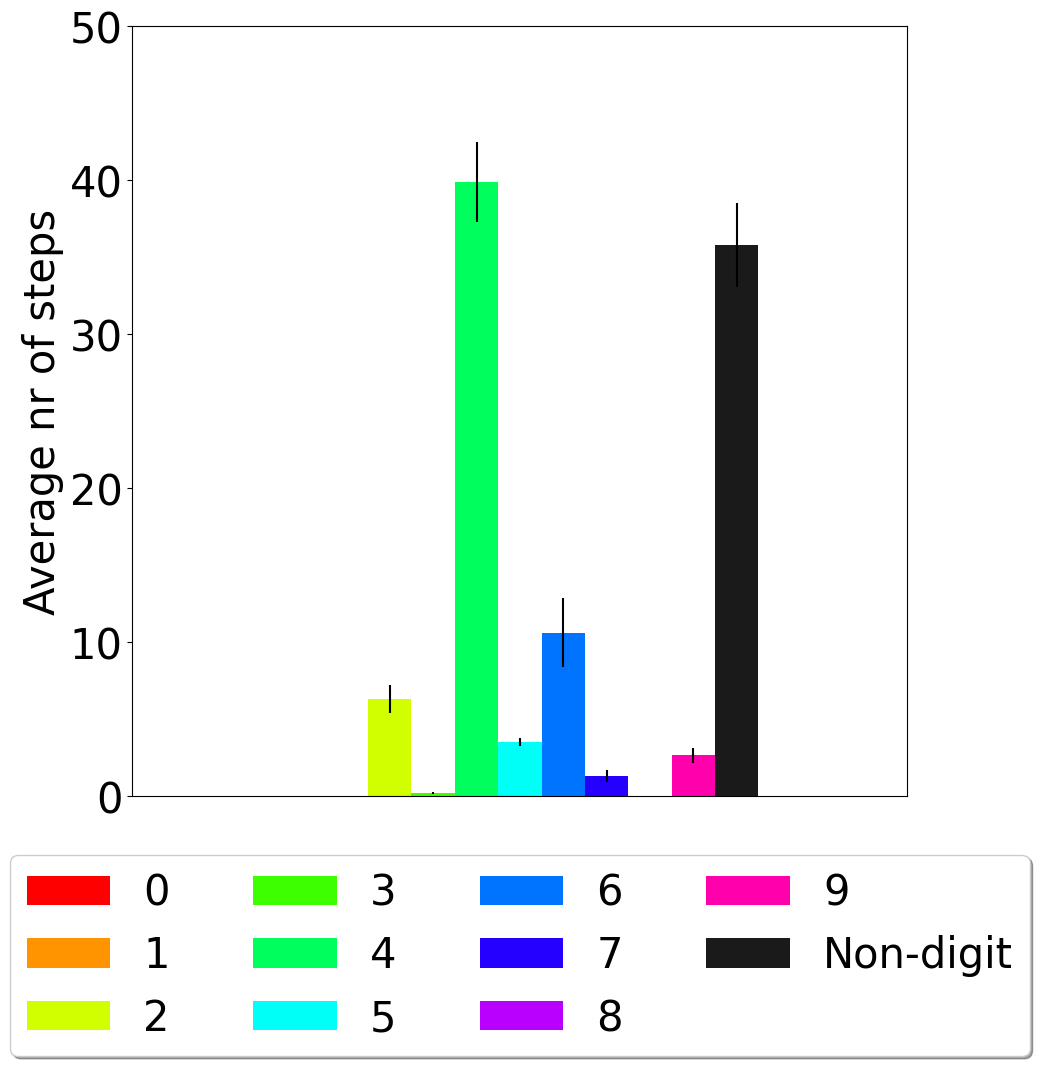

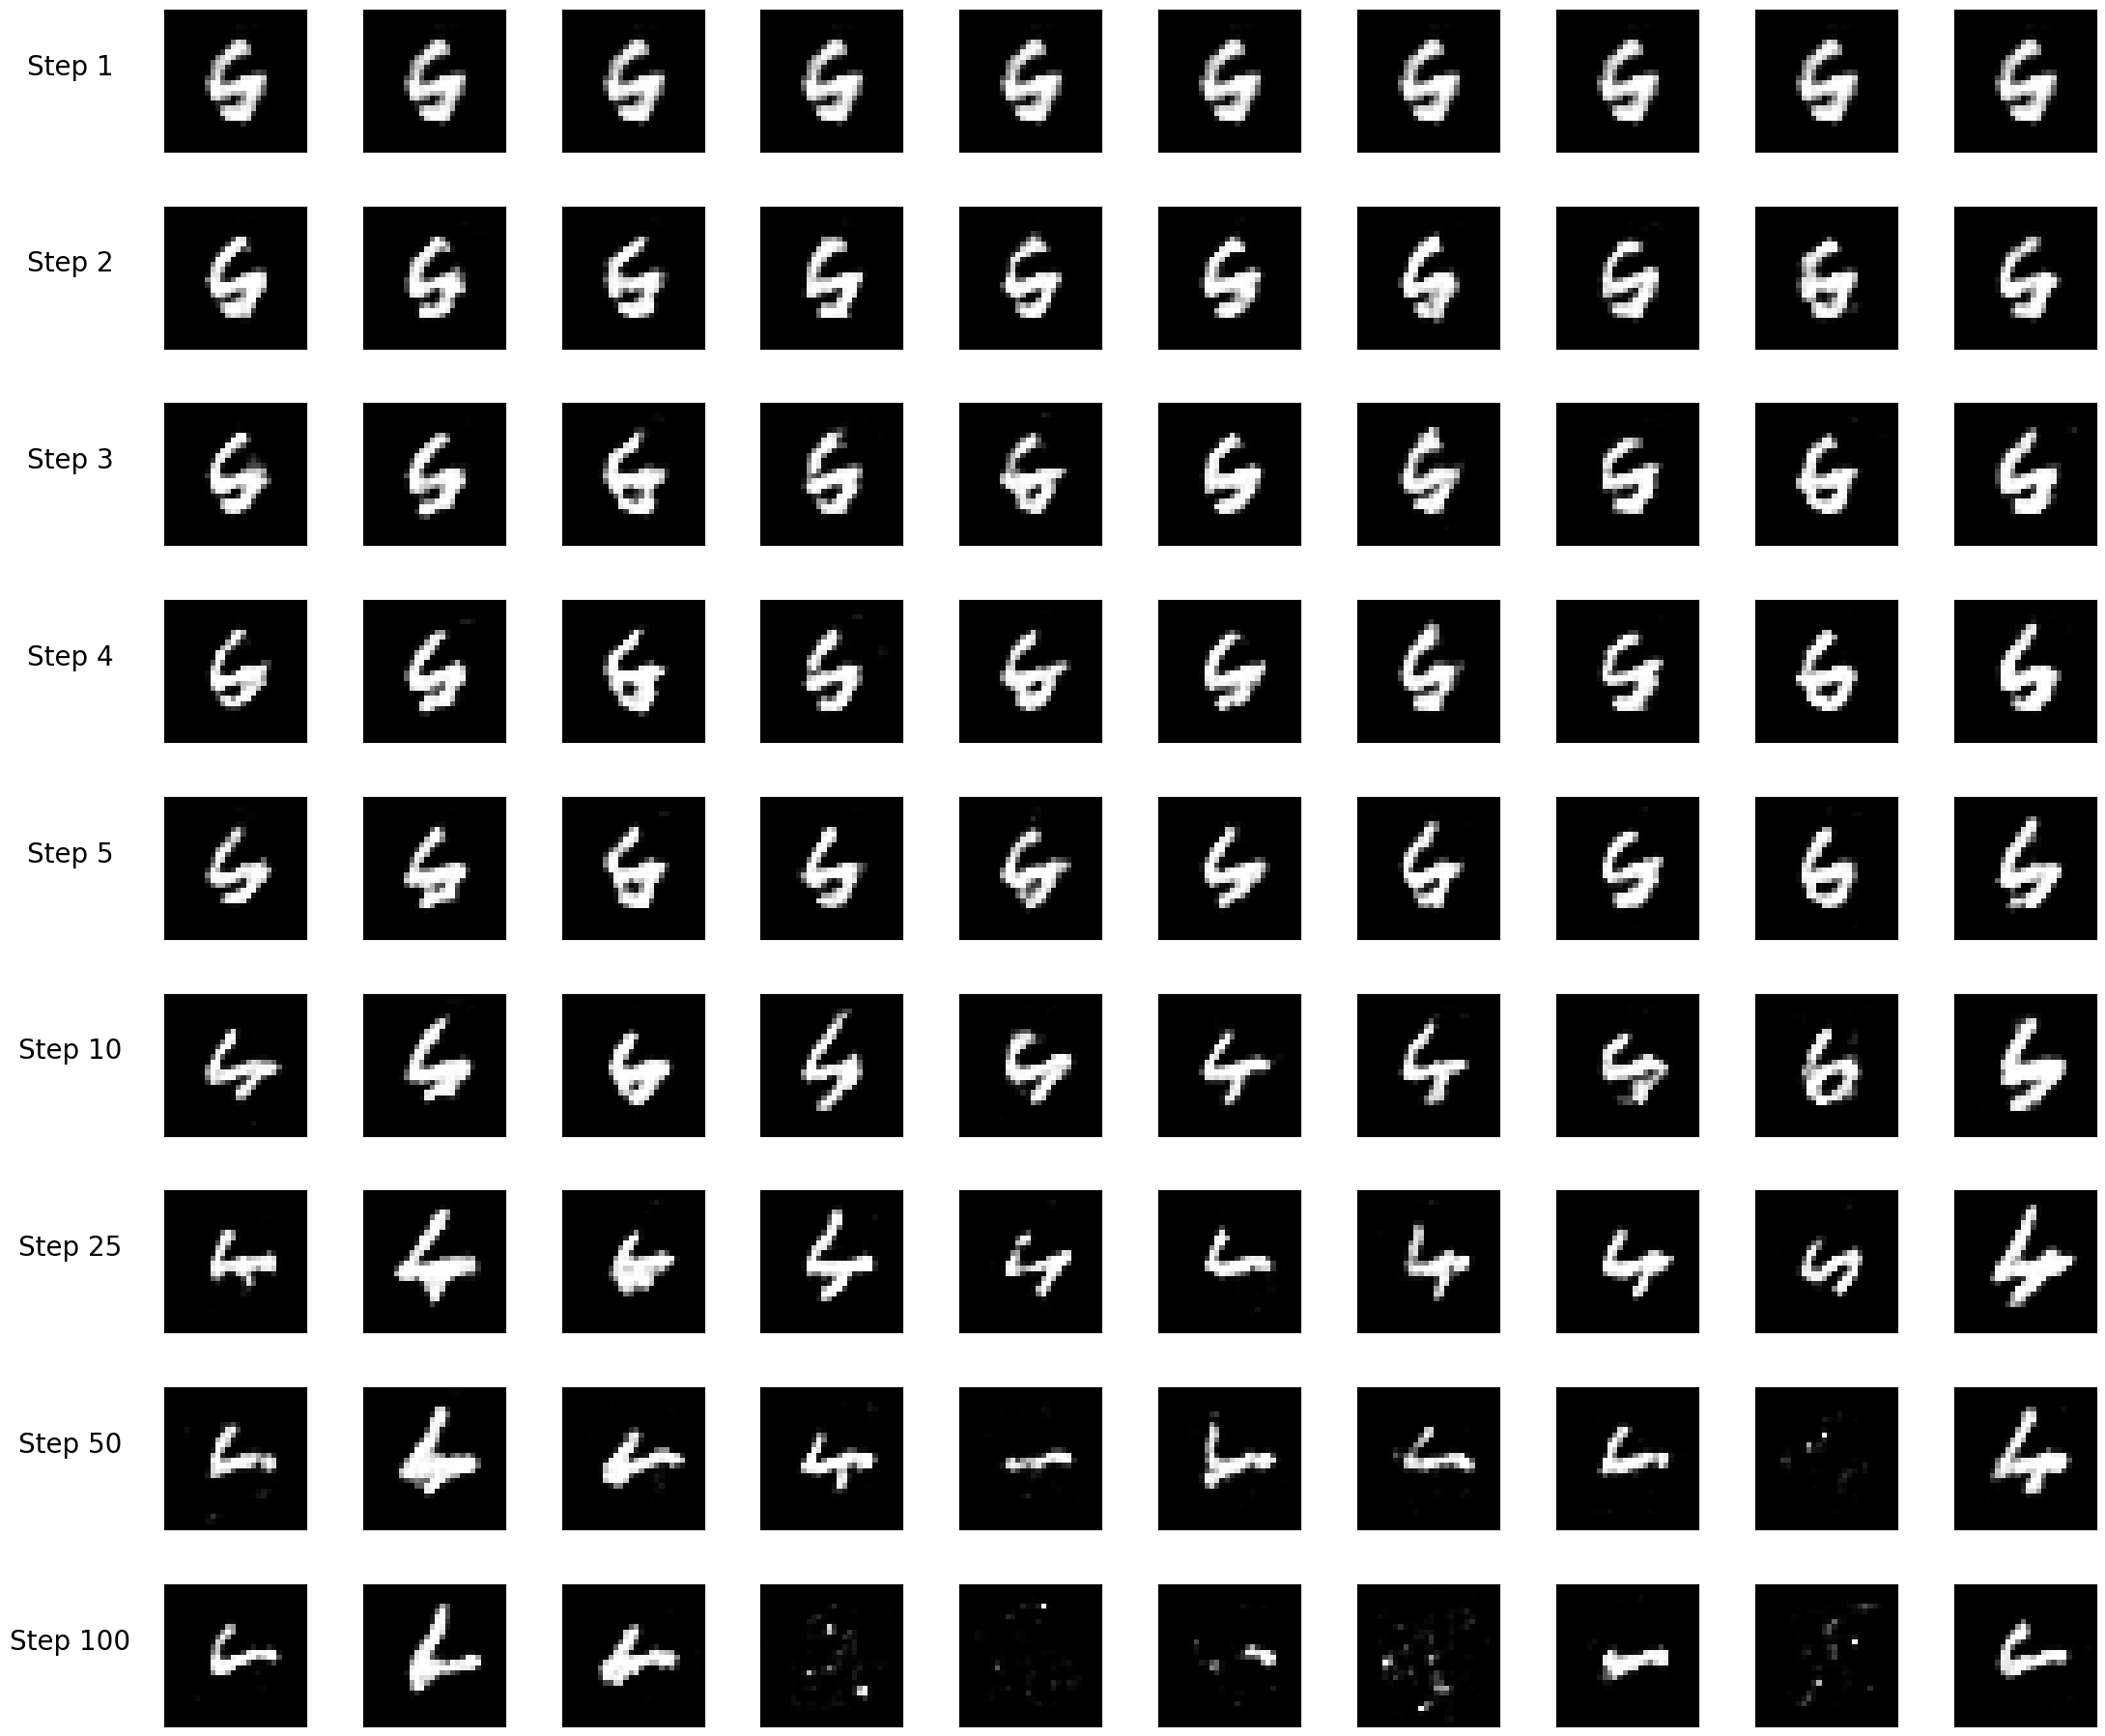

In [ ]:
#Intersection - label biasing without entropy correction
topk=149
Vis_states_mat_LBNoCorr, Vis_states_err_LBNoCorr,  ND_stateTime_mat_LBNoCorr, ND_stateTime_err_LBNoCorr  = Chimeras_nr_visited_states(model, VGG_cl, Ian =[], topk=topk, apprx=1,plot=1,compute_new=0, nr_sample_generated =100, entropy_correction=[], lS=25)
max_index = np.nanargmax(Vis_states_mat_LBNoCorr)
# Find the row and column indices of the maximum value
max_row, max_col = np.unravel_index(max_index, Vis_states_mat_LBNoCorr.shape)

gen_hidden = label_biasing(model, on_digits= [max_row, max_col], topk = topk)
gen_hidden_100rep = gen_hidden.repeat(1,100)
d = generate_from_hidden(model, gen_hidden_100rep , nr_gen_steps=100, temperature=1, consider_top_k_units = 1000, include_energy = 0)
d = Classifier_accuracy(d, VGG_cl,model, labels=[], Batch_sz= 100,  plot=0, dS=30, l_sz=3)
df_average,df_sem, Transition_matrix_rowNorm = classification_metrics(d,model, Plot=1, Ian=1)
Plot_example_generated(d, model,row_step = 10, dS=20, custom_steps = True, Show_classification = False)

In [ ]:
#misure con propagazione dell'errore
print('avg accuracy, step 100: '+str(d_cl['Cl_accuracy'][-1]))
print('accuracy digit 0, step 100: '+str(d_cl['digitwise_acc'][0,-1]))
# calcola la matrice di correlazione

xy = torch.stack([d_cl['Cl_accuracy'].cuda(), d_cl['MEAN_entropy'].cuda()], dim=0)
corr_matrix = torch.corrcoef(xy)
print('corrcoef avg accuracy - avg entropy classifier: '+ str(corr_matrix[0,1]))

print('mean H active-step 0: '+str(torch.mean(Mean[:,0])) + ' pm ' +str(error_propagation(Mean[:,0].cpu(), Sem[:,0].cpu(), operation = 'average')))
print('mean H active-step 100: '+str(torch.mean(Mean[:,-1])) + ' pm ' +str(error_propagation(Mean[:,-1].cpu(), Sem[:,-1].cpu(), operation = 'average')))

print('average nr of visited states label biasing classico: '+str(np.mean(df_average_classicLB['Nr_visited_states']))+ ' pm ' +str(error_propagation(df_average_classicLB['Nr_visited_states'], df_sem_classicLB['Nr_visited_states'], operation = 'average')))
print('average nr of transitions label biasing classico: '+str(np.mean(df_average_classicLB['Nr_transitions']))+ ' pm ' +str(error_propagation(df_average_classicLB['Nr_transitions'], df_sem_classicLB['Nr_transitions'], operation = 'average')))

print('avg transition probability from a digit to itself: '+ str(torch.mean(torch.diag(Transition_matrix_rowNorm_classicLB, 0)[:-1]))+ ' pm ' +str(torch.std(torch.diag(Transition_matrix_rowNorm_classicLB, 0)[:-1])/math.sqrt(len(torch.diag(Transition_matrix_rowNorm_classicLB, 0)[:-1]))))
non_diag = Transition_matrix_rowNorm_classicLB[torch.eye(Transition_matrix_rowNorm_classicLB.shape[0], dtype=torch.bool) == 0]

print('avg transition probability from a digit to another: '+ str(torch.mean(non_diag))+ ' pm ' +str(torch.std(non_diag)/math.sqrt(len(torch.diag(non_diag)))))
print('average non digit state time - digits other than 0: '+ str(np.mean(df_average_classicLB['Non-digit'][1:])) + ' pm '+ str(error_propagation(df_average_classicLB['Non-digit'][1:], df_sem_classicLB['Non-digit'][1:], operation = 'average')))

print('average visited states intersection method: '+str(np.nanmean(Vis_states_mat_IntNoCorr)) + ' pm ' + str(error_propagation(Vis_states_mat_IntNoCorr[~np.isnan(Vis_states_mat_IntNoCorr)].flatten(),Vis_states_err_IntNoCorr.T[~np.isnan(Vis_states_mat_IntNoCorr)].flatten(), operation = 'average' )))
print('average non num state time intersection method: '+str(np.mean(ND_stateTime_mat_IntNoCorr.T[~np.isnan(Vis_states_mat_IntNoCorr)].flatten())) + ' pm ' + str(error_propagation(ND_stateTime_mat_IntNoCorr.T[~np.isnan(Vis_states_mat_IntNoCorr)].flatten(),ND_stateTime_err_IntNoCorr.T[~np.isnan(Vis_states_mat_IntNoCorr)].flatten(), operation = 'average' )))

print('average visited states double lbl biasing method: '+str(np.nanmean(Vis_states_mat_LBNoCorr)) + ' pm ' + str(error_propagation(Vis_states_mat_LBNoCorr[~np.isnan(Vis_states_mat_LBNoCorr)].flatten(),Vis_states_err_LBNoCorr.T[~np.isnan(Vis_states_mat_LBNoCorr)].flatten(), operation = 'average' )))
print('average non num state time double lbl biasing method: '+str(np.mean(ND_stateTime_mat_LBNoCorr.T[~np.isnan(Vis_states_mat_LBNoCorr)].flatten())) + ' pm ' + str(error_propagation(ND_stateTime_mat_LBNoCorr.T[~np.isnan(Vis_states_mat_LBNoCorr)].flatten(),ND_stateTime_err_LBNoCorr.T[~np.isnan(Vis_states_mat_LBNoCorr)].flatten(), operation = 'average' )))

print('correlation nr visited states intersection and double Lbl biasing: ' + str(np.corrcoef(Vis_states_mat_IntNoCorr[~np.isnan(Vis_states_mat_IntNoCorr)].flatten(), Vis_states_mat_LBNoCorr[~np.isnan(Vis_states_mat_LBNoCorr)].flatten())[0,1]))
print('(supplementary) mann whitney (independent samples) comparison - nr visited states - intersection and double Lbl biasing:' + str(scipy.stats.mannwhitneyu(Vis_states_mat_IntNoCorr[~np.isnan(Vis_states_mat_IntNoCorr)].flatten(), Vis_states_mat_LBNoCorr[~np.isnan(Vis_states_mat_LBNoCorr)].flatten())))

print('mann whitney (independent samples) comparison - nr visited states - intersection vs classic Lbl biasing: ' + str(scipy.stats.mannwhitneyu(Vis_states_mat_IntNoCorr[~np.isnan(Vis_states_mat_IntNoCorr)].flatten(),df_average_classicLB['Nr_visited_states'].values.astype(np.float64), alternative='greater')))
print('mann whitney (independent samples) comparison - nr visited states - double label biasing vs classic Lbl biasing: ' +str(scipy.stats.mannwhitneyu(Vis_states_mat_LBNoCorr[~np.isnan(Vis_states_mat_LBNoCorr)].flatten(),df_average_classicLB['Nr_visited_states'].values.astype(np.float64), alternative='greater')))

print('mann whitney (independent samples) comparison - non digit state time - intersection vs classic Lbl biasing: ' + str(scipy.stats.mannwhitneyu(ND_stateTime_mat_IntNoCorr.T[~np.isnan(Vis_states_mat_IntNoCorr)].flatten(),df_average_classicLB['Non-digit'].values.astype(np.float64), alternative='less')))
print('mann whitney (independent samples) comparison - non digit state time - double label biasing vs classic Lbl biasing: ' + str(scipy.stats.mannwhitneyu(ND_stateTime_mat_LBNoCorr.T[~np.isnan(Vis_states_mat_LBNoCorr)].flatten(),df_average_classicLB['Non-digit'].values.astype(np.float64), alternative='less')))




avg accuracy, step 100: tensor(0.1120)
accuracy digit 0, step 100: tensor(0.8600, device='cuda:0')
corrcoef avg accuracy - avg entropy classifier: tensor(-0.9991, device='cuda:0')
mean H active-step 0: tensor(14.9642, device='cuda:0') pm 0.07392697334289551
mean H active-step 100: tensor(21.8922, device='cuda:0') pm 0.06717563271522523
average nr of visited states label biasing classico: 1.7790000000000004 pm 0.021354156504062624
average nr of transitions label biasing classico: 2.9029999999999996 pm 0.10262066068779718
avg transition probability from a digit to itself: tensor(0.8698) pm tensor(0.0214)
avg transition probability from a digit to another: tensor(0.0119) pm tensor(0.0021)
average non digit state time - digits other than 0: 76.09888882107205 pm 0.7631642973317748
average visited states intersection method: 2.9511111111111115 pm 0.014572085609560005
average non num state time intersection method: 12.156666840778456 pm 0.32109027235315113
average visited states double lbl bi

In [ ]:
#Misure senza propagazione dell'errore
def SEM(measure):
  nr_of_measures = len(measure)
  if not(isinstance(measure, np.ndarray)):
    measure = np.asarray(measure)
  sem = np.std(measure)/math.sqrt(nr_of_measures)
  return sem

print('avg accuracy, step 100: '+str(d_cl['Cl_accuracy'][-1]))
print('accuracy digit 0, step 100: '+str(d_cl['digitwise_acc'][0,-1]))
# calcola la matrice di correlazione

xy = torch.stack([d_cl['Cl_accuracy'].cuda(), d_cl['MEAN_entropy'].cuda()], dim=0)
corr_matrix = torch.corrcoef(xy)
print('corrcoef avg accuracy - avg entropy classifier: '+ str(corr_matrix[0,1]))

print('mean H active-step 0: '+str(torch.mean(Mean[:,0])) + ' pm ' +str(SEM(Mean[:,0].cpu())))
print('mean H active-step 100: '+str(torch.mean(Mean[:,-1])) + ' pm ' +str(SEM(Mean[:,-1].cpu())))

print('average nr of visited states label biasing classico: '+str(np.mean(df_average_classicLB['Nr_visited_states']))+ ' pm ' +str(SEM(df_average_classicLB['Nr_visited_states'])))
print('average nr of transitions label biasing classico: '+str(np.mean(df_average_classicLB['Nr_transitions']))+ ' pm ' +str(SEM(df_average_classicLB['Nr_transitions'])))

print('avg transition probability from a digit to itself: '+ str(torch.mean(torch.diag(Transition_matrix_rowNorm_classicLB, 0)[:-1]))+ ' pm ' +str(torch.std(torch.diag(Transition_matrix_rowNorm_classicLB, 0)[:-1])/math.sqrt(len(torch.diag(Transition_matrix_rowNorm_classicLB, 0)[:-1]))))
#print('avg transition probability from a digit to itself: '+ str(torch.mean(torch.diag(Transition_matrix_rowNorm_classicLB, 0)[:-1]))+ ' pm ' +str(SEM(torch.diag(Transition_matrix_rowNorm_classicLB, 0)[:-1].cpu())))

non_diag = Transition_matrix_rowNorm_classicLB[torch.eye(Transition_matrix_rowNorm_classicLB.shape[0], dtype=torch.bool) == 0]

print('avg transition probability from a digit to another: '+ str(torch.mean(non_diag))+ ' pm ' +str(torch.std(non_diag)/math.sqrt(len(torch.diag(non_diag)))))
print('average non digit state time - digits other than 0: '+ str(np.mean(df_average_classicLB['Non-digit'][1:])) + ' pm '+ str(SEM(df_average_classicLB['Non-digit'][1:])))

print('average visited states intersection method: '+str(np.nanmean(Vis_states_mat_IntNoCorr)) + ' pm ' + str(SEM(Vis_states_mat_IntNoCorr[~np.isnan(Vis_states_mat_IntNoCorr)].flatten())))
print('average non num state time intersection method: '+str(np.mean(ND_stateTime_mat_IntNoCorr.T[~np.isnan(Vis_states_mat_IntNoCorr)].flatten())) + ' pm ' + str(SEM(ND_stateTime_mat_IntNoCorr.T[~np.isnan(Vis_states_mat_IntNoCorr)].flatten())))

print('average visited states double lbl biasing method: '+str(np.nanmean(Vis_states_mat_LBNoCorr)) + ' pm ' + str(SEM(Vis_states_mat_LBNoCorr[~np.isnan(Vis_states_mat_LBNoCorr)].flatten())))
print('average non num state time double lbl biasing method: '+str(np.mean(ND_stateTime_mat_LBNoCorr.T[~np.isnan(Vis_states_mat_LBNoCorr)].flatten())) + ' pm ' + str(SEM(ND_stateTime_mat_LBNoCorr.T[~np.isnan(Vis_states_mat_LBNoCorr)].flatten())))

print('correlation nr visited states intersection and double Lbl biasing: ' + str(np.corrcoef(Vis_states_mat_IntNoCorr[~np.isnan(Vis_states_mat_IntNoCorr)].flatten(), Vis_states_mat_LBNoCorr[~np.isnan(Vis_states_mat_LBNoCorr)].flatten())[0,1]))
print('(supplementary) mann whitney (independent samples) comparison - nr visited states - intersection and double Lbl biasing:' + str(scipy.stats.mannwhitneyu(Vis_states_mat_IntNoCorr[~np.isnan(Vis_states_mat_IntNoCorr)].flatten(), Vis_states_mat_LBNoCorr[~np.isnan(Vis_states_mat_LBNoCorr)].flatten())))

print('mann whitney (independent samples) comparison - nr visited states - intersection vs classic Lbl biasing: ' + str(scipy.stats.mannwhitneyu(Vis_states_mat_IntNoCorr[~np.isnan(Vis_states_mat_IntNoCorr)].flatten(),df_average_classicLB['Nr_visited_states'].values.astype(np.float64), alternative='greater')))
print('mann whitney (independent samples) comparison - nr visited states - double label biasing vs classic Lbl biasing: ' +str(scipy.stats.mannwhitneyu(Vis_states_mat_LBNoCorr[~np.isnan(Vis_states_mat_LBNoCorr)].flatten(),df_average_classicLB['Nr_visited_states'].values.astype(np.float64), alternative='greater')))

print('mann whitney (independent samples) comparison - non digit state time - intersection vs classic Lbl biasing: ' + str(scipy.stats.mannwhitneyu(ND_stateTime_mat_IntNoCorr.T[~np.isnan(Vis_states_mat_IntNoCorr)].flatten(),df_average_classicLB['Non-digit'].values.astype(np.float64), alternative='less')))
print('mann whitney (independent samples) comparison - non digit state time - double label biasing vs classic Lbl biasing: ' + str(scipy.stats.mannwhitneyu(ND_stateTime_mat_LBNoCorr.T[~np.isnan(Vis_states_mat_LBNoCorr)].flatten(),df_average_classicLB['Non-digit'].values.astype(np.float64), alternative='less')))



avg accuracy, step 100: tensor(0.1120)
accuracy digit 0, step 100: tensor(0.8600, device='cuda:0')
corrcoef avg accuracy - avg entropy classifier: tensor(-0.9991, device='cuda:0')
mean H active-step 0: tensor(14.9642, device='cuda:0') pm 0.07920888042076522
mean H active-step 100: tensor(21.8922, device='cuda:0') pm 0.054334645807561296
average nr of visited states label biasing classico: 1.7790000000000004 pm 0.21088124620269105
average nr of transitions label biasing classico: 2.9029999999999996 pm 0.5384942896633166
avg transition probability from a digit to itself: tensor(0.8698) pm tensor(0.0214)
avg transition probability from a digit to another: tensor(0.0119) pm tensor(0.0021)
average non digit state time - digits other than 0: 76.09888882107205 pm 4.21318404491945
average visited states intersection method: 2.9511111111111115 pm 0.09901351558682003
average non num state time intersection method: 12.156666840778456 pm 2.2721586660317685
average visited states double lbl biasing

In [ ]:
print('average non num state time double lbl biasing method: '+str(np.mean(ND_stateTime_mat_LBNoCorr.T[~np.isnan(Vis_states_mat_LBNoCorr)].flatten())) + ' pm ' + str(SEM(ND_stateTime_mat_LBNoCorr.T[~np.isnan(Vis_states_mat_LBNoCorr)].flatten())))


average non num state time double lbl biasing method: 25.032222284873328 pm 4.214536941088211


In [ ]:
SEM(ND_stateTime_mat_LBNoCorr.T[~np.isnan(Vis_states_mat_LBNoCorr)].flatten())

4.214536941088211

In [ ]:
#Misure con propagazione dell'errore
print('avg accuracy, step 100: '+str(d_cl['Cl_accuracy'][-1]))
print('accuracy digit 0, step 100: '+str(d_cl['digitwise_acc'][0,-1]))
# calcola la matrice di correlazione

xy = torch.stack([d_cl['Cl_accuracy'].cuda(), d_cl['MEAN_entropy'].cuda()], dim=0)
corr_matrix = torch.corrcoef(xy)
print('corrcoef avg accuracy - avg entropy classifier: '+ str(corr_matrix[0,1]))

print('mean H active-step 0: '+str(torch.mean(Mean[:,0])) + ' pm ' +str(error_propagation(Mean[:,0].cpu(), Sem[:,0].cpu(), operation = 'average')))
print('mean H active-step 100: '+str(torch.mean(Mean[:,-1])) + ' pm ' +str(error_propagation(Mean[:,-1].cpu(), Sem[:,-1].cpu(), operation = 'average')))

print('average nr of visited states label biasing classico: '+str(np.mean(df_average_classicLB['Nr_visited_states']))+ ' pm ' +str(error_propagation(df_average_classicLB['Nr_visited_states'], df_sem_classicLB['Nr_visited_states'], operation = 'average')))
print('average nr of transitions label biasing classico: '+str(np.mean(df_average_classicLB['Nr_transitions']))+ ' pm ' +str(error_propagation(df_average_classicLB['Nr_transitions'], df_sem_classicLB['Nr_transitions'], operation = 'average')))

print('avg transition probability from a digit to itself: '+ str(torch.mean(torch.diag(Transition_matrix_rowNorm_classicLB, 0)[:-1]))+ ' pm ' +str(torch.std(torch.diag(Transition_matrix_rowNorm_classicLB, 0)[:-1])/math.sqrt(len(torch.diag(Transition_matrix_rowNorm_classicLB, 0)[:-1]))))
non_diag = Transition_matrix_rowNorm_classicLB[torch.eye(Transition_matrix_rowNorm_classicLB.shape[0], dtype=torch.bool) == 0]

print('avg transition probability from a digit to another: '+ str(torch.mean(non_diag))+ ' pm ' +str(torch.std(non_diag)/math.sqrt(len(torch.diag(non_diag)))))
print('average non digit state time - digits other than 0: '+ str(np.mean(df_average_classicLB['Non-digit'][1:])) + ' pm '+ str(error_propagation(df_average_classicLB['Non-digit'][1:], df_sem_classicLB['Non-digit'][1:], operation = 'average')))

print('average visited states intersection method: '+str(np.nanmean(Vis_states_mat_IntNoCorr)) + ' pm ' + str(error_propagation(Vis_states_mat_IntNoCorr[~np.isnan(Vis_states_mat_IntNoCorr)].flatten(),Vis_states_err_IntNoCorr.T[~np.isnan(Vis_states_mat_IntNoCorr)].flatten(), operation = 'average' )))
print('average non num state time intersection method: '+str(np.mean(ND_stateTime_mat_IntNoCorr.T[~np.isnan(Vis_states_mat_IntNoCorr)].flatten())) + ' pm ' + str(error_propagation(ND_stateTime_mat_IntNoCorr.T[~np.isnan(Vis_states_mat_IntNoCorr)].flatten(),ND_stateTime_err_IntNoCorr.T[~np.isnan(Vis_states_mat_IntNoCorr)].flatten(), operation = 'average' )))

print('average visited states double lbl biasing method: '+str(np.nanmean(Vis_states_mat_LBNoCorr)) + ' pm ' + str(error_propagation(Vis_states_mat_LBNoCorr[~np.isnan(Vis_states_mat_LBNoCorr)].flatten(),Vis_states_err_LBNoCorr.T[~np.isnan(Vis_states_mat_LBNoCorr)].flatten(), operation = 'average' )))
print('average non num state time double lbl biasing method: '+str(np.mean(ND_stateTime_mat_LBNoCorr.T[~np.isnan(Vis_states_mat_LBNoCorr)].flatten())) + ' pm ' + str(error_propagation(ND_stateTime_mat_LBNoCorr.T[~np.isnan(Vis_states_mat_LBNoCorr)].flatten(),ND_stateTime_err_LBNoCorr.T[~np.isnan(Vis_states_mat_LBNoCorr)].flatten(), operation = 'average' )))

print('correlation nr visited states intersection and double Lbl biasing: ' + str(np.corrcoef(Vis_states_mat_IntNoCorr[~np.isnan(Vis_states_mat_IntNoCorr)].flatten(), Vis_states_mat_LBNoCorr[~np.isnan(Vis_states_mat_LBNoCorr)].flatten())[0,1]))
print('(supplementary) mann whitney (independent samples) comparison - nr visited states - intersection and double Lbl biasing:' + str(scipy.stats.mannwhitneyu(Vis_states_mat_IntNoCorr[~np.isnan(Vis_states_mat_IntNoCorr)].flatten(), Vis_states_mat_LBNoCorr[~np.isnan(Vis_states_mat_LBNoCorr)].flatten())))

print('mann whitney (independent samples) comparison - nr visited states - intersection vs classic Lbl biasing: ' + str(scipy.stats.mannwhitneyu(Vis_states_mat_IntNoCorr[~np.isnan(Vis_states_mat_IntNoCorr)].flatten(),df_average_classicLB['Nr_visited_states'].values.astype(np.float64), alternative='greater')))
print('mann whitney (independent samples) comparison - nr visited states - double label biasing vs classic Lbl biasing: ' +str(scipy.stats.mannwhitneyu(Vis_states_mat_LBNoCorr[~np.isnan(Vis_states_mat_LBNoCorr)].flatten(),df_average_classicLB['Nr_visited_states'].values.astype(np.float64), alternative='greater')))

print('mann whitney (independent samples) comparison - non digit state time - intersection vs classic Lbl biasing: ' + str(scipy.stats.mannwhitneyu(ND_stateTime_mat_IntNoCorr.T[~np.isnan(Vis_states_mat_IntNoCorr)].flatten(),df_average_classicLB['Non-digit'].values.astype(np.float64), alternative='less')))
print('mann whitney (independent samples) comparison - non digit state time - double label biasing vs classic Lbl biasing: ' + str(scipy.stats.mannwhitneyu(ND_stateTime_mat_LBNoCorr.T[~np.isnan(Vis_states_mat_LBNoCorr)].flatten(),df_average_classicLB['Non-digit'].values.astype(np.float64), alternative='less')))



MannwhitneyuResult(statistic=1596.5, pvalue=2.391801280226328e-06)

In [ ]:
df_average_classicLB['Nr_visited_states'].values.astype(np.float64)

array([1.27, 1.02, 1.27, 2.16, 1.61, 0.99, 2.37, 1.59, 3.12, 2.39])

In [ ]:
print('Pandas Series data type:',  df_average_classicLB['Nr_visited_states'].values.astype(np.float64).dtype)
print('NumPy array data type:', Vis_states_mat_IntNoCorr[~np.isnan(Vis_states_mat_IntNoCorr)].flatten().dtype)

Pandas Series data type: float64
NumPy array data type: float64


In [ ]:
scipy.stats.mannwhitneyu(Vis_states_mat_IntNoCorr[~np.isnan(Vis_states_mat_IntNoCorr)].flatten(),df_average_classicLB['Nr_visited_states'].values.astype(np.float64))

MannwhitneyuResult(statistic=400.0, pvalue=0.0001340642108669599)

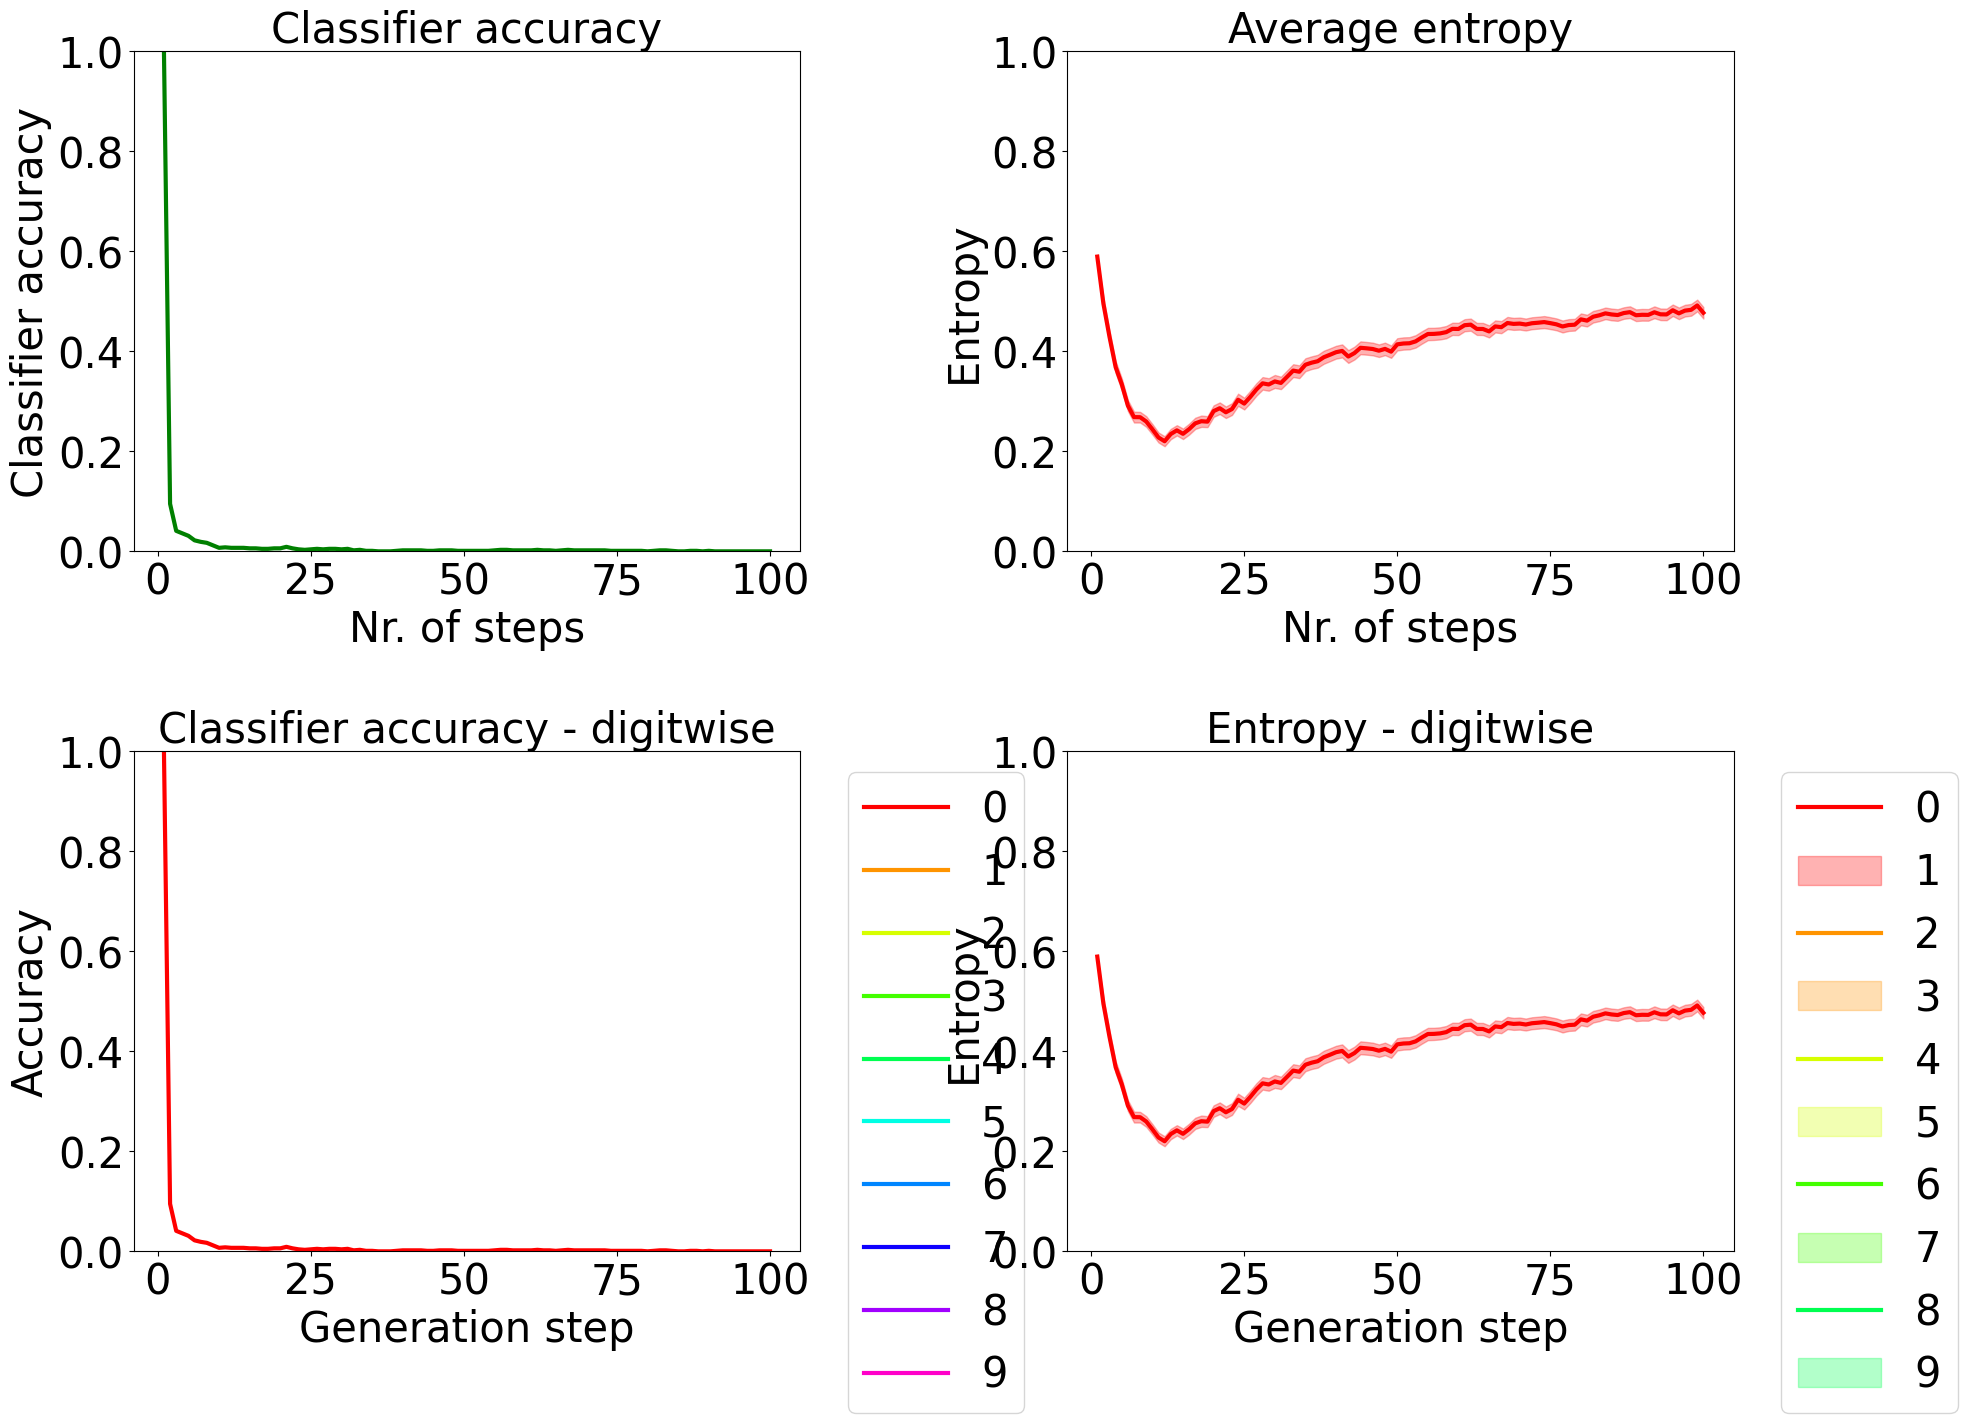

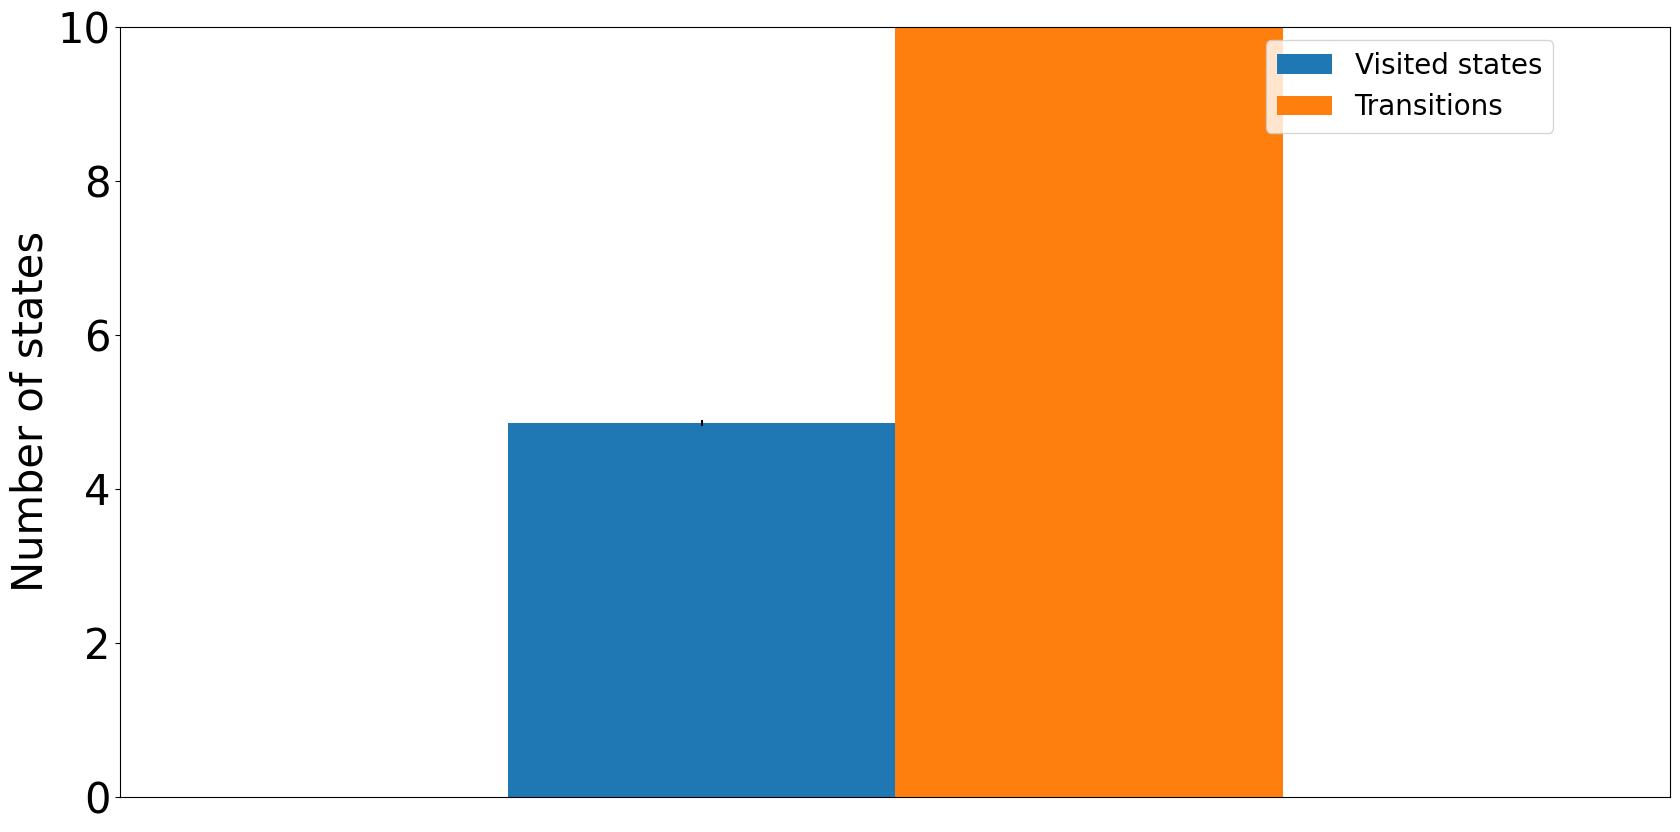

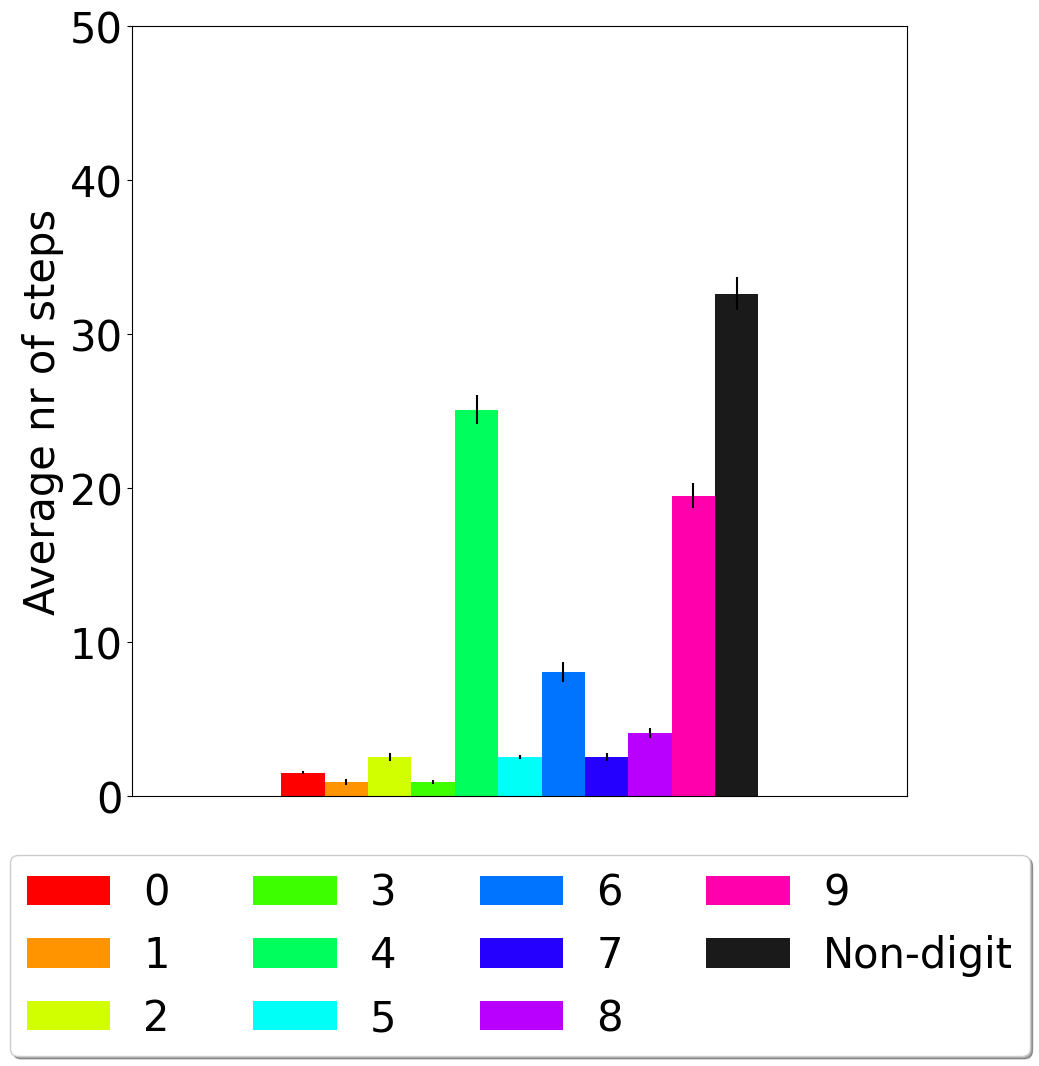

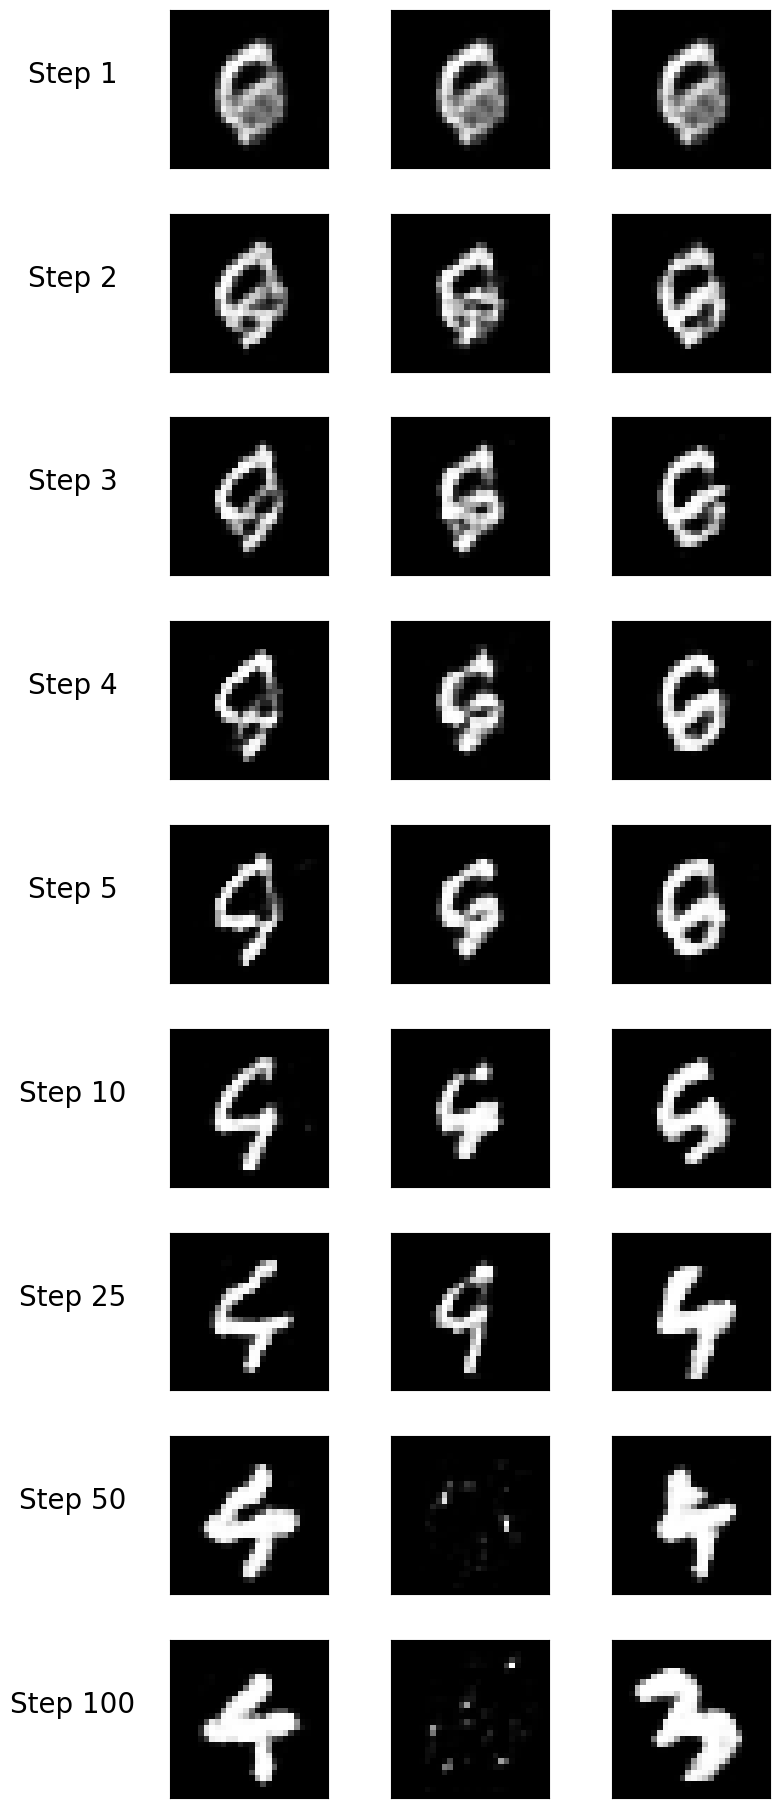

In [ ]:
d, df_average,df_sem, Transition_matrix_rowNorm = Ian.generate_chimera_lbl_biasing(VGG_cl, elements_of_interest = [max_row, max_col],plot=1, nr_of_examples = 1000, temperature = 1, entropy_correction=[])

Reconstruct_plot(d['vis_states'][3:6,:,:], model, nr_steps=100, temperature= 1,row_step = 10, d_type='reconstructed', consider_top = 1000, dS=20)

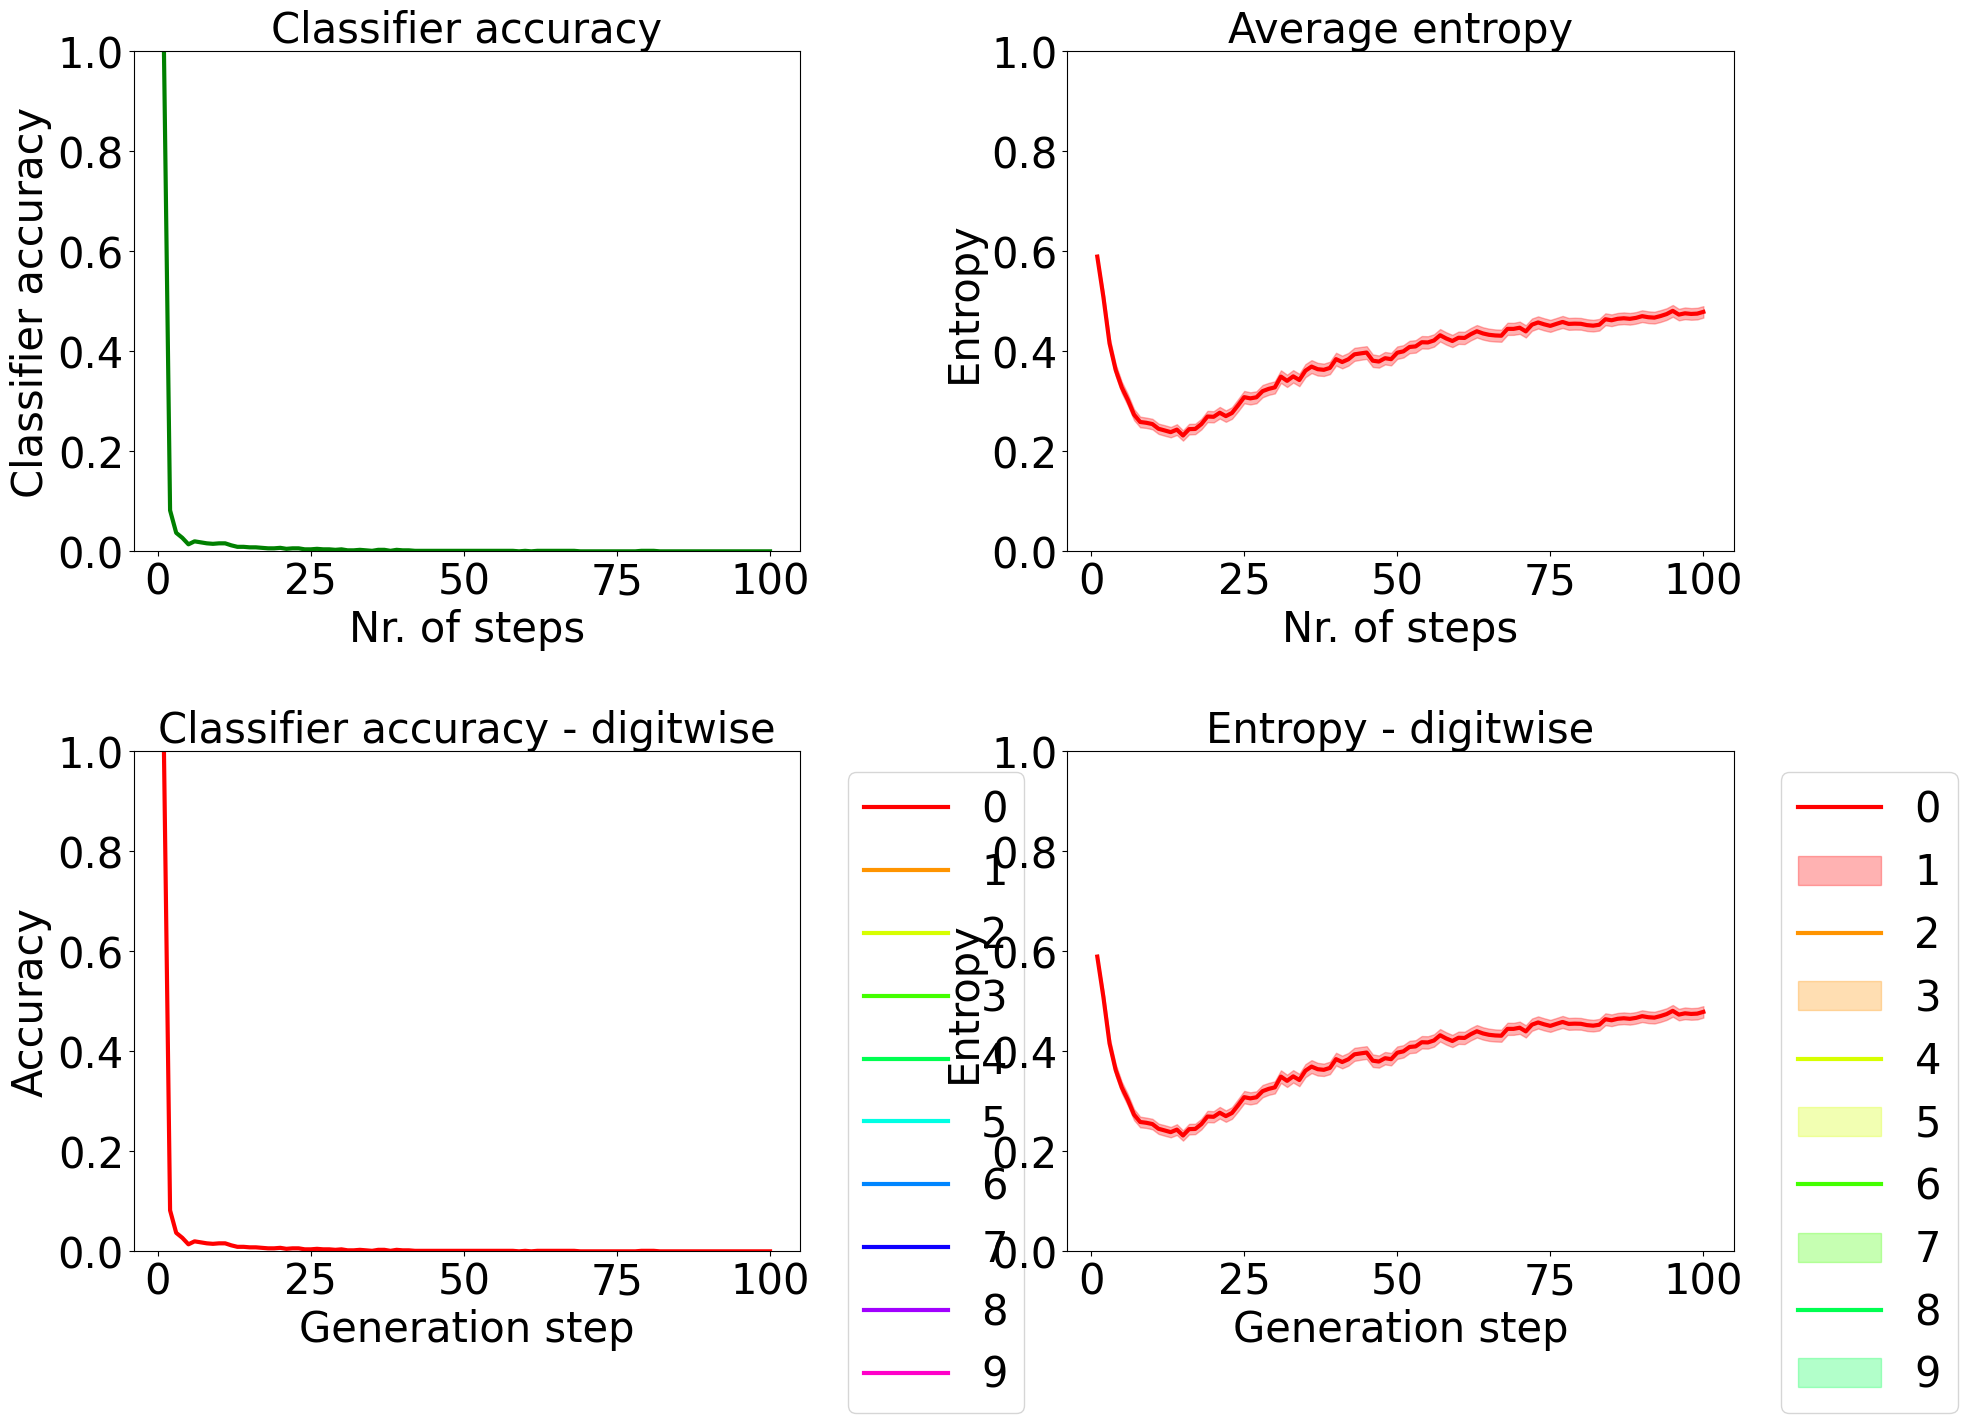

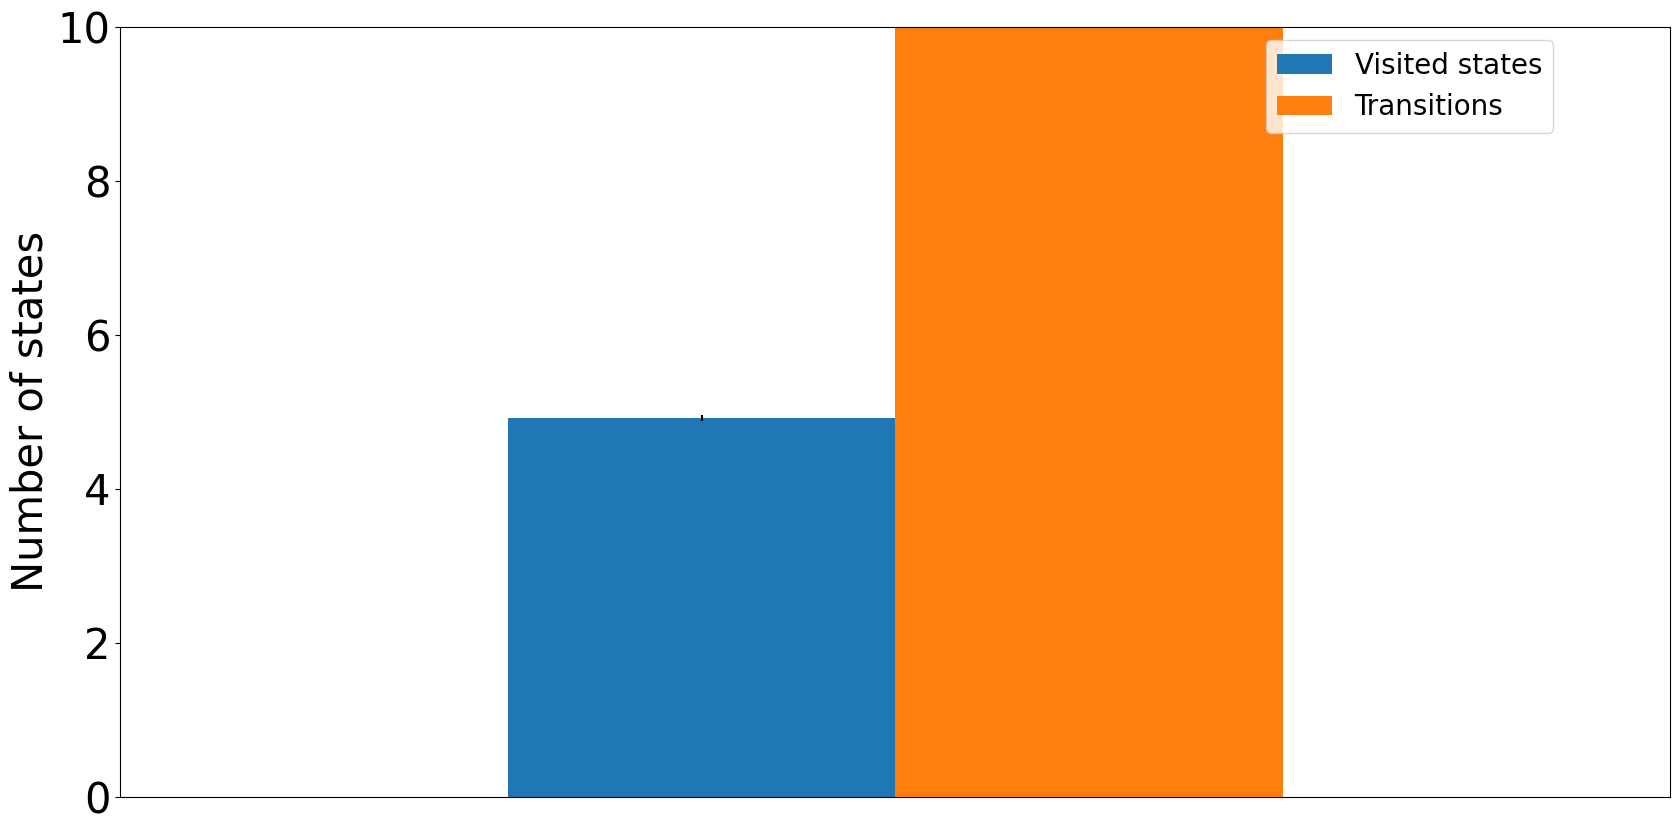

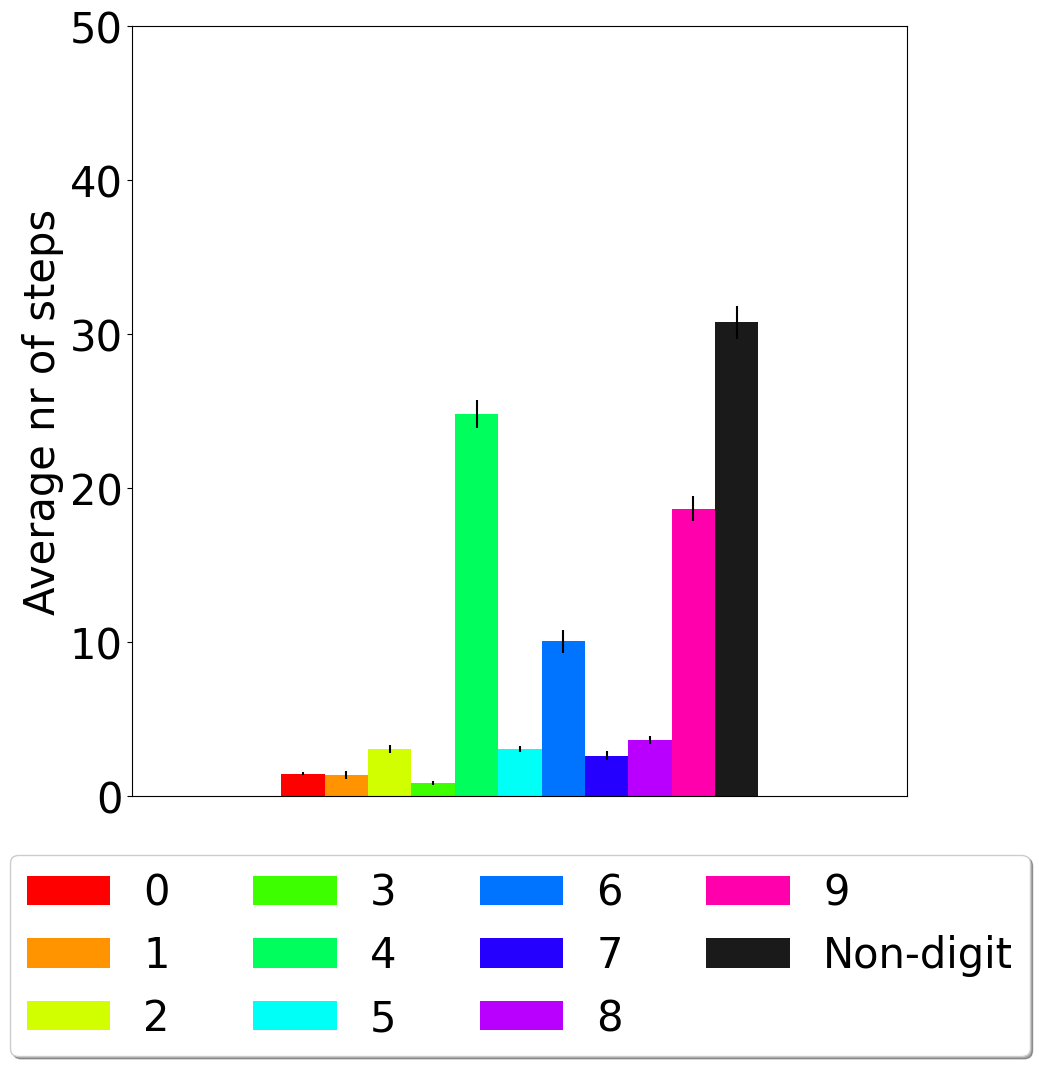

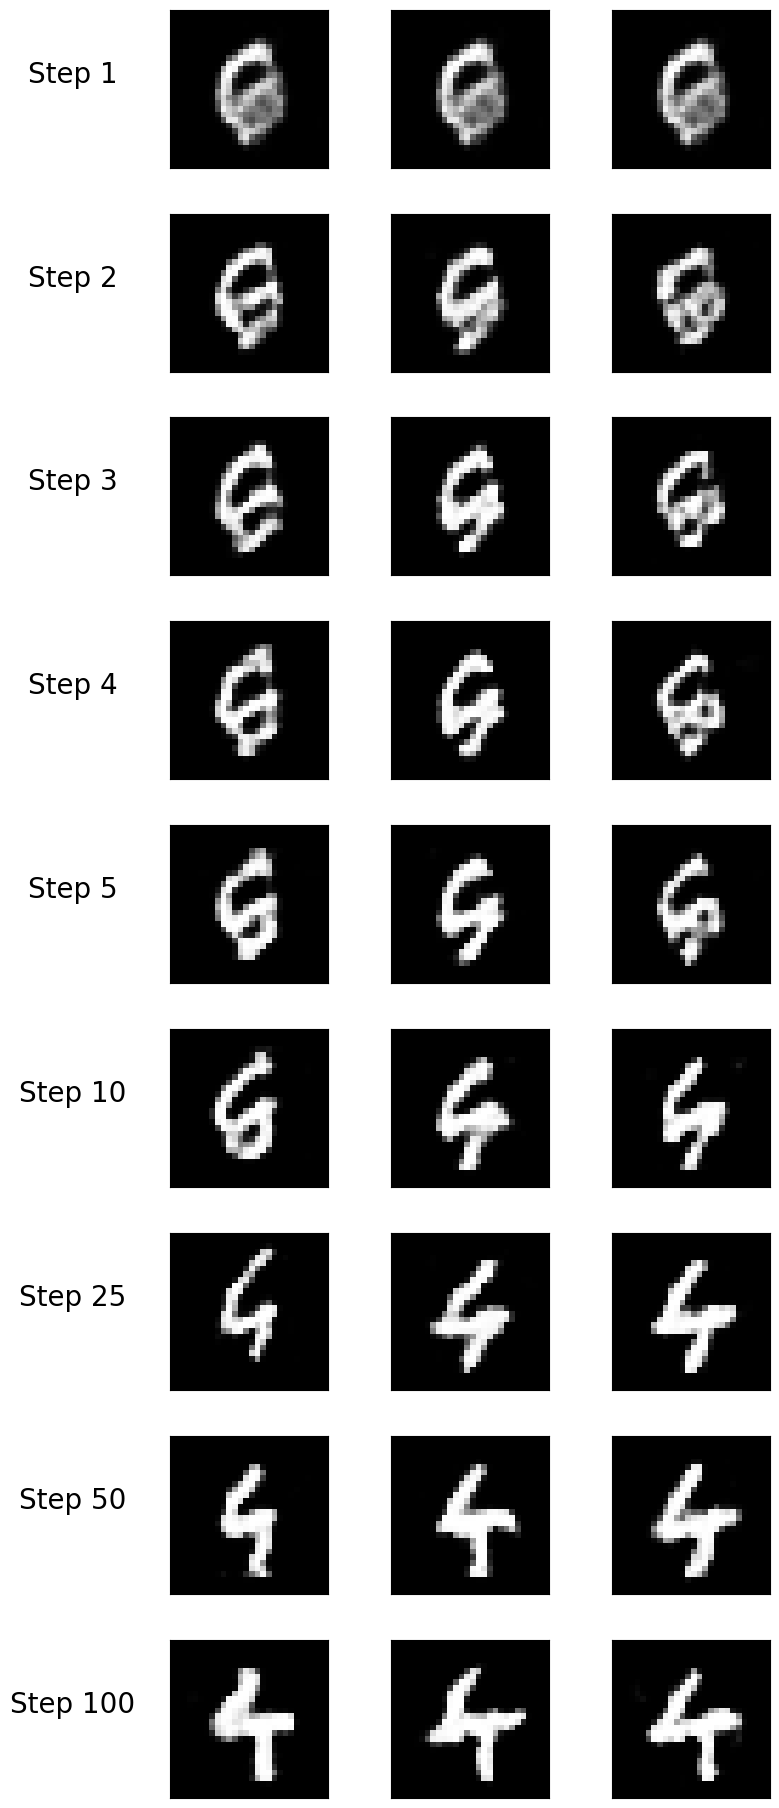

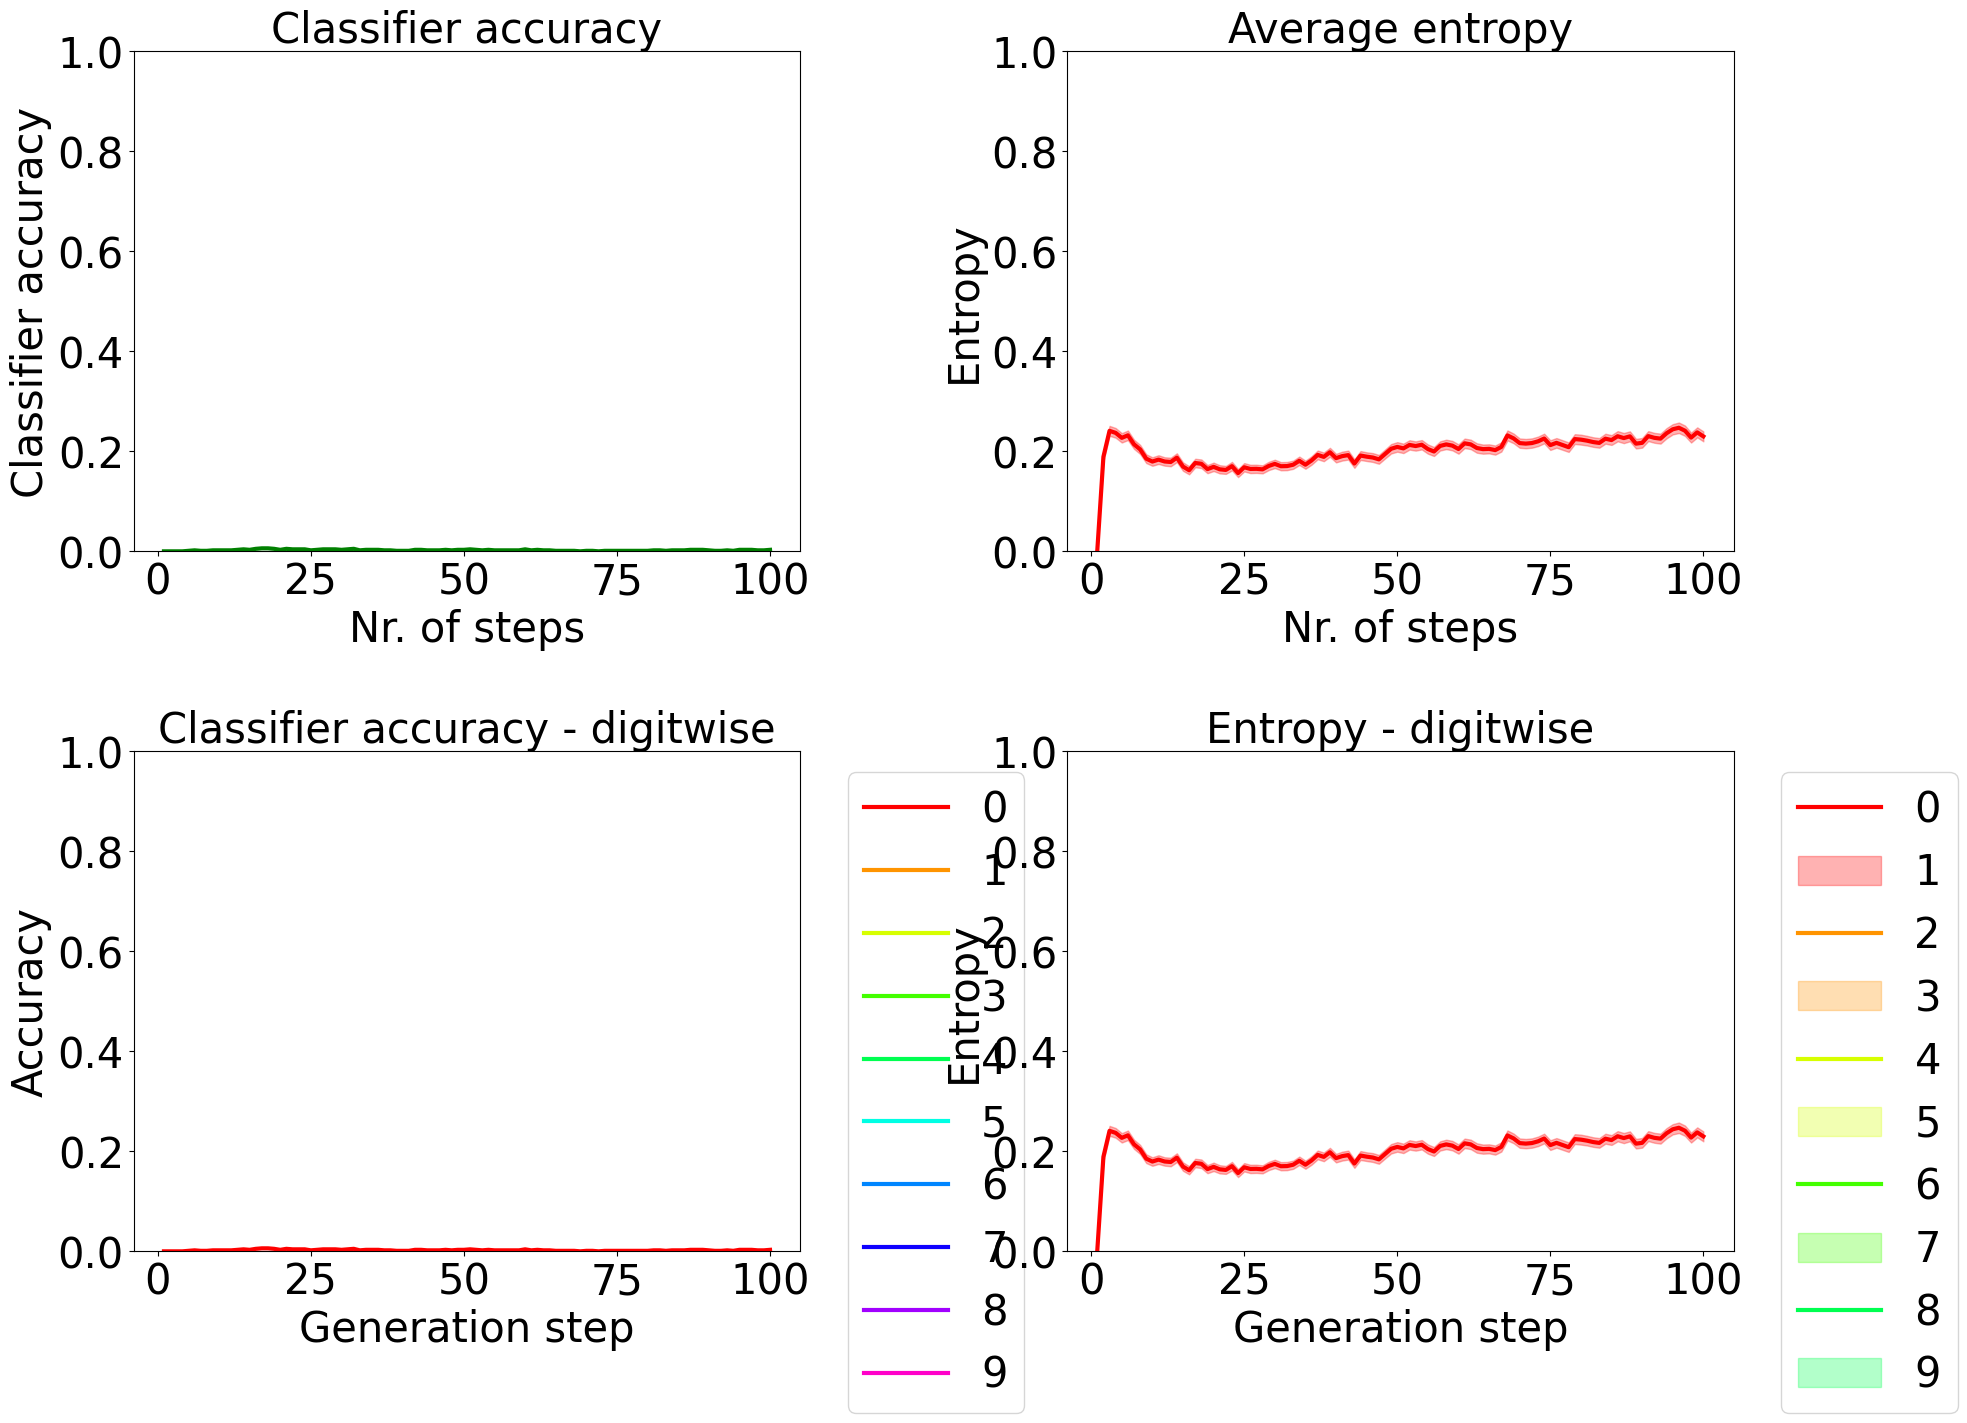

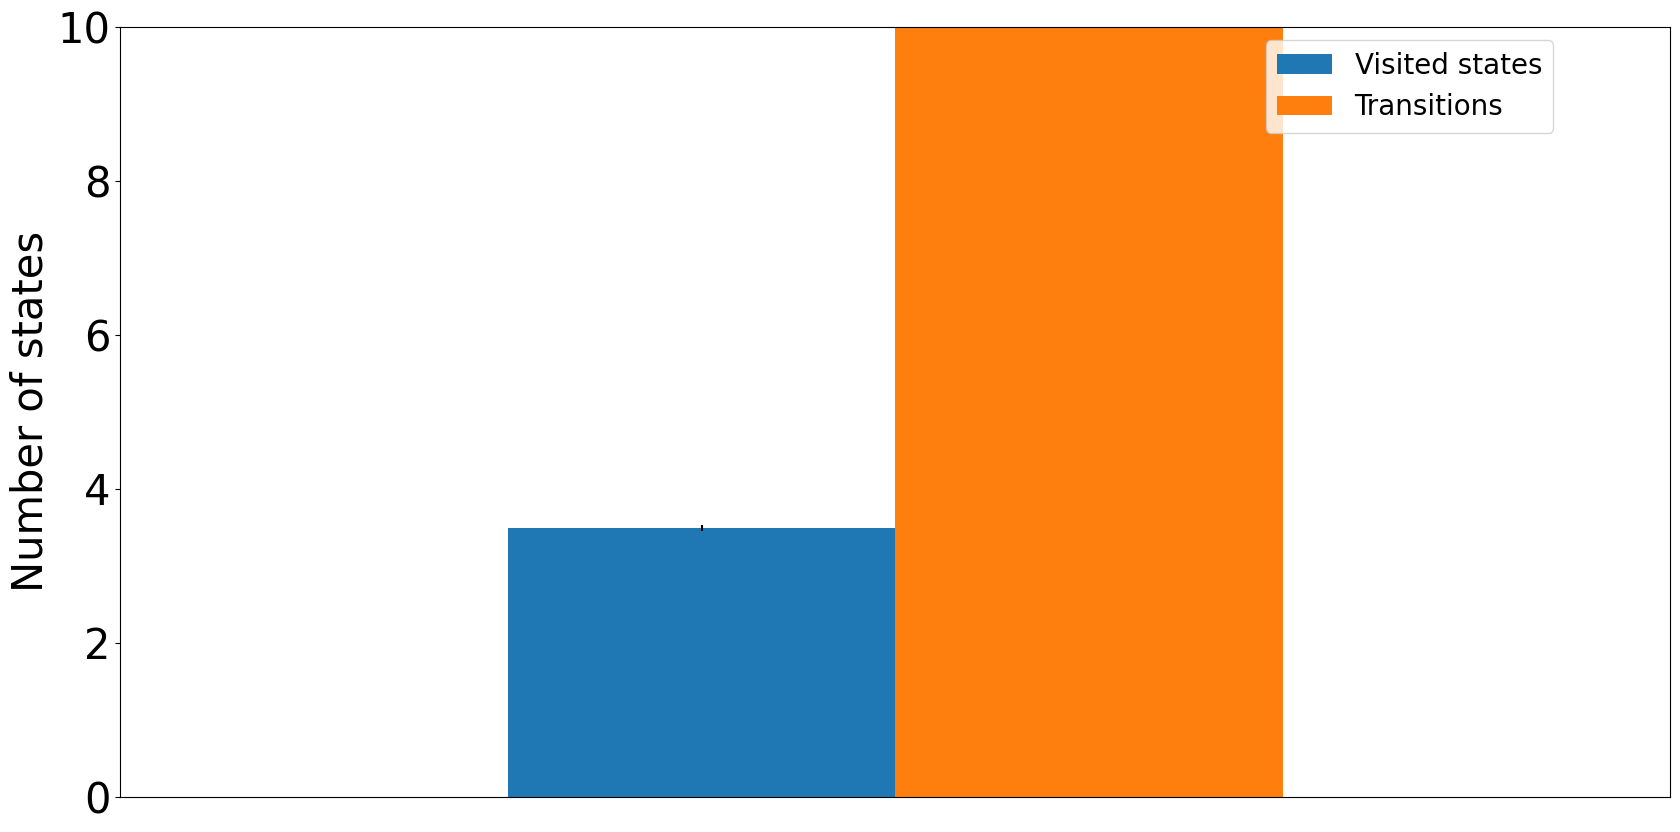

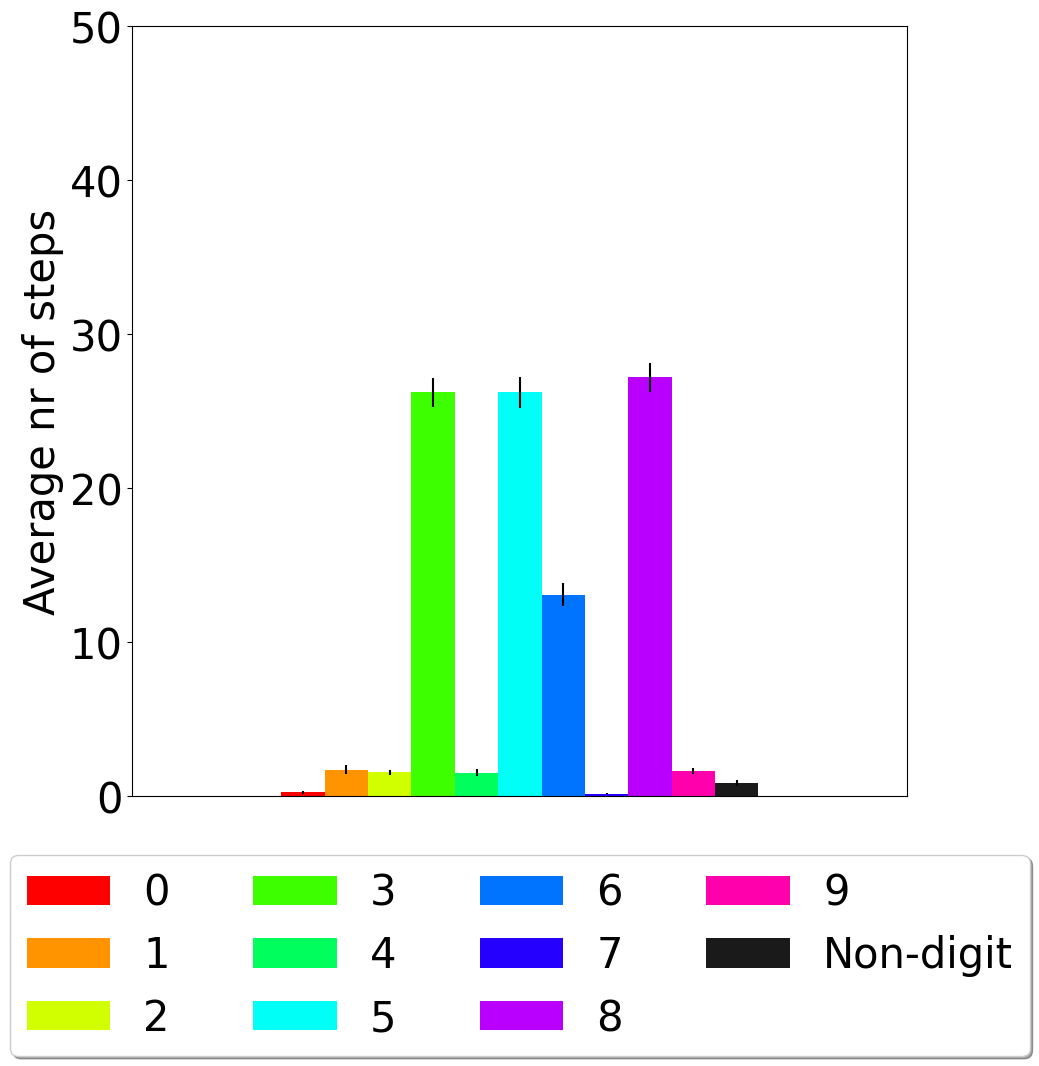

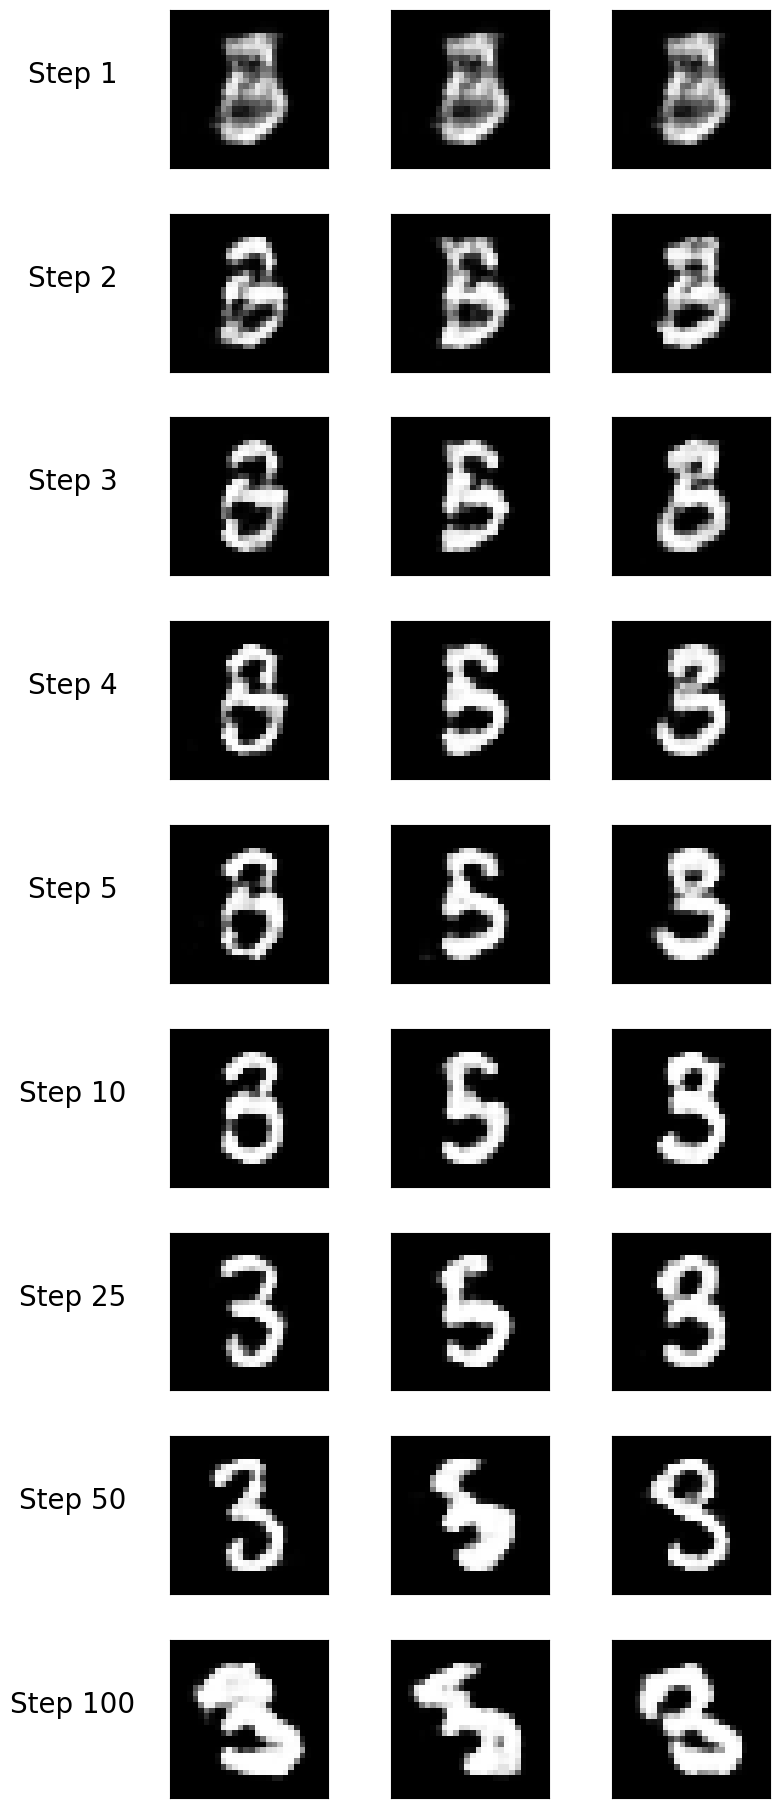

In [ ]:
d, df_average,df_sem, Transition_matrix_rowNorm = Ian.generate_chimera_lbl_biasing(VGG_cl, elements_of_interest = [max_row, max_col],plot=1, nr_of_examples = 1000, temperature = 1, entropy_correction=[])
Reconstruct_plot(d['vis_states'][:3,:,:], model, nr_steps=100, temperature= 1,row_step = 10, d_type='reconstructed', consider_top = 1000, dS=20)

d, df_average,df_sem, Transition_matrix_rowNorm = Ian.generate_chimera_lbl_biasing(VGG_cl, elements_of_interest = [3, 6],plot=1, nr_of_examples = 1000, temperature = 1, entropy_correction=[])
Reconstruct_plot(d['vis_states'][:3,:,:], model, nr_steps=100, temperature= 1,row_step = 10, d_type='reconstructed', consider_top = 1000, dS=20)

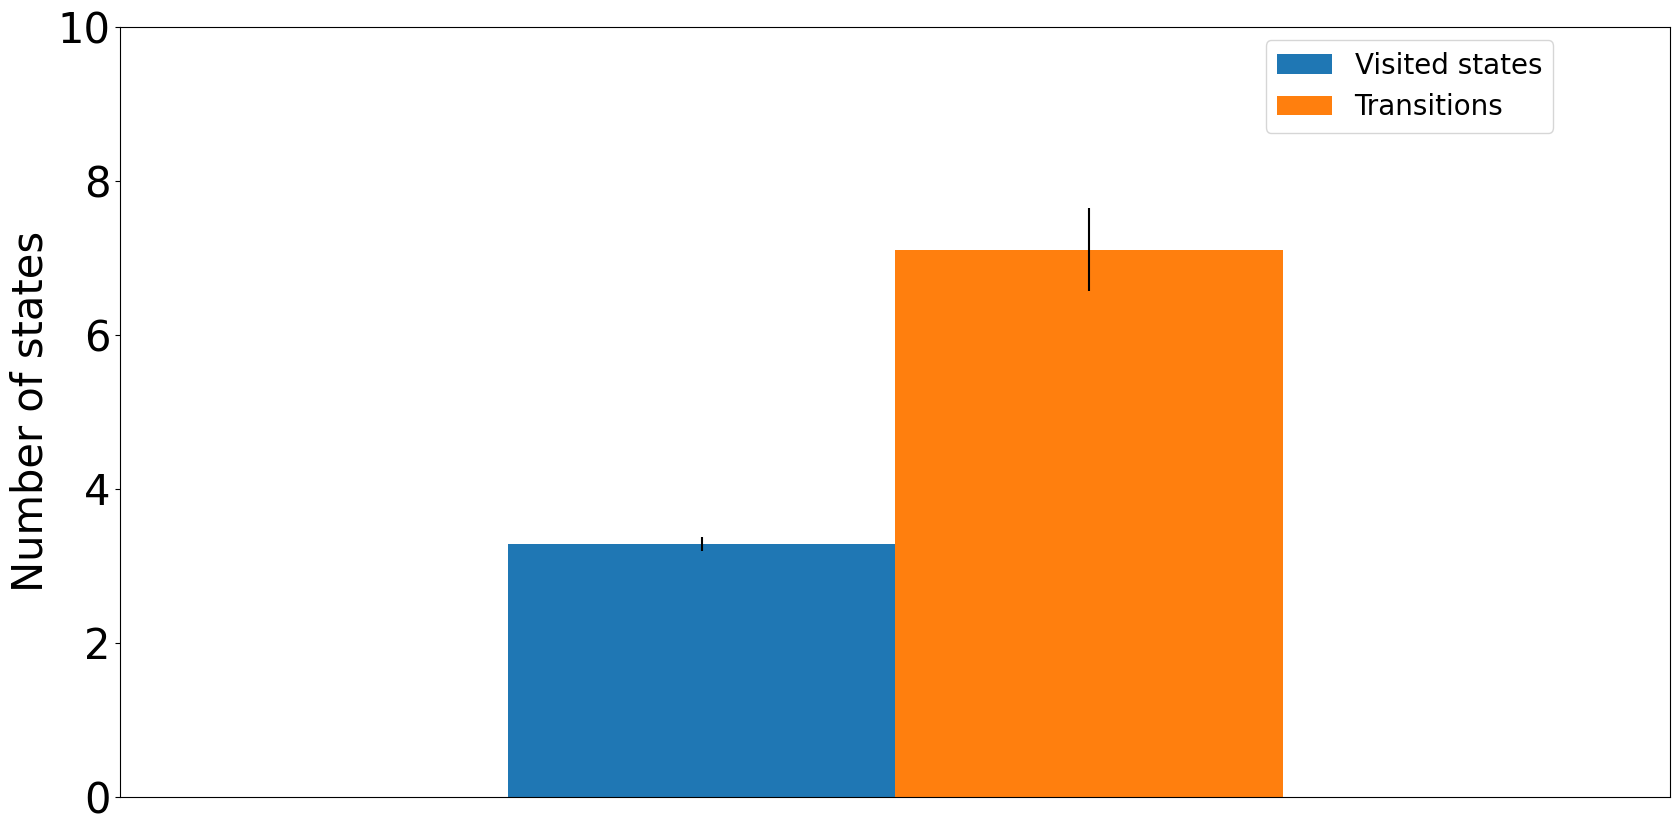

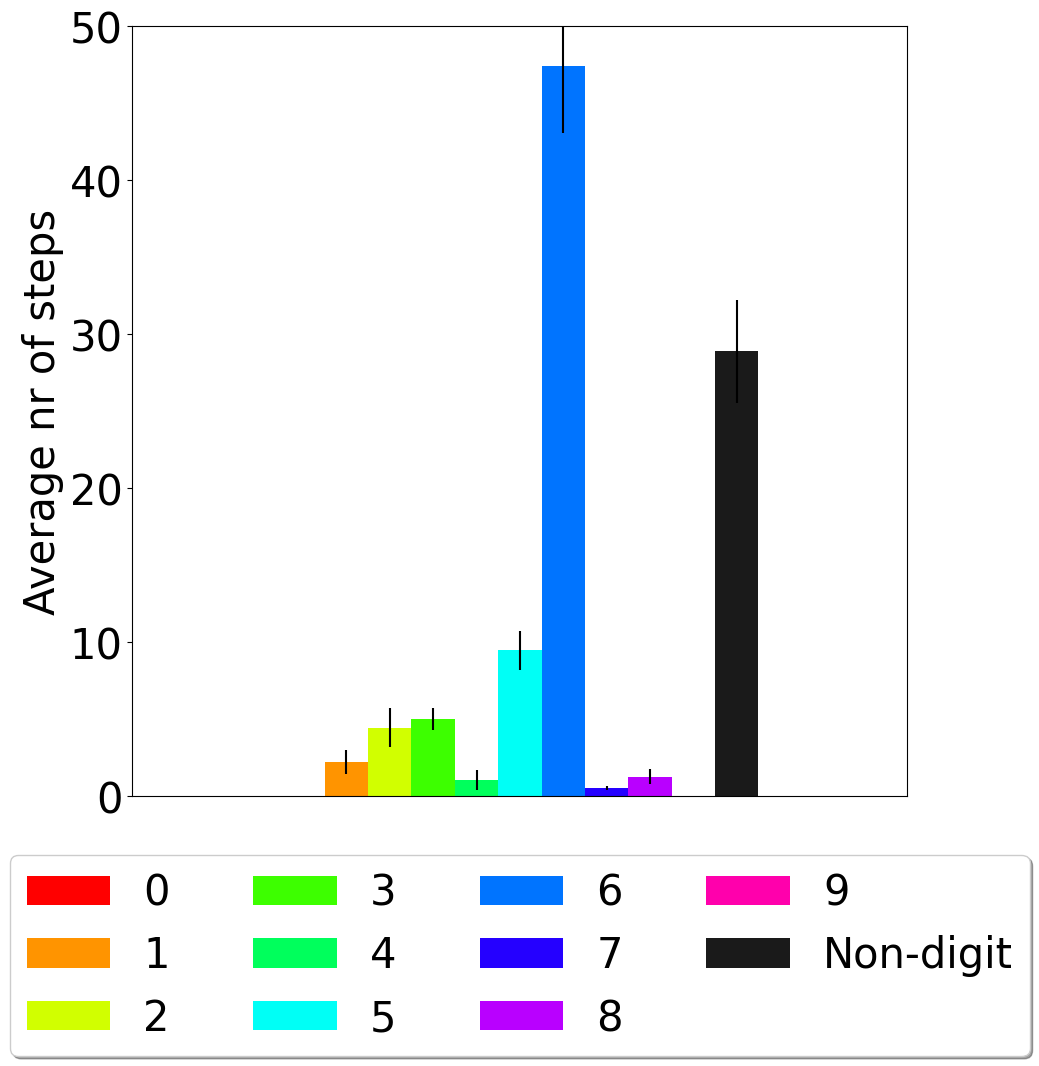

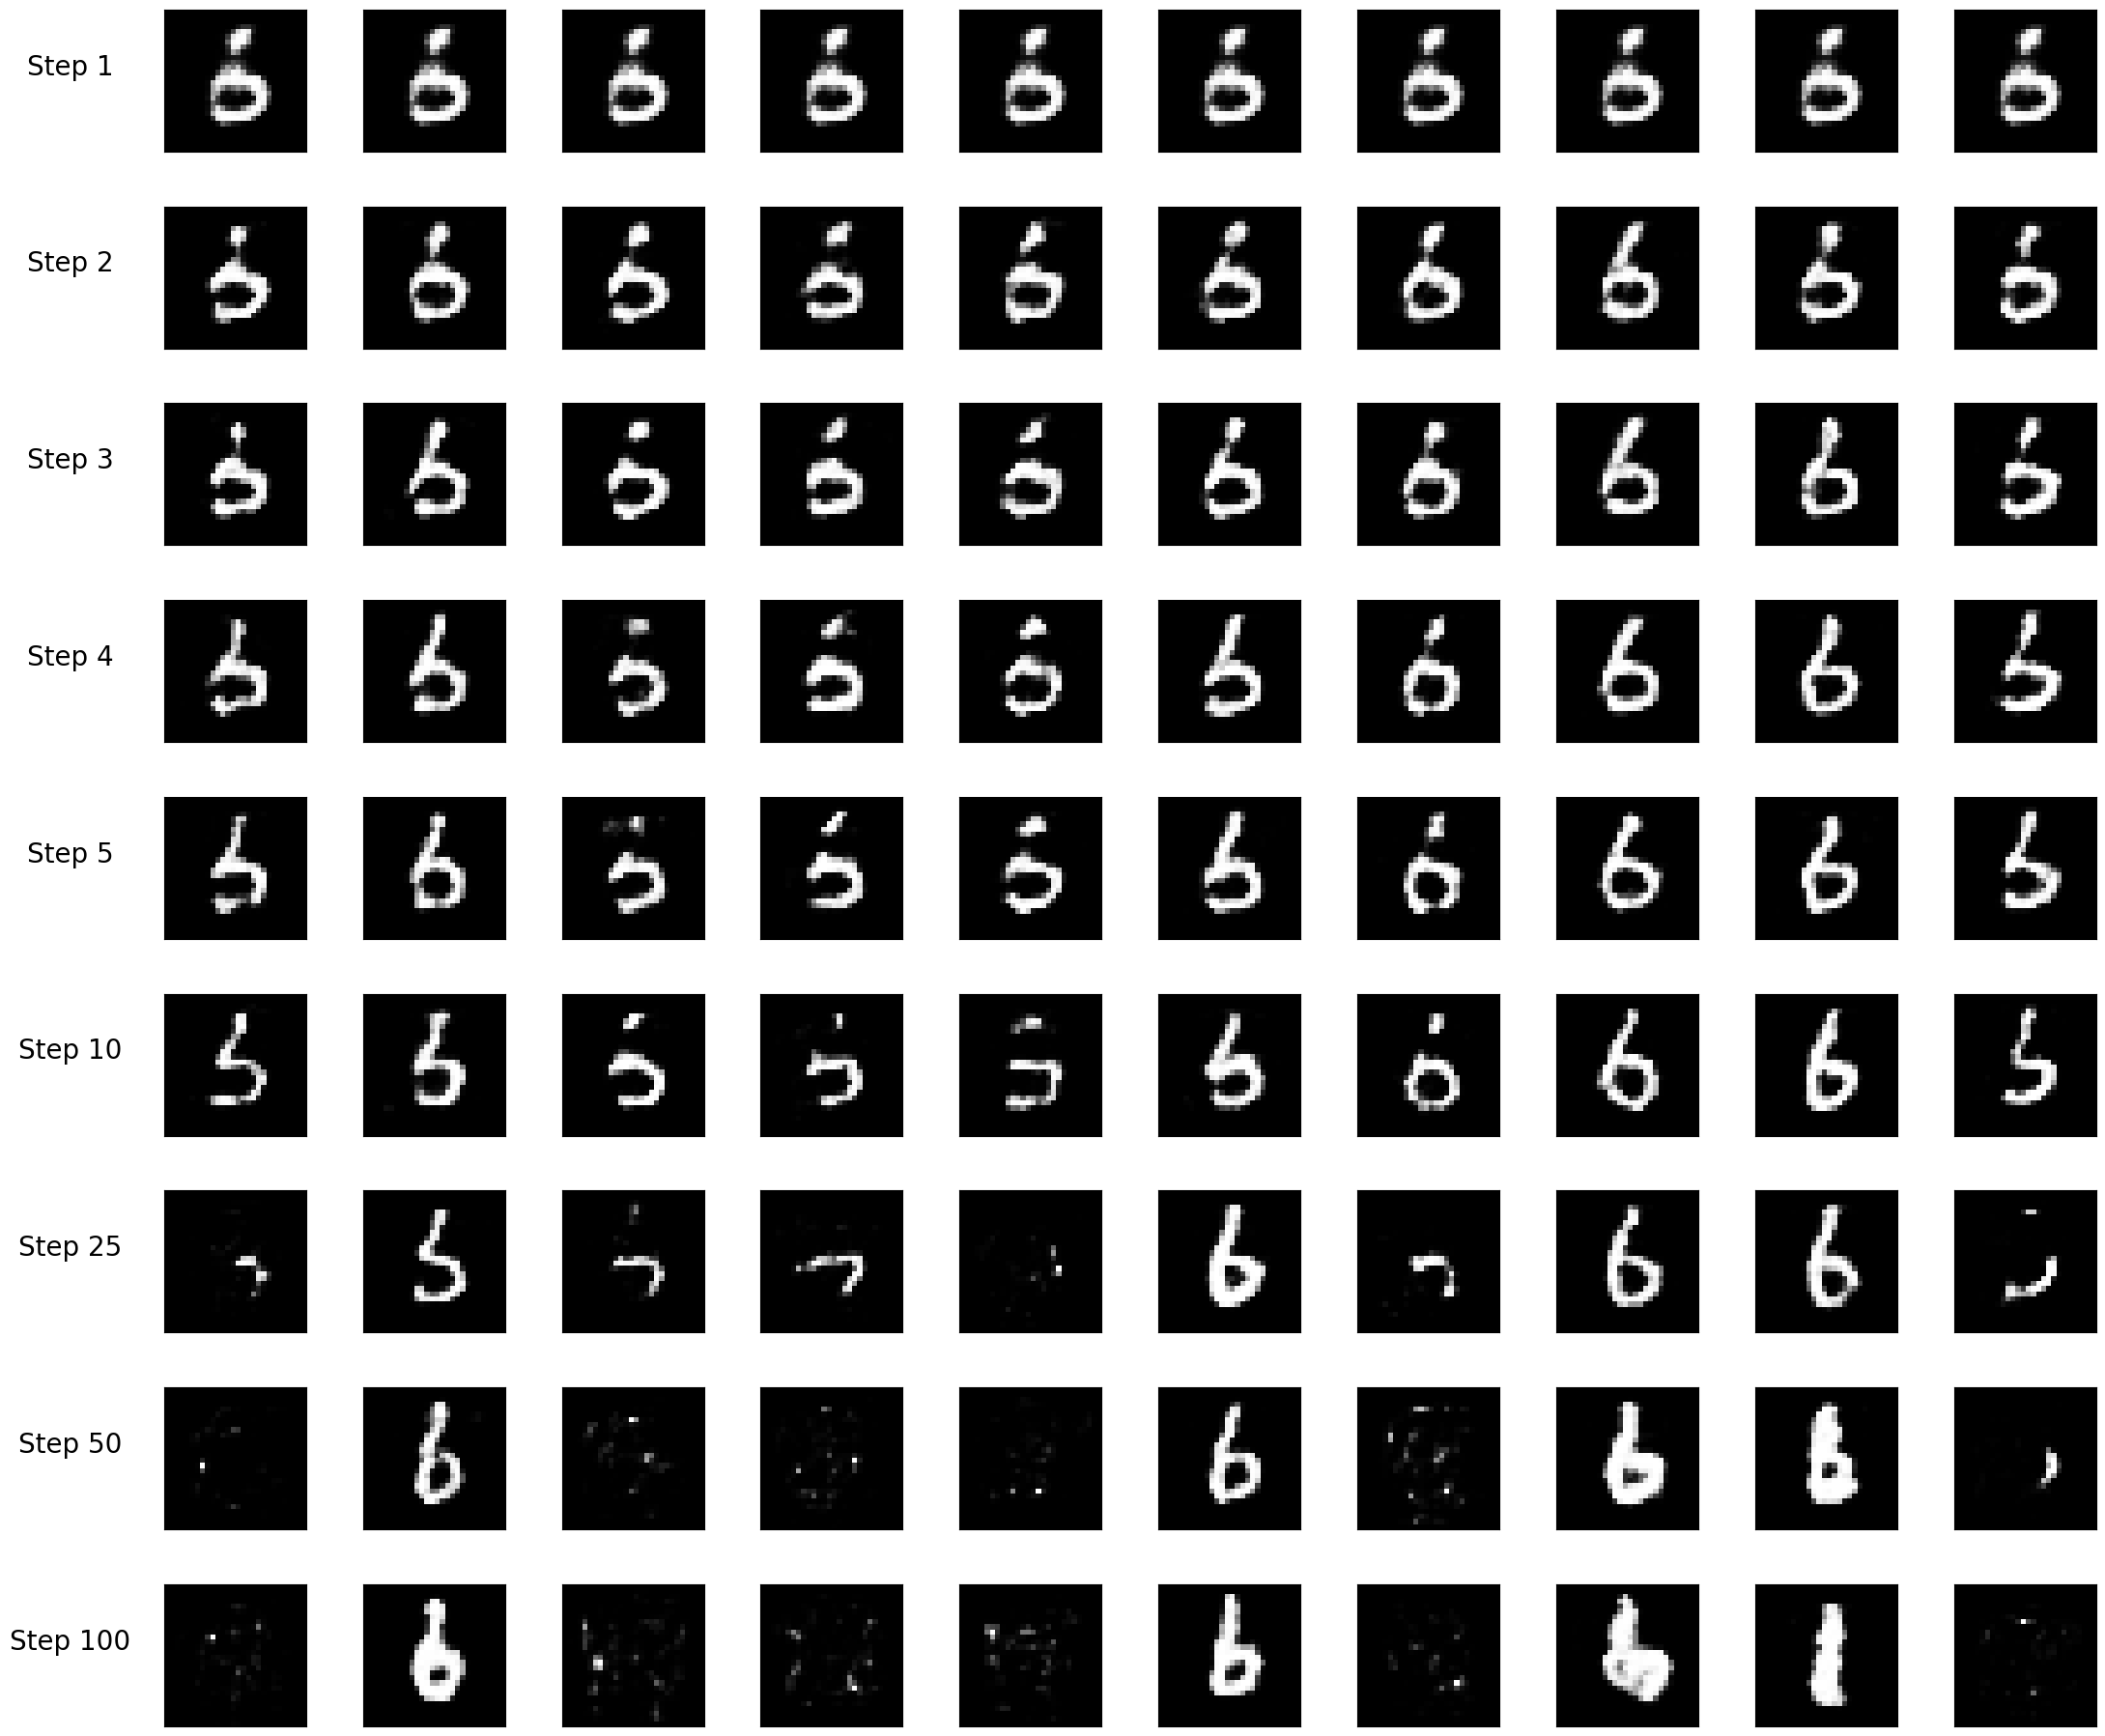

In [ ]:
gen_hidden = label_biasing(model, on_digits= [3, 6], topk = topk)
gen_hidden_100rep = gen_hidden.repeat(1,100)
d = generate_from_hidden(model, gen_hidden_100rep , nr_gen_steps=100, temperature=1, consider_top_k_units = 1000, include_energy = 0)
d = Classifier_accuracy(d, VGG_cl,model, labels=[], Batch_sz= 100,  plot=0, dS=30, l_sz=3)
df_average,df_sem, Transition_matrix_rowNorm = classification_metrics(d,model, Plot=1, Ian=1)
Plot_example_generated(d, model,row_step = 10, dS=20, custom_steps = True, Show_classification = False)

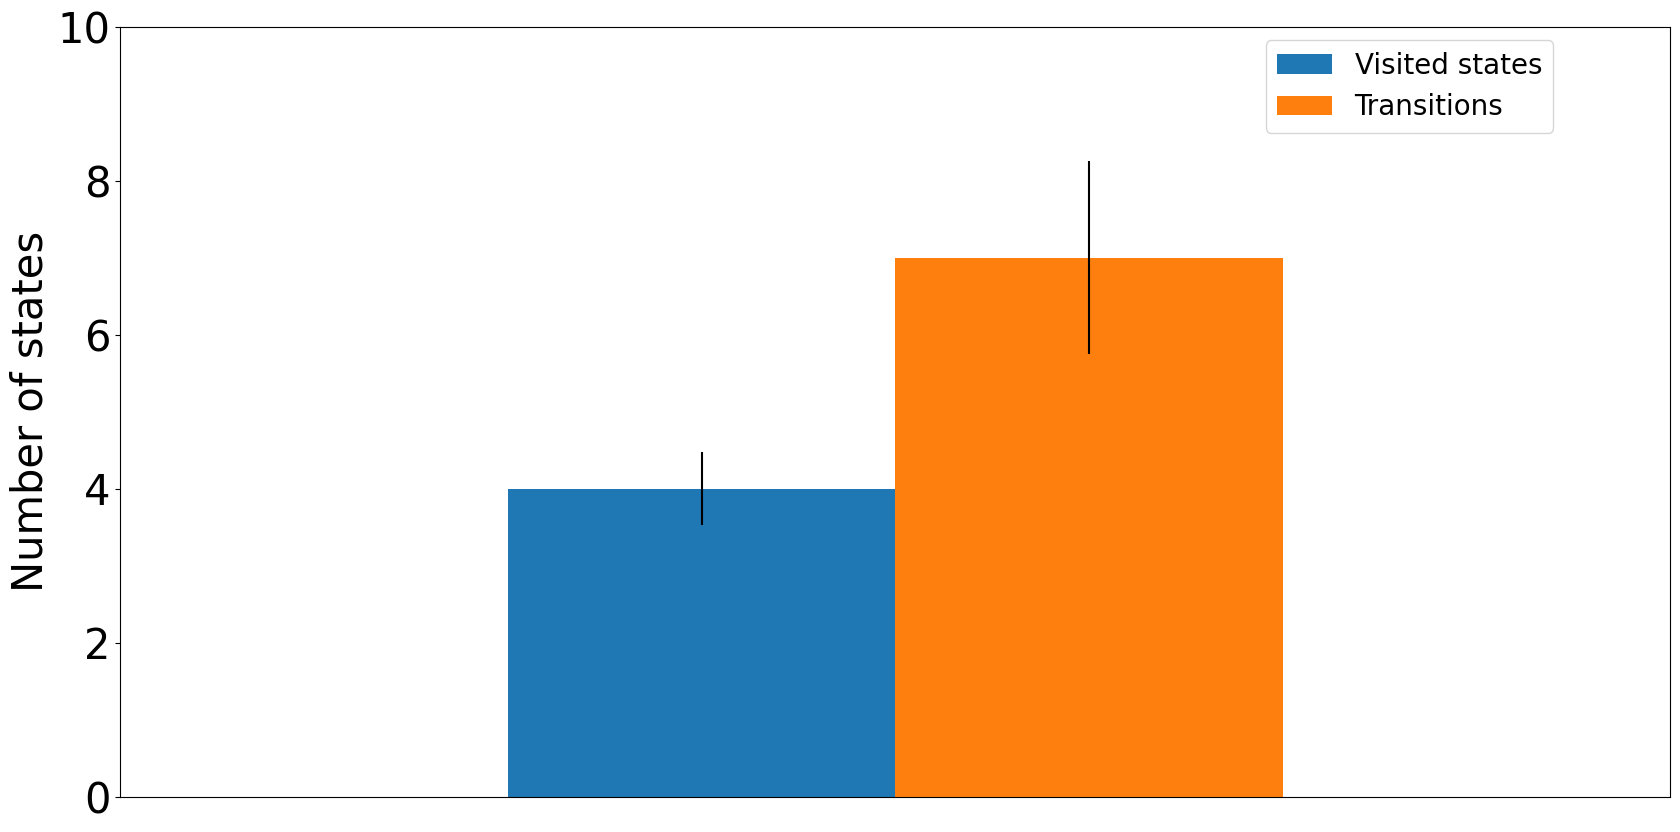

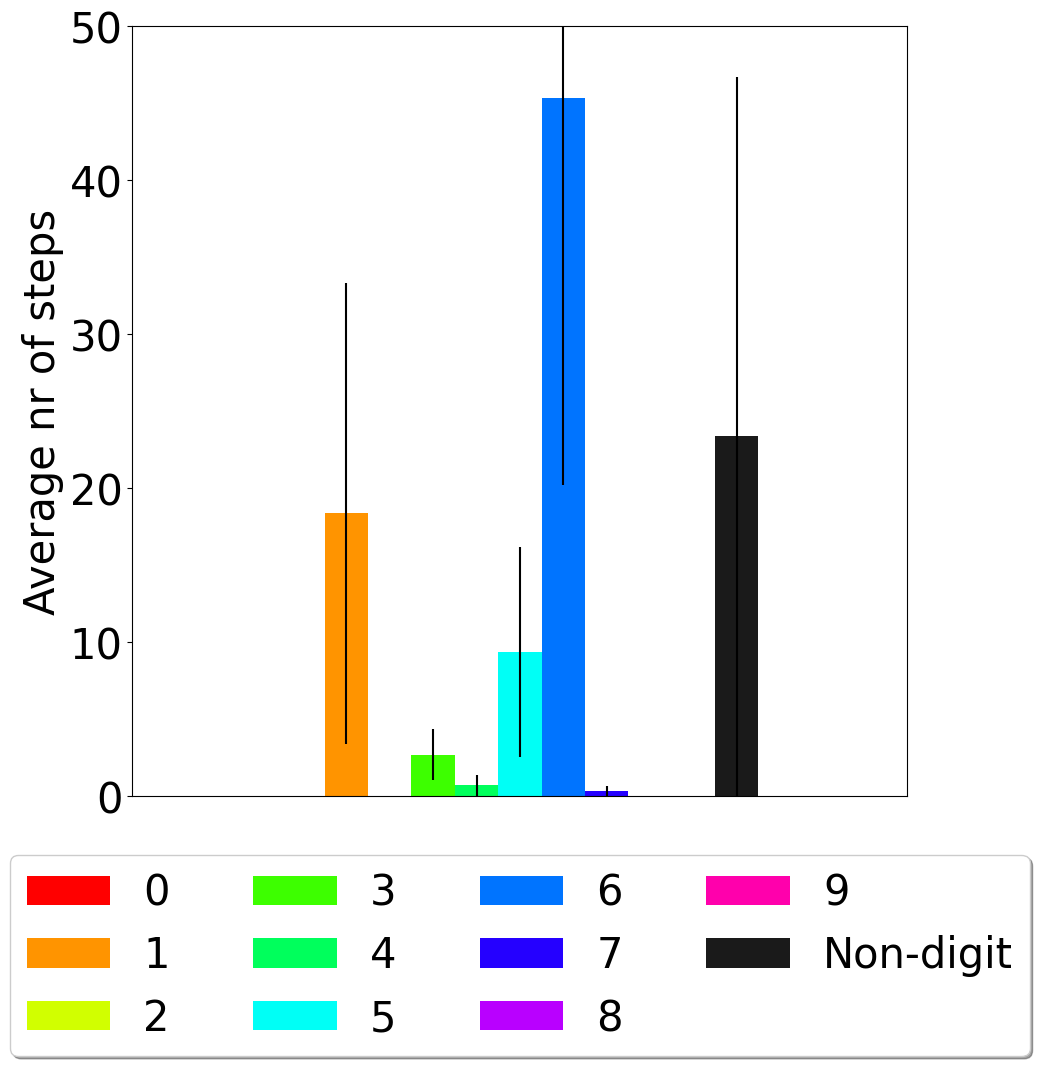

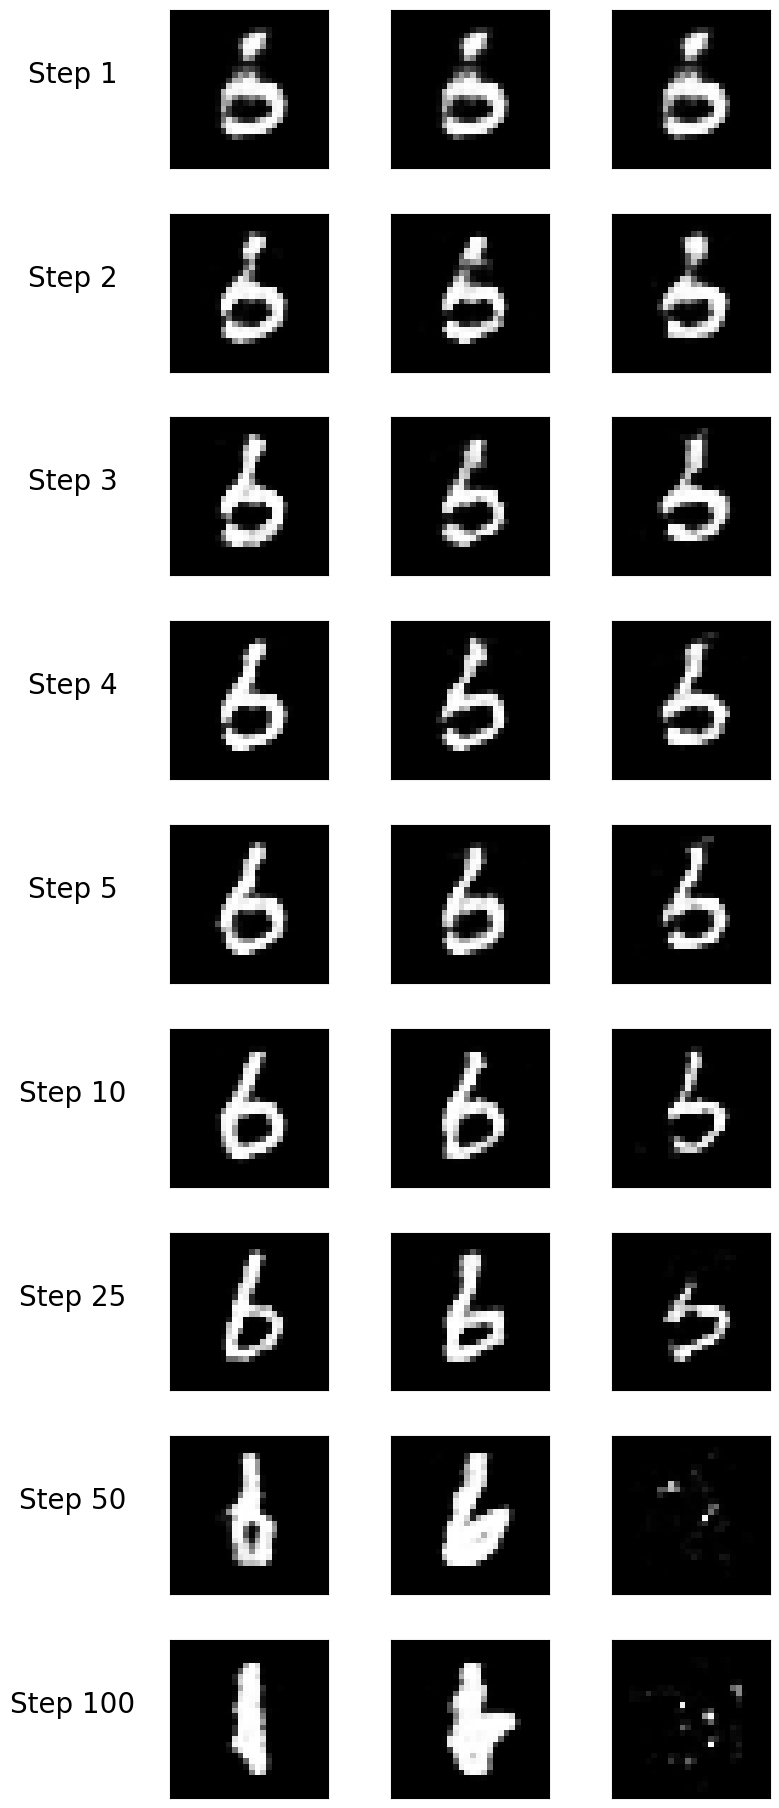

In [ ]:
gen_hidden = label_biasing(model, on_digits= [3, 6], topk = topk)
gen_hidden_100rep = gen_hidden.repeat(1,3)
d = generate_from_hidden(model, gen_hidden_100rep , nr_gen_steps=100, temperature=1, consider_top_k_units = 1000, include_energy = 0)
d = Classifier_accuracy(d, VGG_cl,model, labels=[], Batch_sz= 100,  plot=0, dS=30, l_sz=3)
df_average,df_sem, Transition_matrix_rowNorm = classification_metrics(d,model, Plot=1, Ian=1)
Plot_example_generated(d, model,row_step = 10, dS=20, custom_steps = True, Show_classification = False)

# **Other**

In [ ]:
for i in range(10):
  gen_hidden = label_biasing(model, on_digits= i, topk = -1)
  if i == 0:
    H0to9 = gen_hidden
  else:
    H0to9 = torch.hstack((H0to9,gen_hidden))

#Example generation with label biasing and visualization of classification labels
gen_hidden_100rep = H0to9.repeat(1,100)
d = generate_from_hidden(model, gen_hidden_100rep , nr_gen_steps=100, temperature=1, consider_top_k_units = 1000, include_energy = 0)
#d = Classifier_accuracy(d, VGG_cl,model, E, labels=[], Batch_sz= 100,  plot=0, dS=30, l_sz=3)
d = Classifier_accuracy(d, VGG_cl,model, labels=[], Thresholding_entropy=[], Batch_sz= 100,  plot=0, dS=30, l_sz=3)
Plot_example_generated(d, model,row_step = 10, dS=20, custom_steps = True, Show_classification = False)

In [ ]:
for i in range(10):
  gen_hidden = label_biasing(model, on_digits= i, topk = -1)
  if i == 0:
    H0to9 = gen_hidden
  else:
    H0to9 = torch.hstack((H0to9,gen_hidden))

#Example generation with label biasing and visualization of classification labels
gen_hidden_100rep = H0to9.repeat(1,100)
d = generate_from_hidden(model, gen_hidden_100rep , nr_gen_steps=100, temperature=1, consider_top_k_units = 1000, include_energy = 0)
VStack_labels=torch.tensor(range(10), device = 'cuda')
VStack_labels=VStack_labels.repeat(100)
d_cl = Classifier_accuracy(d, VGG_cl,model, labels=VStack_labels, plot=2,dS = 50, l_sz = 5)
Digitwise_metrics_plot(model,sample_test_labels, sample_test_data,gen_data_dictionary=d, metric_type='perc_act_H')

average_Hid, Active_hid, Active_hid_SEM =hidden_states_analysis(d,d_cl)
df_average,df_sem, Transition_matrix_rowNorm = classification_metrics(d_cl,model,VStack_labels,dS=50)
Plot_example_generated(d, model,row_step = 10, dS=20, custom_steps = True, Show_classification = False)

In [ ]:
#Intersection - classical with entropy correction
Vis_states_mat_IntCorr, Vis_states_err_IntCorr = Chimeras_nr_visited_states(model, VGG_cl, Ian =Ian, apprx=1,plot=1,compute_new=1, nr_sample_generated =100, entropy_correction=E, lS=20)

max_index = np.nanargmax(Vis_states_mat_IntCorr)
# Find the row and column indices of the maximum value
max_row, max_col = np.unravel_index(max_index, Vis_states_mat_IntCorr.shape)
d, df_average,df_sem, Transition_matrix_rowNorm = Ian.generate_chimera_lbl_biasing(VGG_cl, elements_of_interest = [max_row, max_col],plot=1, nr_of_examples = 1000, temperature = 1, entropy_correction=E)
Reconstruct_plot(d['vis_states'][:10,:,:], model, nr_steps=100, temperature= 1,row_step = 10, d_type='reconstructed', consider_top = 1000, dS=20)

In [ ]:
#Intersection - label biasing with entropy correction
topk=149
Vis_states_mat_LBCorr, Vis_states_err_LBCorr = Chimeras_nr_visited_states(model, VGG_cl, Ian =[], topk=topk, apprx=1,plot=1,compute_new=1, nr_sample_generated =100, entropy_correction=E, lS=20)
max_index = np.nanargmax(Vis_states_mat_LBCorr)
# Find the row and column indices of the maximum value
max_row, max_col = np.unravel_index(max_index, Vis_states_mat_LBCorr.shape)

gen_hidden = label_biasing(model, on_digits= [max_row, max_col], topk = topk)
gen_hidden_100rep = gen_hidden.repeat(1,100)
d = generate_from_hidden(model, gen_hidden_100rep , nr_gen_steps=100, temperature=1, consider_top_k_units = 1000, include_energy = 0)
d = Classifier_accuracy(d, VGG_cl,model,Thresholding_entropy=E, labels=[], Batch_sz= 100,  plot=0, dS=30, l_sz=3)
df_average,df_sem, Transition_matrix_rowNorm = classification_metrics(d,model, Plot=1, Ian=1)
Plot_example_generated(d, model,row_step = 10, dS=20, custom_steps = True, Show_classification = False)

In [ ]:
#Classical label biasing generation
vis_lbl_bias, gen_hidden_act=model.label_biasing(nr_steps=nr_steps)

#visible layer quantifications 
LblBiasGenerated_imgs=d_LblBias_t1_allH['vis_states']
VStack_labels=torch.tensor(range(10), device = 'cuda')
VStack_labels=VStack_labels.repeat(100)
d_cl = Classifier_accuracy(d_LblBias_t1_allH, VGG_cl,model, labels=VStack_labels, plot=2,dS = 50, l_sz = 5)
Digitwise_metrics_plot(model,sample_test_labels, sample_test_data,gen_data_dictionary=d_LblBias_t1_allH, metric_type='perc_act_H')